# Purpose

We have many vehicle advertisements listed on our website daily, we want to investigate which factors can help determine the price of a vehicle.

This will be done by comparing various aspects of vehicle listings, such as model year, the odometer, etc. to the price, and analyzing any patterns that come up.

# Imports & Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing necessary libraries

In [2]:
try:
    vehicle_data = pd.read_csv("vehicles_us.csv")
except:
    vehicle_data = pd.read_csv('/datasets/vehicles_us.csv')    
    
#loading the dataset into a df called 'vehicle_data'

# Data Preprocessing

In [3]:
vehicle_data.head()

#inspecting the data to see what it looks like

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [4]:
vehicle_data.info()

#gathering more info about the data to check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


There are a couple things to note by just the data types and non null count of the dataframe shown above.
* model_year: This column has 3,619 null values and because of NaN is a float datatype. We will investigate how to deal with the null values and change the datatype to datetime.
* cylinders: This column has 5,260 null values and because of NaN is a float datatype. We will investigate how to deal with the null values and change the datatype to integers. (Cars dont have half cylinders)
* odometer: This column has 7,982 null values and because of NaN is a float datatype. We will investigate how to deal with the null values and change the datatype to integers. (odometers dont track partial miles)
* paint_color: This column has 9,367 null values, We should look at how we want to fill these values.
* is_4wd: This column has 25,953 null values -more null than non-null! We will need to look into whats going on with this column. This should be a boolean value.
* date_posted: This column should be a datetime object

## Missing Values

### is_4wd
This column has 25,953 null values - more null than non-null! We will need to look into whats going on with this column. This should be a boolean value.

In [5]:
vehicle_data['is_4wd'].isna().sum()/vehicle_data['is_4wd'].shape[0]*100

#Seeing percentage of missing data, 50%

50.36972343522562

In [6]:
vehicle_data['is_4wd'].value_counts()

#checking what values are in the data.

1.0    25572
Name: is_4wd, dtype: int64

It looks like the 'is_4wd' column only holds values of 1 or NaN. It is safe to assume that the missing values are probably all supposed to be 0, or False, the vehicles without 4-wheel-drive. Let's fill these values with 0.

In [7]:
vehicle_data['is_4wd'].fillna(0,inplace=True)
vehicle_data['is_4wd'].value_counts()

#filling na values in is_4wd with 0, then checking that the changes persisted

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

### paint_color
This column has 9,367 null values, We should look at how we want to fill these values.

In [8]:
vehicle_data['paint_color'].isna().sum()/vehicle_data['paint_color'].shape[0]*100

#checking percentage of missing data

17.985443959243085

In [9]:
vehicle_data['paint_color'].value_counts()

#checking distribution of paint color column

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

The person who puts the color here is probably the person listing it. There can be a multitude of reason why someone wouldnt put the color, it could be that the color to describe the car is not listed here. Either way I believe it is safe to fill these values with 'Unknown' since there is no way to tell what color the car is at the time of the listing without the seller explicitly saying so. This accounts for 17% of our data and so we cannot simply get rid of these null values.

In [10]:
vehicle_data['paint_color'].fillna('unknown',inplace=True)
vehicle_data['paint_color'].value_counts()

#filling null values in paint color with unknown, then checking to see that changes persisted

white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64

In [11]:
vehicle_data['paint_color'].isna().sum()

#checking to see that there are no null values in 'paint_color' column

0

### model_year
This column has 3,619 null values and because of NaN is a float datatype. We will investigate how to deal with the null values.

In [12]:
vehicle_data['model_year'].isna().sum()/vehicle_data['model_year'].count()*100

#about 7.6% of the data in model year is missing

7.5543773222560855

In [13]:
vehicle_data['model_year'].describe()

#checking the distribution of the model_year column

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

We will fill the model_year with the median by model, as different models of cars were available at different years, it would be unfair to just fill the the median of the entire dataset.
Something else that is peculiar is the '1908' model year...those cars were not being manufactured back then.

In [14]:
vehicle_data[vehicle_data['model_year']<1960].sort_values(['model_year'])

#showing listings of vehicles who's model year is older than 1960

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
33906,12995,1908.0,gmc yukon,good,8.0,gas,169328.0,automatic,SUV,black,0.0,2018-07-06,34
33907,12995,1908.0,cadillac escalade,excellent,8.0,gas,NaN,automatic,SUV,white,0.0,2018-06-24,25
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59
34713,5000,1936.0,ford f-150,excellent,6.0,gas,30000.0,manual,pickup,purple,0.0,2018-11-22,10
22595,21000,1948.0,chevrolet impala,like new,8.0,gas,4000.0,automatic,sedan,red,0.0,2019-01-18,24
36582,44900,1949.0,chevrolet suburban,good,NaN,gas,1800.0,automatic,wagon,orange,0.0,2018-08-19,10
14752,15000,1954.0,ford f-150,excellent,NaN,gas,3565.0,manual,pickup,black,0.0,2019-02-16,13
10018,23900,1955.0,ford f250,excellent,6.0,gas,47180.0,manual,truck,blue,0.0,2018-12-22,61
39580,35000,1958.0,chevrolet impala,excellent,8.0,gas,3184.0,automatic,coupe,black,0.0,2018-05-19,33
48414,37900,1958.0,chevrolet impala,good,8.0,gas,62799.0,automatic,coupe,unknown,0.0,2018-08-11,10


Here is a list of the cars who's model years may be questionable. Chevy Impala first generation was in 1958, and Ford F-150 oldest model was in 1948. GMC Yukon was in 1992, and Cadillac was in 1999.  Chevy Suburban was in 1935. Based on this we should be good to replace the model years of 1948 and under with NaNs for this dataset in particularly.

In [15]:
vehicle_data['model_year'].replace({1908: np.nan,
                                   1929: np.nan,
                                   1936: np.nan,
                                   1948: np.nan}, inplace=True)
vehicle_data[vehicle_data['model_year']<1960].sort_values(['model_year'])

#replacing specific values with NaN for replacement, checking to see changes persisted

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
36582,44900,1949.0,chevrolet suburban,good,NaN,gas,1800.0,automatic,wagon,orange,0.0,2018-08-19,10
14752,15000,1954.0,ford f-150,excellent,NaN,gas,3565.0,manual,pickup,black,0.0,2019-02-16,13
10018,23900,1955.0,ford f250,excellent,6.0,gas,47180.0,manual,truck,blue,0.0,2018-12-22,61
39580,35000,1958.0,chevrolet impala,excellent,8.0,gas,3184.0,automatic,coupe,black,0.0,2018-05-19,33
48414,37900,1958.0,chevrolet impala,good,8.0,gas,62799.0,automatic,coupe,unknown,0.0,2018-08-11,10


In [16]:
print(vehicle_data['model_year'])

#checking the first null value, it's a index position 1

0        2011.0
1           NaN
2        2013.0
3        2003.0
4        2017.0
          ...  
51520    2013.0
51521    2002.0
51522    2009.0
51523    2013.0
51524    2014.0
Name: model_year, Length: 51525, dtype: float64


In [17]:
for index, value in enumerate(vehicle_data['model_year']):
    if str(value) == 'nan':
        the_model = vehicle_data['model'][index]
        vehicle_data.loc[index, 'model_year'] = vehicle_data.groupby('model')['model_year'].median()[the_model]
        print('did it')
    else:
        print(value)
        
#for loop which replaces null values in model_year with the median model_year based on the model

2011.0
did it
2013.0
2003.0
2017.0
2014.0
2015.0
2013.0
2012.0
2008.0
2011.0
2012.0
2012.0
2018.0
2009.0
2013.0
2010.0
2014.0
2013.0
2018.0
did it
2007.0
2004.0
2004.0
2009.0
2017.0
2014.0
2015.0
2012.0
2010.0
2009.0
2017.0
2015.0
2011.0
2008.0
2015.0
2013.0
2005.0
2015.0
2009.0
2017.0
2017.0
2013.0
2008.0
2004.0
2001.0
2015.0
2008.0
2014.0
2006.0
2006.0
2012.0
2011.0
2012.0
2017.0
2017.0
2006.0
2012.0
2004.0
2006.0
2005.0
2013.0
2017.0
1966.0
2017.0
did it
2013.0
2012.0
2013.0
did it
2006.0
2018.0
did it
1994.0
2008.0
2005.0
2010.0
2012.0
2019.0
2012.0
2014.0
2000.0
2014.0
2008.0
did it
2000.0
2011.0
2009.0
2017.0
2015.0
2010.0
2010.0
2003.0
2017.0
2012.0
2017.0
2013.0
2012.0
2008.0
2018.0
2015.0
2017.0
did it
2004.0
2014.0
2015.0
2019.0
2017.0
2018.0
2013.0
2017.0
2018.0
2019.0
2014.0
did it
2018.0
did it
2012.0
2017.0
2016.0
2018.0
2006.0
2012.0
2015.0
2018.0
2019.0
2012.0
2010.0
2000.0
2005.0
2000.0
2009.0
2011.0
2018.0
2012.0
2016.0
2015.0
2014.0
2013.0
2014.0
1993.0
2010.0
2015.0

did it
2011.0
2008.0
2000.0
2015.0
did it
2014.0
2014.0
2014.0
2015.0
2015.0
2009.0
2017.0
2014.0
did it
2015.0
2007.0
did it
2012.0
2018.0
2005.0
2014.0
2004.0
2016.0
2017.0
2018.0
2015.0
2017.0
2012.0
2013.0
2014.0
2009.0
2011.0
2018.0
2011.0
2012.0
2011.0
2008.0
2012.0
2016.0
2005.0
2013.0
2011.0
2007.0
2016.0
2004.0
2015.0
2004.0
2009.0
2011.0
2011.0
did it
2013.0
2012.0
2005.0
2006.0
2005.0
1992.0
2006.0
2006.0
2014.0
did it
2016.0
2015.0
2014.0
2018.0
2018.0
2013.0
2015.0
2014.0
2012.0
2009.0
2003.0
2015.0
2011.0
2015.0
2013.0
2007.0
1998.0
did it
2010.0
did it
2004.0
2016.0
2017.0
2017.0
1991.0
did it
2011.0
2010.0
2007.0
2002.0
2008.0
2016.0
2010.0
2011.0
1997.0
2012.0
2015.0
2012.0
2006.0
2006.0
did it
2001.0
2011.0
1997.0
2007.0
2002.0
2003.0
2015.0
2015.0
2008.0
2008.0
2009.0
2008.0
2008.0
2005.0
2015.0
2008.0
did it
2010.0
2006.0
2001.0
2004.0
did it
2017.0
2008.0
2006.0
2007.0
2003.0
did it
2014.0
2013.0
2014.0
1998.0
2013.0
2008.0
2018.0
2018.0
2013.0
did it
2006.0
2014.0

did it
2007.0
2014.0
2005.0
2013.0
2014.0
2010.0
2017.0
2005.0
2008.0
2010.0
2003.0
2006.0
2010.0
2013.0
2016.0
2010.0
2001.0
2009.0
2014.0
2005.0
2013.0
2012.0
2014.0
2015.0
2015.0
1998.0
2016.0
2012.0
2015.0
2014.0
2000.0
2010.0
2016.0
2005.0
2016.0
2006.0
2012.0
2014.0
2013.0
2015.0
2003.0
2012.0
2008.0
2007.0
2008.0
2000.0
2016.0
2003.0
2006.0
2005.0
2005.0
2015.0
2013.0
2008.0
2010.0
2011.0
2015.0
2015.0
2008.0
2009.0
2011.0
2010.0
2011.0
2009.0
2006.0
1998.0
2015.0
2010.0
2006.0
2015.0
2015.0
2013.0
2013.0
2003.0
2015.0
2013.0
2008.0
2010.0
2011.0
2014.0
2015.0
2007.0
2010.0
2013.0
2014.0
2002.0
2016.0
2013.0
2012.0
2008.0
2007.0
2009.0
2012.0
2011.0
2007.0
2007.0
2010.0
2014.0
2006.0
2017.0
2018.0
2014.0
2017.0
2002.0
2013.0
2002.0
2018.0
2017.0
2014.0
2007.0
2017.0
did it
2016.0
2019.0
2017.0
2013.0
2016.0
2004.0
2008.0
2003.0
2002.0
2006.0
1997.0
2010.0
2007.0
2001.0
2019.0
2011.0
2008.0
2007.0
2009.0
2012.0
did it
2004.0
2008.0
2012.0
2009.0
2017.0
2012.0
2014.0
2018.0
2000.0

did it
2008.0
2003.0
2008.0
2008.0
2018.0
2005.0
2010.0
2010.0
2013.0
2001.0
2018.0
2015.0
1999.0
2017.0
did it
2018.0
2006.0
2014.0
2002.0
2015.0
2003.0
2012.0
1994.0
2010.0
2006.0
2011.0
2004.0
2017.0
2017.0
2016.0
2017.0
2011.0
2013.0
2014.0
2017.0
2012.0
2015.0
2014.0
2006.0
2017.0
2008.0
2016.0
2017.0
2014.0
did it
2003.0
2001.0
2012.0
2000.0
2006.0
2001.0
2014.0
2016.0
2012.0
2011.0
did it
did it
2002.0
2005.0
2001.0
2012.0
2007.0
2005.0
2003.0
2016.0
2011.0
1997.0
2015.0
1989.0
2006.0
2014.0
1993.0
1997.0
2011.0
2004.0
2016.0
2007.0
1996.0
2012.0
2016.0
2018.0
2015.0
2007.0
2003.0
2007.0
2004.0
2005.0
2007.0
2014.0
2006.0
did it
2006.0
2006.0
2006.0
2011.0
2012.0
2007.0
did it
1998.0
1989.0
2002.0
2012.0
2016.0
2014.0
2010.0
2015.0
2012.0
2015.0
did it
did it
did it
2008.0
2007.0
2008.0
2011.0
2010.0
2012.0
2005.0
1986.0
2015.0
2015.0
2016.0
2017.0
2009.0
2013.0
2010.0
2013.0
2009.0
2008.0
2011.0
1964.0
2013.0
2014.0
2009.0
2014.0
2013.0
2015.0
2016.0
2012.0
2005.0
2012.0
2005.0

did it
2007.0
2006.0
2015.0
2016.0
2015.0
2013.0
2015.0
2017.0
2016.0
2017.0
2017.0
2016.0
2010.0
2012.0
2013.0
2013.0
2014.0
2010.0
2013.0
2010.0
2007.0
2017.0
2013.0
2013.0
2015.0
2008.0
2015.0
2013.0
2006.0
2016.0
did it
2016.0
2013.0
2011.0
2013.0
2004.0
2008.0
2005.0
2015.0
2004.0
1995.0
2007.0
2007.0
2017.0
2006.0
2007.0
2017.0
2006.0
2015.0
2012.0
2012.0
2011.0
did it
2013.0
2003.0
2010.0
did it
2004.0
2014.0
2001.0
2005.0
2011.0
2003.0
2008.0
2018.0
2015.0
2013.0
2014.0
2004.0
2006.0
1997.0
2014.0
did it
2012.0
2005.0
2015.0
2016.0
2012.0
2014.0
2012.0
2012.0
2015.0
2008.0
did it
2010.0
2015.0
2005.0
2012.0
2008.0
2013.0
2007.0
2011.0
2000.0
2015.0
2007.0
2008.0
2005.0
2014.0
2009.0
2018.0
1998.0
2013.0
2006.0
2016.0
2015.0
2014.0
2016.0
2014.0
2017.0
did it
2014.0
2016.0
2013.0
did it
2009.0
2003.0
2009.0
2009.0
did it
2005.0
2012.0
2013.0
2008.0
2012.0
2013.0
2013.0
2006.0
2017.0
2008.0
2014.0
2017.0
2008.0
2011.0
2015.0
1985.0
did it
2013.0
2012.0
2011.0
2017.0
2017.0
2014.0

did it
2012.0
did it
2006.0
2016.0
2007.0
2014.0
2010.0
2017.0
2005.0
2003.0
2011.0
2018.0
2004.0
2008.0
2004.0
2016.0
2011.0
2010.0
2015.0
2003.0
2007.0
1999.0
2015.0
2011.0
2003.0
2011.0
2003.0
1997.0
2016.0
2011.0
2008.0
2011.0
2016.0
2010.0
2002.0
2013.0
2011.0
2012.0
2018.0
2018.0
1999.0
2011.0
1999.0
2005.0
2010.0
2007.0
2010.0
2017.0
2016.0
2016.0
2018.0
2014.0
2012.0
2017.0
2017.0
2007.0
2013.0
2014.0
2010.0
2012.0
2010.0
2011.0
2004.0
2015.0
2016.0
did it
2016.0
2016.0
2014.0
2016.0
2016.0
2016.0
did it
2007.0
2010.0
2008.0
2007.0
2007.0
2013.0
did it
2015.0
2014.0
2008.0
2010.0
2007.0
2013.0
2016.0
2013.0
2014.0
2011.0
2010.0
2014.0
2017.0
2013.0
2002.0
2001.0
2002.0
2010.0
2018.0
2016.0
2015.0
2017.0
2017.0
2017.0
2013.0
2018.0
2007.0
2018.0
2016.0
2011.0
2017.0
2014.0
2015.0
2015.0
2011.0
2010.0
2018.0
2015.0
2019.0
did it
2018.0
2012.0
2012.0
2013.0
2012.0
2014.0
2019.0
2014.0
2018.0
2019.0
2010.0
did it
2008.0
2019.0
2005.0
did it
2005.0
2000.0
2013.0
2008.0
2010.0
2014.0

did it
2018.0
2016.0
2006.0
2014.0
did it
2014.0
2012.0
2007.0
2015.0
2014.0
2013.0
2007.0
2004.0
2011.0
2007.0
2018.0
did it
2005.0
1993.0
2008.0
1993.0
2005.0
2014.0
2007.0
2015.0
2001.0
2014.0
2013.0
1994.0
did it
2005.0
2008.0
2011.0
did it
did it
2004.0
did it
2007.0
2005.0
2007.0
did it
2010.0
2010.0
2011.0
2011.0
2009.0
2012.0
2013.0
2015.0
2011.0
2008.0
2013.0
1998.0
1998.0
2012.0
2018.0
2009.0
2016.0
did it
2014.0
2014.0
2004.0
2016.0
did it
2014.0
2007.0
2013.0
1997.0
2003.0
2015.0
2016.0
2016.0
2011.0
2018.0
2017.0
1999.0
2013.0
2004.0
2019.0
2008.0
2006.0
2009.0
2007.0
2007.0
2005.0
2007.0
2011.0
2014.0
2010.0
2012.0
2003.0
1991.0
2010.0
2007.0
2012.0
2018.0
2014.0
2017.0
2015.0
2018.0
2013.0
1999.0
1998.0
2012.0
2016.0
2012.0
did it
2005.0
1997.0
2014.0
2015.0
2014.0
2019.0
2015.0
2018.0
2004.0
2007.0
2007.0
2012.0
2007.0
did it
2003.0
2008.0
2014.0
2013.0
2003.0
did it
2007.0
2003.0
2011.0
2017.0
2016.0
2016.0
2012.0
2010.0
2017.0
2018.0
2017.0
2005.0
2016.0
2002.0
2005.0

did it
2004.0
2018.0
did it
2013.0
2008.0
2014.0
2015.0
did it
2017.0
2012.0
2016.0
2014.0
2007.0
2000.0
2012.0
2018.0
2017.0
2017.0
2008.0
2017.0
2010.0
2011.0
2007.0
did it
2014.0
2015.0
2001.0
2004.0
did it
did it
2008.0
2010.0
1998.0
2006.0
2012.0
2004.0
2008.0
2008.0
did it
2014.0
2014.0
1999.0
2013.0
2015.0
2016.0
2007.0
2018.0
2016.0
2008.0
2001.0
2016.0
1999.0
2012.0
2014.0
2015.0
2016.0
2017.0
2011.0
2012.0
2001.0
2015.0
2014.0
1968.0
2009.0
2008.0
2008.0
2013.0
2008.0
did it
2004.0
2013.0
2010.0
2004.0
2011.0
2010.0
2014.0
1973.0
2014.0
2011.0
2016.0
2018.0
2012.0
2015.0
2014.0
2006.0
2005.0
2010.0
2014.0
2016.0
2006.0
2012.0
2016.0
2012.0
2016.0
2011.0
2011.0
2014.0
2015.0
2014.0
2016.0
did it
2016.0
2014.0
2015.0
2005.0
2013.0
2017.0
2005.0
2012.0
2001.0
2018.0
2013.0
2017.0
2004.0
did it
2016.0
2018.0
2018.0
2016.0
2016.0
2016.0
2016.0
did it
2017.0
2018.0
2017.0
2010.0
1996.0
1994.0
2005.0
2015.0
did it
2008.0
2017.0
2007.0
2009.0
2010.0
2007.0
2008.0
2005.0
2003.0
2016.0

did it
2013.0
2008.0
2015.0
2012.0
2016.0
2015.0
2008.0
2015.0
2011.0
2008.0
2010.0
2012.0
2005.0
2018.0
2006.0
2016.0
did it
2006.0
2005.0
2017.0
2008.0
2017.0
2015.0
did it
2014.0
did it
2018.0
2011.0
2000.0
2018.0
2004.0
2018.0
2018.0
2017.0
2006.0
2000.0
2015.0
2016.0
2016.0
2003.0
2010.0
2005.0
2002.0
1998.0
2003.0
2007.0
2006.0
2002.0
2003.0
2014.0
2009.0
1998.0
1995.0
2007.0
2018.0
2018.0
2011.0
2012.0
2016.0
2014.0
2009.0
2009.0
2013.0
2011.0
2011.0
2016.0
2015.0
2010.0
2010.0
2015.0
2014.0
2005.0
2008.0
2008.0
2000.0
2007.0
2012.0
2008.0
2018.0
2013.0
2012.0
2008.0
2015.0
2003.0
2013.0
2001.0
2012.0
2015.0
2001.0
2011.0
1999.0
2003.0
2007.0
2006.0
2008.0
2013.0
2014.0
2008.0
2008.0
2007.0
did it
2008.0
2010.0
2010.0
1996.0
1995.0
2006.0
2011.0
2004.0
2003.0
did it
1997.0
2014.0
did it
2009.0
2014.0
did it
2008.0
2011.0
2010.0
2008.0
2012.0
did it
2016.0
2009.0
2003.0
2011.0
2010.0
2018.0
2012.0
2011.0
2010.0
2018.0
2018.0
1998.0
2018.0
did it
2011.0
2006.0
2014.0
2016.0
did it

did it
2013.0
2018.0
2017.0
2005.0
2005.0
1998.0
2012.0
2008.0
2011.0
2003.0
2004.0
2016.0
2007.0
2014.0
2016.0
2018.0
2018.0
2018.0
2019.0
2018.0
2018.0
2018.0
2018.0
2011.0
2012.0
2017.0
2011.0
2017.0
2005.0
2009.0
2012.0
2017.0
2015.0
2012.0
2009.0
2011.0
2012.0
2008.0
2002.0
2003.0
2014.0
2009.0
2006.0
2012.0
2011.0
2014.0
2012.0
2016.0
2011.0
2003.0
2015.0
2015.0
2002.0
2003.0
2010.0
2007.0
2001.0
1987.0
1998.0
2015.0
1999.0
2015.0
2015.0
2016.0
2007.0
did it
2004.0
did it
2011.0
1990.0
2003.0
2007.0
2005.0
2005.0
2011.0
2003.0
2008.0
2017.0
2015.0
2014.0
2013.0
2015.0
2013.0
2007.0
2004.0
2013.0
2018.0
2018.0
2014.0
2015.0
2018.0
2011.0
2004.0
2015.0
2014.0
did it
2018.0
2017.0
2016.0
2016.0
2017.0
2019.0
1997.0
did it
2016.0
2010.0
2018.0
2001.0
2009.0
2008.0
2012.0
2017.0
2017.0
2012.0
2018.0
2000.0
2007.0
2018.0
did it
2010.0
2013.0
2016.0
2003.0
2018.0
2005.0
2014.0
2011.0
2017.0
2013.0
1995.0
2007.0
1999.0
2011.0
2013.0
did it
2000.0
1994.0
2011.0
2018.0
2013.0
2012.0
2004.0

did it
2014.0
2013.0
2013.0
2012.0
2011.0
2008.0
2007.0
2014.0
2015.0
2015.0
2016.0
2010.0
2003.0
2018.0
2008.0
did it
2012.0
2009.0
2006.0
2016.0
1970.0
2007.0
2005.0
2007.0
2011.0
2009.0
2013.0
1996.0
2015.0
2013.0
2010.0
2010.0
2004.0
2006.0
2013.0
did it
2007.0
2018.0
2007.0
2005.0
2014.0
1996.0
2010.0
2008.0
2013.0
2014.0
2013.0
2007.0
2005.0
did it
2013.0
2018.0
2009.0
2016.0
2016.0
2010.0
2002.0
2012.0
2015.0
2013.0
2009.0
did it
2010.0
did it
2002.0
2006.0
2005.0
2015.0
2009.0
2005.0
2002.0
2013.0
2005.0
2013.0
2016.0
2009.0
2012.0
did it
2008.0
2012.0
2013.0
2012.0
1995.0
did it
2017.0
2018.0
1997.0
1994.0
2004.0
2003.0
2018.0
2010.0
2010.0
2006.0
2006.0
2014.0
2014.0
2019.0
2009.0
2007.0
2013.0
2002.0
2012.0
2006.0
2016.0
2005.0
2012.0
2014.0
2017.0
2005.0
2007.0
2001.0
2015.0
2012.0
2015.0
2018.0
2018.0
2015.0
2012.0
2013.0
did it
2011.0
2016.0
2007.0
2011.0
2008.0
2009.0
2007.0
2018.0
2010.0
2010.0
2017.0
2018.0
did it
2010.0
2005.0
2014.0
2016.0
2009.0
2012.0
2014.0
2008.0

did it
2003.0
2017.0
2018.0
2014.0
2016.0
2013.0
2017.0
2017.0
2007.0
2016.0
2015.0
2019.0
2006.0
2013.0
2011.0
2016.0
2017.0
2011.0
2013.0
2009.0
2007.0
2015.0
2013.0
2016.0
1999.0
2006.0
2001.0
did it
2006.0
did it
2012.0
2014.0
2013.0
2013.0
1995.0
2006.0
did it
2014.0
2015.0
2016.0
2016.0
2002.0
2009.0
2012.0
did it
2012.0
2011.0
2006.0
2003.0
2014.0
1994.0
2001.0
1995.0
2014.0
did it
2013.0
2012.0
1997.0
2013.0
2016.0
2011.0
did it
1997.0
2006.0
2013.0
2003.0
2017.0
2016.0
2013.0
2006.0
did it
2013.0
2014.0
2015.0
2015.0
2011.0
2012.0
2001.0
2014.0
2011.0
2015.0
2014.0
2015.0
2004.0
1966.0
2018.0
1998.0
2012.0
2002.0
2003.0
2004.0
1997.0
2014.0
1998.0
1997.0
1998.0
2009.0
1998.0
2016.0
2017.0
2014.0
2013.0
1995.0
2014.0
2005.0
2018.0
2008.0
1999.0
2012.0
2015.0
2013.0
2013.0
2001.0
2013.0
2005.0
2017.0
2016.0
2014.0
2017.0
2012.0
did it
did it
1963.0
2017.0
2014.0
2004.0
2008.0
2016.0
2011.0
2018.0
2018.0
2014.0
2014.0
2018.0
2015.0
2015.0
2019.0
2012.0
2015.0
2014.0
1999.0
2014.0

did it
2015.0
2013.0
2003.0
2009.0
2005.0
2004.0
2006.0
2012.0
2006.0
2013.0
2015.0
2001.0
2010.0
2013.0
2011.0
2012.0
2016.0
2014.0
2015.0
2016.0
2003.0
2002.0
2012.0
2003.0
2008.0
2003.0
did it
did it
did it
2008.0
2015.0
2015.0
2006.0
2012.0
2005.0
2008.0
2007.0
2012.0
2012.0
2009.0
2004.0
did it
2008.0
2008.0
did it
1998.0
2008.0
2019.0
2018.0
2017.0
2018.0
2015.0
2018.0
2011.0
2016.0
2016.0
did it
did it
2013.0
2017.0
2008.0
2011.0
2012.0
did it
2013.0
2004.0
2012.0
did it
2013.0
did it
2012.0
2013.0
2013.0
did it
2013.0
2009.0
2012.0
2008.0
2011.0
2013.0
2011.0
2013.0
2013.0
2014.0
2013.0
2009.0
did it
2013.0
2006.0
2010.0
2011.0
2015.0
2015.0
2012.0
2012.0
2017.0
2013.0
2012.0
2017.0
2012.0
2014.0
2003.0
2010.0
2005.0
2015.0
2003.0
2009.0
1985.0
2004.0
2011.0
2012.0
2007.0
2015.0
2018.0
2017.0
2001.0
2009.0
2005.0
2008.0
2007.0
2012.0
2012.0
2012.0
2003.0
2002.0
2013.0
2004.0
2017.0
2016.0
2008.0
2013.0
2009.0
2005.0
2006.0
did it
2009.0
2009.0
did it
2012.0
2010.0
2008.0
2011.0

2014.0
1989.0
2015.0
2015.0
2014.0
1998.0
2005.0
2008.0
2015.0
2010.0
2013.0
2013.0
2015.0
2003.0
2007.0
2013.0
2000.0
2014.0
2014.0
2010.0
2009.0
2014.0
2015.0
2004.0
2006.0
2003.0
1999.0
2012.0
2011.0
2008.0
2011.0
did it
2008.0
2014.0
2004.0
1999.0
2015.0
2007.0
2010.0
2014.0
2016.0
did it
did it
2008.0
2011.0
2003.0
2003.0
2008.0
2004.0
2018.0
2012.0
2011.0
2011.0
2010.0
did it
2018.0
2014.0
2019.0
did it
2015.0
2016.0
2010.0
did it
2017.0
2007.0
2015.0
2012.0
2011.0
2010.0
2013.0
2010.0
2013.0
2016.0
2013.0
did it
2011.0
2015.0
did it
1964.0
2018.0
2013.0
2006.0
1990.0
did it
did it
did it
2018.0
2005.0
2014.0
2009.0
2010.0
2014.0
2015.0
2016.0
2011.0
2015.0
2002.0
2013.0
2014.0
2015.0
2014.0
2018.0
2014.0
2014.0
2011.0
2008.0
2013.0
2014.0
2014.0
2014.0
2015.0
2008.0
2004.0
2004.0
2018.0
2006.0
2003.0
2010.0
2002.0
2005.0
2005.0
2004.0
2014.0
2010.0
2008.0
2008.0
2009.0
2012.0
2011.0
2003.0
2018.0
2011.0
2009.0
2014.0
2018.0
2008.0
2006.0
2015.0
2006.0
2013.0
2012.0
2007.0
2017.0

did it
2008.0
2017.0
2018.0
2015.0
2015.0
2014.0
2007.0
2006.0
2016.0
1997.0
2013.0
2004.0
2013.0
2014.0
did it
2018.0
2016.0
did it
did it
2008.0
2003.0
2006.0
2015.0
1999.0
2005.0
2016.0
2013.0
2009.0
2013.0
did it
2003.0
2018.0
2012.0
2009.0
2007.0
2011.0
1998.0
did it
2011.0
2004.0
2004.0
2011.0
1997.0
2005.0
2009.0
2005.0
2008.0
2006.0
2015.0
2012.0
2012.0
2012.0
2015.0
1994.0
2012.0
2006.0
2014.0
2006.0
2012.0
2018.0
2002.0
2009.0
2012.0
did it
2010.0
2006.0
2013.0
2006.0
did it
2010.0
2008.0
2014.0
2012.0
2013.0
2007.0
2010.0
did it
1998.0
2014.0
2004.0
2008.0
did it
2007.0
2006.0
1990.0
2005.0
2003.0
2011.0
did it
2014.0
2009.0
2008.0
2010.0
2005.0
2014.0
2001.0
2014.0
2011.0
2008.0
2015.0
1997.0
2010.0
2008.0
2007.0
2005.0
2013.0
2003.0
2014.0
2014.0
1998.0
2011.0
2013.0
2006.0
did it
2015.0
2003.0
did it
2008.0
2011.0
2015.0
2016.0
2016.0
did it
2018.0
2008.0
2012.0
2016.0
2009.0
2011.0
2012.0
2016.0
2011.0
2006.0
2017.0
2000.0
2012.0
2008.0
2013.0
2007.0
2010.0
2010.0
did it

did it
2009.0
did it
2004.0
did it
2008.0
2017.0
2013.0
2009.0
2008.0
did it
did it
2001.0
2006.0
2011.0
2012.0
2009.0
2012.0
2015.0
2010.0
2013.0
2015.0
2000.0
2008.0
2006.0
2015.0
2006.0
2012.0
2011.0
did it
2013.0
2013.0
2000.0
2017.0
2007.0
2007.0
2015.0
2015.0
2005.0
2013.0
2007.0
did it
2004.0
2007.0
2013.0
2009.0
2018.0
2010.0
2002.0
2010.0
2002.0
did it
2002.0
2003.0
2000.0
2005.0
2012.0
2017.0
2016.0
2012.0
2014.0
2001.0
2009.0
did it
2013.0
2001.0
2018.0
2011.0
2018.0
2003.0
2008.0
2013.0
2018.0
2014.0
2012.0
2006.0
did it
2006.0
2012.0
2008.0
2009.0
did it
2009.0
2007.0
2012.0
2015.0
2007.0
2017.0
2015.0
2013.0
2014.0
2017.0
2012.0
2004.0
2005.0
2016.0
1990.0
did it
2012.0
2010.0
2011.0
2010.0
2018.0
2013.0
2017.0
2012.0
did it
2008.0
2009.0
2013.0
2015.0
2015.0
2003.0
2010.0
2013.0
2013.0
2013.0
2007.0
did it
2000.0
2010.0
2019.0
2019.0
2009.0
2007.0
2014.0
2015.0
2012.0
2011.0
2016.0
2001.0
2016.0
2006.0
2007.0
2018.0
2012.0
2014.0
2008.0
2006.0
1997.0
2011.0
2004.0
2013.0

did it
2011.0
did it
2012.0
2012.0
2014.0
2006.0
2013.0
2012.0
did it
2014.0
1998.0
2010.0
2016.0
2005.0
2014.0
2010.0
2015.0
2016.0
2004.0
1999.0
2006.0
2012.0
2011.0
2004.0
2014.0
did it
2005.0
2009.0
2005.0
2014.0
2002.0
2007.0
2009.0
2011.0
2007.0
2013.0
2011.0
2014.0
2009.0
2000.0
did it
2006.0
2012.0
did it
2017.0
1999.0
2018.0
2002.0
did it
2001.0
2015.0
2004.0
2009.0
2001.0
1987.0
2011.0
2007.0
2001.0
2016.0
2008.0
2016.0
2015.0
2013.0
2013.0
2013.0
2015.0
1999.0
2013.0
2018.0
2006.0
2005.0
2016.0
2009.0
did it
2006.0
2015.0
2012.0
did it
2005.0
2006.0
2012.0
2000.0
2007.0
2012.0
2014.0
did it
2006.0
2014.0
2014.0
2014.0
2014.0
2001.0
2003.0
2011.0
1998.0
2002.0
2005.0
2008.0
2008.0
2013.0
2003.0
2013.0
2014.0
2004.0
2007.0
2014.0
2007.0
2002.0
2002.0
2010.0
2013.0
2013.0
2012.0
2000.0
2008.0
2010.0
1997.0
did it
2004.0
2014.0
2008.0
2010.0
did it
2015.0
2016.0
2015.0
did it
did it
2000.0
2016.0
2017.0
2017.0
2016.0
2015.0
2018.0
2003.0
2015.0
2011.0
2010.0
2006.0
did it
1995.0

did it
2017.0
2004.0
2009.0
1999.0
2015.0
1997.0
2007.0
2002.0
2009.0
2013.0
2015.0
1992.0
2012.0
2008.0
2014.0
2016.0
2007.0
did it
2002.0
did it
2016.0
2016.0
2010.0
2006.0
2014.0
2013.0
1984.0
2004.0
2006.0
did it
2003.0
2017.0
2006.0
did it
2001.0
1998.0
2003.0
2013.0
2012.0
2008.0
did it
2012.0
2013.0
2018.0
2019.0
2019.0
2014.0
2016.0
2017.0
2016.0
2018.0
did it
2017.0
2000.0
1999.0
2012.0
1992.0
2014.0
2012.0
2014.0
2005.0
2015.0
2004.0
2015.0
2008.0
2008.0
2016.0
2015.0
2013.0
2004.0
2002.0
2004.0
did it
2005.0
2013.0
2010.0
did it
2007.0
2008.0
2014.0
2013.0
2000.0
2006.0
1998.0
2006.0
2010.0
2008.0
2016.0
2012.0
2015.0
2013.0
2009.0
2018.0
did it
2011.0
2013.0
2009.0
2013.0
2002.0
2006.0
2007.0
did it
2018.0
2012.0
2005.0
2011.0
2013.0
2011.0
2014.0
2013.0
2005.0
2001.0
2003.0
1998.0
2007.0
did it
2010.0
2008.0
2017.0
2006.0
2014.0
1999.0
2016.0
2014.0
2016.0
2015.0
2004.0
2014.0
2015.0
2007.0
2006.0
2013.0
2008.0
2011.0
2017.0
2012.0
2017.0
2017.0
2010.0
2002.0
2002.0
2010.0

did it
2015.0
2010.0
2005.0
did it
2011.0
2012.0
2016.0
2004.0
2012.0
2013.0
did it
2015.0
1994.0
2004.0
2005.0
2007.0
did it
2018.0
2013.0
2006.0
2005.0
2011.0
2002.0
did it
2012.0
2006.0
2017.0
2000.0
1999.0
2010.0
1999.0
2004.0
2017.0
2014.0
1999.0
2013.0
2016.0
2003.0
2004.0
2005.0
2012.0
2013.0
2013.0
2012.0
did it
2015.0
did it
2010.0
2013.0
2012.0
2007.0
2016.0
2017.0
did it
2003.0
2008.0
2003.0
2018.0
2000.0
2015.0
2018.0
2018.0
did it
did it
2017.0
2017.0
2009.0
2016.0
2004.0
2019.0
2011.0
2017.0
2014.0
2016.0
2016.0
2015.0
2017.0
2009.0
2013.0
2009.0
did it
2005.0
2012.0
2004.0
did it
2005.0
2002.0
2008.0
2007.0
2005.0
2009.0
2012.0
did it
2007.0
2012.0
2008.0
2008.0
2007.0
2001.0
2002.0
2003.0
2016.0
2014.0
did it
2009.0
2012.0
2010.0
2008.0
2016.0
2012.0
2017.0
2013.0
2014.0
2014.0
2014.0
2009.0
2018.0
2016.0
did it
2014.0
2014.0
2015.0
2016.0
2013.0
2007.0
2011.0
2011.0
2010.0
2005.0
2007.0
2011.0
2019.0
2005.0
2007.0
2015.0
2017.0
2013.0
did it
2016.0
2017.0
2006.0
did it

did it
2016.0
2011.0
did it
2018.0
did it
1999.0
2016.0
2011.0
2005.0
2015.0
did it
2018.0
2005.0
2015.0
2015.0
2007.0
2012.0
2014.0
2007.0
2006.0
2012.0
1994.0
2007.0
2012.0
2013.0
2017.0
2013.0
2005.0
2001.0
2005.0
2017.0
2016.0
2000.0
2017.0
2008.0
2018.0
1999.0
2001.0
2014.0
2012.0
2017.0
2008.0
2008.0
2016.0
1998.0
1984.0
2013.0
2006.0
2004.0
2012.0
2015.0
2014.0
2008.0
2015.0
2016.0
2013.0
2017.0
2003.0
2017.0
2006.0
2012.0
2018.0
2012.0
2018.0
2018.0
2007.0
2006.0
2012.0
2005.0
2001.0
2009.0
2010.0
2009.0
2001.0
2012.0
1994.0
2003.0
2006.0
1978.0
2018.0
2010.0
2008.0
2015.0
2005.0
2008.0
2009.0
2009.0
2005.0
2012.0
2009.0
2004.0
2013.0
2011.0
2017.0
2004.0
2015.0
2007.0
2003.0
2007.0
did it
2009.0
2004.0
2013.0
2007.0
2000.0
2006.0
2005.0
did it
2008.0
2008.0
did it
2013.0
2014.0
2014.0
2017.0
2011.0
2015.0
2012.0
2003.0
2004.0
2007.0
2012.0
2008.0
2007.0
2011.0
2011.0
2009.0
2005.0
2008.0
2007.0
2013.0
2011.0
2014.0
did it
2013.0
2008.0
2006.0
did it
2011.0
2005.0
2008.0
1979.0

did it
2010.0
2018.0
2006.0
did it
2018.0
2000.0
2014.0
2003.0
2004.0
2004.0
2001.0
2013.0
1976.0
2014.0
2018.0
1999.0
2002.0
2006.0
2011.0
2012.0
2013.0
2004.0
2010.0
2010.0
2019.0
2018.0
2013.0
2011.0
2012.0
2017.0
2009.0
2004.0
2004.0
2001.0
1994.0
2004.0
2016.0
2010.0
2005.0
2007.0
2010.0
2004.0
2007.0
2001.0
2008.0
2010.0
2009.0
did it
2015.0
2010.0
2001.0
2010.0
2012.0
2014.0
did it
2012.0
did it
2017.0
2012.0
2013.0
2003.0
2017.0
2000.0
did it
2011.0
2015.0
2009.0
2013.0
2002.0
2016.0
2001.0
2003.0
2009.0
2003.0
2006.0
2012.0
2012.0
2018.0
2008.0
2008.0
2016.0
2008.0
2006.0
2010.0
2013.0
2008.0
2015.0
2006.0
2002.0
2015.0
2011.0
2006.0
2002.0
2016.0
2018.0
2016.0
2018.0
2011.0
2015.0
2014.0
2013.0
2016.0
did it
2015.0
2017.0
2004.0
2014.0
2018.0
did it
2016.0
2017.0
2012.0
2015.0
2015.0
2013.0
did it
2015.0
did it
2003.0
2007.0
2017.0
2011.0
2011.0
2018.0
2016.0
2016.0
1984.0
2013.0
2011.0
2018.0
2010.0
2007.0
2011.0
2006.0
2006.0
did it
2011.0
2018.0
2015.0
2005.0
2003.0
2014.0

did it
2007.0
2012.0
2008.0
2015.0
2011.0
2001.0
2014.0
2007.0
2003.0
2011.0
2001.0
2010.0
2014.0
2015.0
2008.0
2015.0
2015.0
2012.0
2013.0
1997.0
2007.0
2015.0
2005.0
2010.0
2013.0
2007.0
2008.0
2015.0
2011.0
2007.0
2009.0
1990.0
did it
did it
2003.0
2005.0
2007.0
2008.0
2012.0
2007.0
2008.0
2012.0
2000.0
2007.0
2017.0
2012.0
2010.0
2004.0
2008.0
2001.0
2013.0
1998.0
2004.0
2009.0
2008.0
did it
did it
2005.0
2012.0
2001.0
2012.0
2008.0
2012.0
did it
1996.0
2002.0
2011.0
1998.0
2003.0
2002.0
2003.0
2010.0
2007.0
2013.0
1996.0
2000.0
1997.0
2014.0
1998.0
2011.0
2007.0
2007.0
2001.0
2010.0
2010.0
2005.0
2013.0
2011.0
2017.0
2015.0
2011.0
2013.0
2003.0
2013.0
2013.0
1996.0
2006.0
2000.0
2013.0
2010.0
did it
2008.0
2007.0
2007.0
2006.0
2018.0
2007.0
2010.0
2005.0
2004.0
2017.0
2014.0
2002.0
1995.0
2006.0
2008.0
1997.0
2010.0
1997.0
2003.0
1998.0
2009.0
2007.0
2001.0
1999.0
2005.0
2014.0
2004.0
2002.0
2015.0
2012.0
2014.0
2004.0
2003.0
2004.0
2011.0
2007.0
2002.0
2012.0
2012.0
2011.0
2005.0

did it
2018.0
2019.0
2018.0
2014.0
2014.0
2015.0
2005.0
2003.0
2015.0
2016.0
2013.0
did it
2015.0
2015.0
2008.0
2017.0
2010.0
2013.0
did it
did it
2006.0
2015.0
2014.0
2013.0
2015.0
did it
2017.0
2006.0
2008.0
2007.0
2007.0
2012.0
did it
2013.0
2015.0
2016.0
2015.0
2011.0
2015.0
2014.0
2018.0
2011.0
2013.0
2003.0
did it
2011.0
2012.0
2003.0
2004.0
2005.0
1999.0
2012.0
2004.0
2013.0
did it
2012.0
2013.0
2003.0
2006.0
did it
2011.0
2001.0
2008.0
2006.0
2013.0
2013.0
2016.0
2018.0
2019.0
2018.0
2019.0
2018.0
2018.0
1988.0
2017.0
2011.0
2004.0
2005.0
2009.0
2005.0
2012.0
2011.0
2011.0
2013.0
2013.0
2016.0
2004.0
2008.0
2014.0
2011.0
2007.0
2011.0
2010.0
2004.0
2007.0
2016.0
2007.0
2000.0
1999.0
2005.0
2011.0
2010.0
2014.0
2007.0
2004.0
1997.0
2006.0
2018.0
2006.0
did it
2009.0
2018.0
2015.0
2018.0
2018.0
2017.0
2017.0
2004.0
2012.0
2008.0
2014.0
2003.0
did it
2016.0
2018.0
2018.0
2019.0
2017.0
2009.0
2015.0
2002.0
2007.0
2012.0
2017.0
2018.0
2007.0
2016.0
2003.0
2015.0
2011.0
1991.0
2013.0

did it
2006.0
2007.0
2007.0
2011.0
2015.0
2013.0
2016.0
2018.0
2018.0
2014.0
2015.0
2018.0
2004.0
2004.0
2007.0
2013.0
2006.0
2011.0
2016.0
2008.0
2017.0
2016.0
2017.0
2017.0
2006.0
2003.0
2018.0
2000.0
2008.0
2003.0
2006.0
did it
did it
2003.0
2006.0
2009.0
2004.0
2003.0
2013.0
2006.0
2007.0
2003.0
2017.0
2010.0
2008.0
2018.0
2016.0
2015.0
2006.0
2006.0
2011.0
did it
2014.0
did it
2014.0
2014.0
2017.0
2009.0
2000.0
2016.0
2017.0
1991.0
2005.0
2017.0
2009.0
2014.0
2015.0
did it
2019.0
2019.0
2006.0
2016.0
2014.0
2014.0
2018.0
2014.0
2014.0
did it
1996.0
1978.0
2014.0
2005.0
2004.0
2013.0
2007.0
2000.0
2014.0
2007.0
2003.0
2011.0
1999.0
2009.0
2015.0
2012.0
2010.0
2007.0
2001.0
2008.0
2015.0
2007.0
2013.0
2016.0
2015.0
2017.0
2012.0
2013.0
2002.0
2016.0
2015.0
2001.0
2016.0
2004.0
2014.0
2015.0
2018.0
2017.0
2014.0
2011.0
2018.0
2010.0
2003.0
2004.0
2002.0
2013.0
2006.0
2011.0
2001.0
2003.0
2017.0
2006.0
2006.0
2008.0
2008.0
2017.0
2007.0
2003.0
2011.0
2016.0
2017.0
2018.0
2011.0
2015.0

did it
2008.0
did it
2018.0
2003.0
2016.0
2016.0
did it
2013.0
2007.0
2019.0
did it
2013.0
2014.0
2008.0
2014.0
2009.0
2012.0
2014.0
2016.0
2011.0
2007.0
2000.0
2011.0
2010.0
did it
2007.0
2014.0
2007.0
2018.0
2012.0
2004.0
2015.0
2008.0
2016.0
2013.0
2014.0
2011.0
2011.0
2018.0
2012.0
2007.0
2008.0
2015.0
2013.0
2012.0
2013.0
2006.0
2004.0
did it
2013.0
2010.0
2013.0
2013.0
2007.0
did it
2018.0
2009.0
2008.0
2010.0
2010.0
2011.0
2002.0
2005.0
2008.0
did it
2012.0
2003.0
2006.0
2006.0
2007.0
2007.0
2011.0
2015.0
2013.0
did it
2016.0
1999.0
1998.0
2018.0
2014.0
2012.0
2008.0
2008.0
2009.0
1998.0
2009.0
2012.0
2012.0
2003.0
2014.0
2015.0
2017.0
did it
2014.0
2010.0
2001.0
did it
did it
2015.0
2011.0
2009.0
2013.0
2007.0
2001.0
2016.0
1994.0
1968.0
2018.0
2005.0
2014.0
2005.0
2019.0
2013.0
2014.0
2017.0
2017.0
2014.0
2005.0
2008.0
2012.0
2005.0
2005.0
2007.0
2005.0
2017.0
2006.0
2011.0
2017.0
2017.0
2018.0
2005.0
2005.0
2007.0
1984.0
2014.0
2007.0
2002.0
2018.0
2012.0
2018.0
2019.0
2018.0

2015.0
2002.0
2014.0
did it
2011.0
2007.0
2017.0
2014.0
2008.0
2010.0
2003.0
2011.0
2011.0
2016.0
did it
2016.0
2016.0
2014.0
2016.0
2016.0
2014.0
did it
2014.0
2016.0
2014.0
2017.0
2013.0
2015.0
2015.0
2013.0
2010.0
2003.0
2017.0
2014.0
2016.0
2005.0
2014.0
2005.0
2006.0
2009.0
2016.0
did it
2012.0
did it
2002.0
2013.0
2017.0
2014.0
2015.0
2004.0
did it
2008.0
2016.0
2003.0
2011.0
2017.0
2017.0
2016.0
did it
2002.0
2014.0
1996.0
2002.0
2012.0
2011.0
did it
2018.0
did it
2010.0
2009.0
2011.0
1997.0
2015.0
did it
2012.0
2007.0
2014.0
2008.0
2015.0
did it
2013.0
did it
2017.0
2016.0
2013.0
did it
2006.0
2008.0
2005.0
2017.0
2008.0
2013.0
2011.0
2004.0
2015.0
2013.0
2005.0
2011.0
2015.0
did it
2014.0
2018.0
2015.0
2015.0
2013.0
2016.0
2004.0
2014.0
2010.0
2011.0
2007.0
2004.0
2003.0
2016.0
2007.0
2007.0
2014.0
2009.0
2011.0
2007.0
2012.0
2002.0
2009.0
2011.0
2009.0
2008.0
2010.0
2013.0
2012.0
2008.0
did it
2013.0
2003.0
2007.0
2011.0
did it
2013.0
2006.0
2004.0
2005.0
2015.0
2009.0
2011.0

did it
2001.0
2015.0
2014.0
2018.0
2006.0
2005.0
2002.0
did it
2003.0
2006.0
2009.0
2018.0
2015.0
1998.0
did it
2015.0
2016.0
2004.0
2012.0
2007.0
2012.0
2008.0
2007.0
2015.0
2006.0
2011.0
2012.0
2013.0
2014.0
2016.0
2013.0
2011.0
2015.0
2008.0
2013.0
did it
2011.0
2014.0
1998.0
2015.0
2010.0
2003.0
2017.0
2006.0
2000.0
2006.0
2002.0
2011.0
did it
2015.0
2018.0
2011.0
2016.0
2013.0
2010.0
2012.0
2004.0
2003.0
2005.0
2009.0
1997.0
did it
2013.0
2014.0
2011.0
2013.0
2006.0
2004.0
2015.0
did it
2008.0
2009.0
2013.0
did it
2014.0
2013.0
2015.0
2004.0
2014.0
2003.0
2005.0
2002.0
2002.0
2008.0
2002.0
2007.0
2015.0
2017.0
2004.0
2005.0
2011.0
2008.0
2018.0
did it
did it
did it
2009.0
2013.0
2011.0
2013.0
2012.0
2005.0
did it
2014.0
2016.0
2002.0
2005.0
1996.0
1997.0
2013.0
2007.0
2010.0
2008.0
2016.0
2008.0
2018.0
2014.0
2012.0
2016.0
2008.0
2015.0
2007.0
2014.0
1996.0
2010.0
2012.0
2014.0
2016.0
did it
2003.0
2006.0
2000.0
2006.0
2015.0
2009.0
2016.0
2013.0
2013.0
2008.0
2004.0
2014.0
2014.0

did it
2017.0
2014.0
2002.0
did it
1995.0
2003.0
2017.0
2004.0
2013.0
2015.0
did it
2009.0
2005.0
1999.0
2014.0
2013.0
2014.0
2005.0
2009.0
2012.0
2014.0
2009.0
2010.0
2013.0
2009.0
2013.0
2002.0
2001.0
did it
did it
2014.0
2002.0
2018.0
2017.0
2017.0
2001.0
2017.0
1997.0
2011.0
1989.0
2003.0
2008.0
2016.0
2017.0
2004.0
2008.0
2009.0
2018.0
2012.0
2009.0
2011.0
2016.0
2011.0
2016.0
2016.0
2016.0
2010.0
2013.0
2015.0
2013.0
2013.0
2012.0
2015.0
2017.0
2000.0
2015.0
2016.0
2000.0
2014.0
2010.0
2016.0
2011.0
2007.0
did it
2013.0
2015.0
2003.0
2012.0
2014.0
2013.0
2008.0
2006.0
2008.0
2010.0
2005.0
2007.0
2013.0
2006.0
did it
2004.0
2007.0
2007.0
2006.0
2010.0
2010.0
2008.0
2014.0
2012.0
2017.0
2001.0
2018.0
2005.0
2016.0
2012.0
2001.0
2005.0
1998.0
2002.0
2016.0
2011.0
2016.0
2005.0
did it
2013.0
2005.0
2002.0
2006.0
2005.0
2011.0
2012.0
2013.0
did it
2010.0
2015.0
2003.0
did it
2015.0
2011.0
2006.0
2007.0
did it
2017.0
2003.0
2006.0
did it
2011.0
2011.0
2017.0
did it
2017.0
2010.0
2018.0

did it
2005.0
2013.0
2009.0
2006.0
2004.0
2005.0
2002.0
2014.0
2016.0
2015.0
2009.0
2011.0
2011.0
2006.0
2011.0
2008.0
2008.0
2014.0
2008.0
2012.0
2012.0
2008.0
2008.0
2012.0
2007.0
2004.0
1998.0
did it
2015.0
2012.0
2016.0
did it
2015.0
2008.0
2007.0
2013.0
2006.0
2016.0
2012.0
2005.0
2007.0
2002.0
did it
2010.0
2007.0
2009.0
2010.0
2004.0
2007.0
2012.0
2011.0
2012.0
2003.0
2000.0
2006.0
did it
2000.0
2003.0
2008.0
did it
2012.0
2005.0
did it
2005.0
2007.0
1987.0
2000.0
2014.0
2008.0
2014.0
2011.0
2007.0
2008.0
2004.0
2001.0
2010.0
2012.0
1998.0
1996.0
2005.0
2006.0
2008.0
2008.0
did it
2006.0
1994.0
2000.0
2005.0
2015.0
2011.0
2010.0
2015.0
1996.0
2017.0
2004.0
2015.0
did it
2001.0
2012.0
2010.0
2010.0
2005.0
1998.0
2009.0
2016.0
2007.0
2009.0
did it
2009.0
2009.0
2008.0
1995.0
2012.0
2007.0
2010.0
2012.0
1990.0
2010.0
2003.0
2016.0
2008.0
2014.0
2000.0
2011.0
did it
2009.0
2006.0
2014.0
2004.0
did it
2004.0
2005.0
2007.0
2004.0
2005.0
2014.0
2002.0
2000.0
2018.0
2018.0
2018.0
2009.0

did it
2001.0
2011.0
did it
2014.0
2007.0
2008.0
1995.0
1999.0
2015.0
2013.0
2013.0
2005.0
2004.0
2018.0
did it
2018.0
2014.0
did it
2012.0
2014.0
2010.0
2011.0
2008.0
2012.0
2011.0
2012.0
2006.0
2015.0
2011.0
2018.0
2016.0
1999.0
2015.0
2018.0
did it
2009.0
2006.0
2017.0
2018.0
2013.0
2018.0
1998.0
did it
2013.0
2017.0
2014.0
2013.0
2018.0
2013.0
2017.0
2004.0
2018.0
2018.0
2000.0
2012.0
did it
2012.0
2011.0
2016.0
2018.0
2018.0
2015.0
2015.0
2013.0
2009.0
did it
2015.0
did it
2014.0
2007.0
2009.0
2015.0
2016.0
2015.0
2014.0
1997.0
2015.0
2014.0
2018.0
did it
1993.0
2016.0
2014.0
2016.0
2014.0
1994.0
2016.0
did it
2007.0
2016.0
2016.0
2016.0
2007.0
2016.0
2018.0
2000.0
2004.0
2009.0
1990.0
2018.0
2013.0
1997.0
2010.0
2006.0
2013.0
2013.0
2010.0
2002.0
2010.0
2001.0
2011.0
2010.0
2015.0
did it
2015.0
2011.0
2011.0
did it
2012.0
did it
2013.0
2015.0
2008.0
2007.0
2013.0
2014.0
2013.0
2012.0
2012.0
2015.0
2012.0
2001.0
2009.0
2014.0
2013.0
2015.0
2011.0
2018.0
2012.0
2008.0
2018.0
2013.0

did it
2011.0
2002.0
2017.0
2008.0
2006.0
2010.0
2010.0
2016.0
2018.0
did it
1965.0
2016.0
2011.0
2015.0
2009.0
2015.0
2018.0
2017.0
2015.0
1993.0
2012.0
2016.0
2018.0
did it
2012.0
2012.0
2001.0
1999.0
2009.0
1968.0
2014.0
2007.0
1977.0
2005.0
2018.0
2014.0
1999.0
2017.0
1994.0
1994.0
1999.0
2014.0
2013.0
2011.0
2004.0
1997.0
2000.0
2017.0
2007.0
2004.0
2008.0
did it
2015.0
did it
2012.0
2004.0
2007.0
1999.0
2007.0
2006.0
1965.0
2011.0
2011.0
2013.0
did it
2008.0
2013.0
2016.0
did it
2014.0
2013.0
2013.0
2014.0
2016.0
2010.0
2007.0
2013.0
2002.0
2016.0
2009.0
2014.0
2007.0
1998.0
2012.0
2014.0
2013.0
2017.0
2008.0
2014.0
2016.0
2017.0
2013.0
2013.0
1988.0
2011.0
2017.0
2016.0
2006.0
2010.0
2014.0
2005.0
2007.0
2015.0
2015.0
2004.0
2006.0
2014.0
2008.0
2003.0
2013.0
2006.0
2001.0
2005.0
did it
1995.0
2006.0
2016.0
2005.0
2015.0
2010.0
2014.0
2004.0
2012.0
2011.0
2004.0
2009.0
2014.0
2001.0
2016.0
2015.0
2008.0
2007.0
did it
did it
2002.0
2005.0
2003.0
2008.0
2013.0
2004.0
1990.0
2009.0

2016.0
2006.0
2015.0
1973.0
2002.0
2013.0
2008.0
2008.0
2013.0
2006.0
2014.0
2010.0
2016.0
2012.0
2018.0
2005.0
2010.0
2010.0
2011.0
2003.0
2009.0
2014.0
2014.0
did it
2017.0
2013.0
2007.0
2013.0
2009.0
2012.0
2008.0
2003.0
2015.0
2008.0
2016.0
did it
2011.0
2010.0
2013.0
2010.0
2014.0
2005.0
2008.0
2007.0
2018.0
2010.0
2013.0
2006.0
did it
2010.0
2003.0
2006.0
2008.0
2010.0
2011.0
2012.0
1999.0
2013.0
2003.0
2004.0
did it
2000.0
2013.0
2015.0
1998.0
2019.0
2003.0
2016.0
1989.0
1999.0
2010.0
2008.0
2004.0
2000.0
2009.0
did it
1973.0
2001.0
2018.0
1994.0
2012.0
2015.0
2017.0
2011.0
2014.0
2011.0
2010.0
2012.0
2011.0
2012.0
2003.0
did it
2014.0
2017.0
1998.0
2018.0
2003.0
2003.0
2002.0
2011.0
2006.0
2011.0
1997.0
did it
did it
2003.0
1994.0
1992.0
did it
2011.0
2015.0
2015.0
2009.0
2010.0
2011.0
2017.0
did it
2012.0
2008.0
2011.0
2014.0
did it
2000.0
2003.0
2011.0
2015.0
2018.0
2013.0
2010.0
1994.0
2002.0
2014.0
2010.0
2015.0
2013.0
2002.0
2015.0
2005.0
2017.0
2007.0
1966.0
2016.0
2009.0

did it
2003.0
2004.0
did it
2013.0
2012.0
2018.0
1999.0
2012.0
2001.0
2004.0
2015.0
2000.0
2013.0
2006.0
2001.0
2011.0
2017.0
2004.0
1998.0
2013.0
2007.0
2005.0
2003.0
2003.0
2008.0
2008.0
2007.0
2001.0
2011.0
2012.0
2013.0
did it
2004.0
2001.0
1999.0
2005.0
2007.0
did it
2013.0
2001.0
2008.0
2006.0
1998.0
2006.0
2008.0
2012.0
2012.0
2009.0
2003.0
2006.0
2009.0
2019.0
2006.0
2011.0
2006.0
2010.0
2013.0
2005.0
1980.0
2004.0
1996.0
2014.0
2014.0
2002.0
2005.0
2006.0
2019.0
2010.0
2013.0
2016.0
2016.0
2016.0
2016.0
2011.0
2016.0
2012.0
2006.0
2015.0
did it
2016.0
2013.0
2007.0
2007.0
2009.0
2006.0
2015.0
2003.0
2006.0
2004.0
2018.0
2008.0
2005.0
2010.0
2006.0
2006.0
2009.0
2017.0
2007.0
1998.0
2012.0
did it
2017.0
2001.0
2018.0
2009.0
did it
2007.0
did it
2003.0
2017.0
2005.0
did it
2019.0
2017.0
2016.0
2016.0
2016.0
did it
2015.0
2018.0
did it
2014.0
2016.0
2014.0
2015.0
2011.0
2014.0
2016.0
2015.0
2015.0
2004.0
2003.0
2003.0
2001.0
2004.0
2003.0
2018.0
2016.0
2016.0
2017.0
2013.0
2004.0

did it
2005.0
2014.0
2013.0
2010.0
2014.0
2008.0
2016.0
2008.0
2017.0
2018.0
2009.0
2015.0
2012.0
2008.0
2009.0
2004.0
2009.0
1993.0
2005.0
2011.0
2007.0
did it
2014.0
2012.0
2006.0
2011.0
2008.0
2012.0
2013.0
2004.0
2013.0
2010.0
2009.0
2017.0
2007.0
2012.0
2011.0
did it
2001.0
2014.0
2004.0
2006.0
2013.0
did it
2003.0
2011.0
2016.0
2014.0
2006.0
2018.0
2012.0
2017.0
2016.0
2013.0
2012.0
2017.0
1995.0
2017.0
2016.0
2015.0
2012.0
2006.0
2014.0
2008.0
did it
2010.0
2016.0
2015.0
2017.0
2002.0
2009.0
2017.0
2017.0
2015.0
2006.0
2012.0
2012.0
2000.0
2011.0
2014.0
2006.0
2015.0
2010.0
2005.0
2005.0
2012.0
2008.0
2016.0
2010.0
2017.0
2015.0
2017.0
2012.0
2010.0
did it
2010.0
2011.0
2012.0
2000.0
2000.0
2015.0
2010.0
2011.0
2008.0
2010.0
did it
2012.0
2003.0
2014.0
2011.0
2005.0
2005.0
2011.0
2002.0
2006.0
2001.0
2012.0
2009.0
2016.0
2016.0
2016.0
2011.0
did it
2017.0
did it
2011.0
2010.0
2006.0
2016.0
did it
2018.0
2014.0
2016.0
2014.0
2012.0
2014.0
2007.0
2015.0
did it
2013.0
2015.0
2014.0

did it
2015.0
2017.0
did it
2009.0
2005.0
2014.0
2010.0
2006.0
2016.0
2008.0
2011.0
2012.0
2017.0
2017.0
2017.0
2001.0
2016.0
2004.0
2002.0
2004.0
2010.0
2005.0
2004.0
2001.0
2018.0
2013.0
2012.0
2015.0
2008.0
2014.0
2015.0
2007.0
did it
2012.0
2003.0
2017.0
2001.0
1999.0
2009.0
2011.0
2016.0
2002.0
2002.0
2012.0
2008.0
2017.0
2010.0
2015.0
2005.0
2016.0
2008.0
2016.0
2015.0
did it
2012.0
did it
2008.0
2006.0
1996.0
2016.0
2018.0
2016.0
2017.0
2000.0
2010.0
2004.0
did it
2018.0
did it
2016.0
2018.0
2017.0
1997.0
2018.0
2018.0
2011.0
2013.0
2014.0
2006.0
2007.0
2016.0
2015.0
2007.0
2017.0
2018.0
2017.0
2018.0
2018.0
did it
2018.0
did it
did it
2018.0
2011.0
2011.0
2010.0
2006.0
2007.0
2004.0
1993.0
2013.0
2017.0
2006.0
2009.0
2013.0
2006.0
did it
2018.0
2018.0
did it
2017.0
2017.0
2018.0
2018.0
2009.0
2006.0
did it
2010.0
2016.0
did it
2015.0
2006.0
2008.0
2005.0
2012.0
2007.0
2007.0
2008.0
2014.0
2018.0
2016.0
2011.0
2013.0
2007.0
2007.0
2008.0
did it
2007.0
2012.0
2004.0
2007.0
2014.0

did it
2005.0
2015.0
1998.0
2012.0
2014.0
2001.0
2009.0
2009.0
2008.0
2014.0
2015.0
2014.0
did it
2010.0
2009.0
2015.0
2006.0
2007.0
2014.0
2014.0
2002.0
2018.0
2017.0
2016.0
did it
2009.0
2018.0
2013.0
2013.0
2011.0
2015.0
2010.0
2014.0
2014.0
2012.0
1999.0
2015.0
2014.0
2017.0
2014.0
2018.0
2017.0
2014.0
2007.0
2015.0
2011.0
2001.0
2010.0
did it
2005.0
2016.0
2004.0
2017.0
2014.0
2018.0
2007.0
2015.0
2007.0
2009.0
2016.0
2011.0
2004.0
2014.0
2015.0
2003.0
2011.0
2013.0
2016.0
2014.0
2004.0
2015.0
2005.0
2006.0
2004.0
2015.0
2013.0
2011.0
2005.0
2010.0
did it
2012.0
2018.0
2016.0
2014.0
2016.0
2009.0
2005.0
2004.0
2007.0
2011.0
2008.0
2007.0
2016.0
2012.0
2010.0
2010.0
2008.0
2017.0
did it
2016.0
2000.0
2003.0
2009.0
2013.0
2013.0
2010.0
2015.0
2005.0
2013.0
2015.0
2016.0
2012.0
2014.0
2013.0
2016.0
2003.0
2015.0
2007.0
did it
2012.0
2008.0
2008.0
2012.0
did it
did it
2013.0
2013.0
2015.0
2017.0
2017.0
2018.0
2014.0
2010.0
2013.0
2016.0
2005.0
2014.0
2015.0
2011.0
2009.0
2007.0
2013.0

did it
1996.0
2006.0
2004.0
2016.0
2011.0
2019.0
2015.0
did it
2010.0
2014.0
2004.0
2013.0
2015.0
2018.0
2003.0
2015.0
2011.0
2004.0
2018.0
2011.0
2004.0
2002.0
1992.0
2018.0
2018.0
2003.0
2011.0
2005.0
2011.0
2016.0
2013.0
1993.0
2014.0
2012.0
2015.0
2010.0
2008.0
2004.0
did it
2004.0
did it
2005.0
2006.0
2018.0
2014.0
2008.0
2002.0
2015.0
did it
2003.0
2005.0
2006.0
2005.0
2007.0
2010.0
2010.0
2006.0
2016.0
2018.0
2012.0
2014.0
2005.0
2007.0
2007.0
2007.0
2012.0
2000.0
1997.0
1966.0
2005.0
2006.0
2011.0
2005.0
2018.0
2002.0
did it
2003.0
2014.0
2004.0
2013.0
2016.0
2013.0
2006.0
2010.0
2004.0
2002.0
2004.0
did it
2009.0
1998.0
2013.0
2010.0
2007.0
2000.0
2008.0
2000.0
2015.0
2005.0
2009.0
2013.0
2004.0
2009.0
2005.0
did it
did it
2017.0
2017.0
2015.0
2016.0
2006.0
2005.0
2015.0
2015.0
1989.0
2002.0
2001.0
2008.0
did it
2014.0
2017.0
2003.0
2010.0
2009.0
2006.0
2016.0
2003.0
2014.0
2000.0
2017.0
2013.0
2015.0
2012.0
2008.0
2017.0
2014.0
2010.0
2003.0
2004.0
2011.0
2016.0
1991.0
2004.0

did it
2001.0
2016.0
1996.0
2012.0
2003.0
2002.0
2005.0
2002.0
2004.0
2008.0
2007.0
2007.0
2009.0
2010.0
2004.0
2014.0
2007.0
2009.0
2006.0
2013.0
2010.0
2017.0
2006.0
2013.0
2018.0
2016.0
2015.0
2015.0
2010.0
2005.0
2016.0
2018.0
2011.0
2018.0
2013.0
2011.0
2013.0
2008.0
2013.0
2011.0
2013.0
2015.0
2008.0
2006.0
2009.0
2013.0
2007.0
2000.0
2010.0
2007.0
2012.0
did it
2013.0
2005.0
2006.0
2006.0
2006.0
2005.0
2001.0
2016.0
2011.0
1991.0
2007.0
2010.0
2012.0
2012.0
2006.0
2008.0
2012.0
2007.0
2011.0
2006.0
2008.0
2008.0
2013.0
did it
2005.0
2005.0
2007.0
2013.0
2008.0
2010.0
2017.0
2013.0
2013.0
2014.0
2006.0
2005.0
2006.0
2010.0
2010.0
2005.0
2003.0
2006.0
2008.0
2008.0
2009.0
2006.0
2006.0
2005.0
2006.0
2015.0
2016.0
2014.0
2006.0
2008.0
did it
2017.0
2010.0
2016.0
2017.0
2017.0
2012.0
2014.0
2015.0
2006.0
2007.0
2005.0
2001.0
2006.0
2018.0
2008.0
2011.0
2016.0
2014.0
2011.0
2016.0
2001.0
1997.0
2015.0
2010.0
2014.0
2013.0
2009.0
2011.0
2010.0
2016.0
2012.0
2011.0
2008.0
2013.0
2017.0

did it
2005.0
2017.0
2004.0
2007.0
2013.0
2008.0
1995.0
2005.0
1997.0
2004.0
2007.0
2013.0
2001.0
2004.0
2007.0
2013.0
2008.0
2008.0
2013.0
2014.0
2008.0
2000.0
did it
2014.0
2008.0
2010.0
2006.0
2011.0
2012.0
1998.0
2002.0
2011.0
2015.0
2006.0
2016.0
2015.0
2014.0
2006.0
2010.0
did it
2006.0
2009.0
2007.0
2010.0
2006.0
2011.0
2004.0
1997.0
2005.0
2006.0
2013.0
2009.0
did it
2009.0
2013.0
did it
2015.0
2015.0
2008.0
2001.0
2007.0
2012.0
2010.0
2007.0
2005.0
2007.0
2015.0
2006.0
2007.0
2006.0
2015.0
2016.0
2006.0
2005.0
2012.0
2013.0
2006.0
2011.0
2007.0
2014.0
2007.0
2004.0
did it
2017.0
2002.0
2012.0
2010.0
2007.0
2008.0
2017.0
2011.0
2014.0
2014.0
2015.0
2009.0
2009.0
2012.0
2013.0
2013.0
2012.0
2014.0
2016.0
2017.0
2018.0
2017.0
2017.0
2016.0
did it
2006.0
2009.0
2017.0
2013.0
2006.0
2013.0
2004.0
2015.0
2011.0
2012.0
2015.0
did it
2004.0
2015.0
2002.0
2015.0
2017.0
did it
did it
2009.0
2009.0
2013.0
2010.0
2007.0
1999.0
did it
2005.0
1998.0
2015.0
2009.0
2015.0
2006.0
2010.0
2012.0

did it
2012.0
2014.0
1993.0
2014.0
2013.0
2010.0
2012.0
2011.0
1990.0
2014.0
2015.0
2012.0
2010.0
2010.0
2009.0
2013.0
2015.0
2009.0
2013.0
2009.0
2014.0
2005.0
2006.0
2010.0
2010.0
2010.0
2005.0
2015.0
2013.0
2014.0
2013.0
2008.0
2014.0
2007.0
2010.0
2012.0
2013.0
2011.0
did it
2016.0
2015.0
2012.0
2014.0
1998.0
2012.0
2007.0
2013.0
2011.0
2014.0
2013.0
2012.0
1999.0
2003.0
2002.0
2018.0
2010.0
2013.0
1990.0
2013.0
2012.0
2014.0
2007.0
2007.0
did it
2015.0
2001.0
2011.0
2014.0
2016.0
did it
2011.0
2006.0
2001.0
2011.0
2018.0
2010.0
2017.0
2015.0
2018.0
2017.0
2019.0
2006.0
2018.0
2013.0
2012.0
2011.0
2014.0
did it
2013.0
2010.0
2018.0
2016.0
2012.0
2015.0
2006.0
2017.0
2012.0
2007.0
2018.0
2013.0
2014.0
2001.0
2012.0
2017.0
2007.0
2016.0
2002.0
2013.0
2004.0
2012.0
2012.0
2011.0
did it
2016.0
2012.0
2012.0
2018.0
2007.0
2012.0
did it
2005.0
2011.0
did it
2010.0
2015.0
2011.0
2007.0
2014.0
2004.0
2005.0
2016.0
2010.0
2004.0
2012.0
2010.0
2003.0
2015.0
2006.0
2012.0
2001.0
2017.0
2018.0

In [18]:
vehicle_data['model_year'].isna().sum()

#checking to make sure null values are gone

0

### odometer
This column has 7,982 null values and because of NaN is a float datatype. We will investigate how to deal with the null values.

In [19]:
vehicle_data['odometer'].isna().sum()/vehicle_data['odometer'].shape[0]*100

#checking percentage of missing data

15.316836487142163

In [20]:
vehicle_data['odometer'].describe()

#checking the distribution of the odometer column

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

You can see a large outlier in 990000 miles on the odometer as the max value. Because of this we will use the median instead of the mean for replacing values.

In [21]:
vehicle_data['odometer'].fillna(vehicle_data['odometer'].median(),inplace=True)
vehicle_data['odometer'].describe()

#filling values with median and checking if changes persisted

count     51525.000000
mean     115162.352179
std       59909.264385
min           0.000000
25%       79181.000000
50%      113000.000000
75%      146541.000000
max      990000.000000
Name: odometer, dtype: float64

### cylinders
This column has 5,260 null values and because of NaN is a float datatype. We will investigate how to deal with the null values.

In [22]:
vehicle_data['cylinders'].isna().sum()/vehicle_data['cylinders'].count()*100

#about 11.4% of the data in model year is missing

11.369285637090673

In [23]:
vehicle_data['cylinders'].describe()

#checking the distribution of the cylinders column

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [24]:
vehicle_data[vehicle_data['cylinders'].isna()]

#checking to see what the rows of data with null values for cylinders looks like

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,unknown,0.0,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,unknown,0.0,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,0.0,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,0.0,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,unknown,0.0,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,0.0,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,0.0,2018-06-22,28


Cars that are the same model and model year should have the same number of cylinders, we will use this information to fill the null values. The person making the listing most likely didn't know the number of cylinders the car had, and thus did not fill that information.

In [25]:
for index, value in enumerate(vehicle_data['cylinders']):
    if str(value) == 'nan':
        the_model = vehicle_data['model'][index]
        the_modelyear = vehicle_data['model_year'][index]
        vehicle_data.loc[index, 'cylinders'] = vehicle_data.groupby(['model', 'model_year']).median()['cylinders'][the_model, the_modelyear]       
        print('did it')
    else:
        print(index,":",value)
        
#for loop which replaces null values in cylinders with the median cylinder based on model and model_year

0 : 6.0
1 : 6.0
2 : 4.0
3 : 8.0
4 : 4.0
5 : 6.0
6 : 4.0
7 : 6.0
8 : 4.0
did it
10 : 8.0
11 : 4.0
12 : 8.0
13 : 4.0
14 : 8.0
15 : 8.0
16 : 8.0
17 : 6.0
18 : 6.0
19 : 4.0
20 : 8.0
21 : 6.0
22 : 8.0
23 : 6.0
24 : 4.0
25 : 4.0
26 : 4.0
27 : 6.0
28 : 8.0
29 : 6.0
30 : 6.0
31 : 4.0
32 : 4.0
33 : 4.0
34 : 6.0
35 : 6.0
did it
did it
38 : 4.0
39 : 8.0
40 : 4.0
41 : 4.0
42 : 6.0
43 : 4.0
44 : 6.0
45 : 4.0
46 : 6.0
47 : 6.0
48 : 4.0
49 : 4.0
50 : 6.0
51 : 4.0
52 : 4.0
53 : 5.0
54 : 6.0
55 : 6.0
56 : 6.0
57 : 4.0
58 : 6.0
did it
60 : 8.0
61 : 8.0
62 : 4.0
did it
64 : 4.0
65 : 6.0
66 : 8.0
67 : 8.0
68 : 4.0
69 : 8.0
70 : 4.0
71 : 6.0
did it
73 : 6.0
74 : 6.0
did it
76 : 4.0
77 : 4.0
78 : 6.0
79 : 8.0
80 : 8.0
81 : 8.0
82 : 8.0
83 : 8.0
84 : 4.0
85 : 8.0
86 : 6.0
did it
88 : 8.0
89 : 6.0
90 : 8.0
91 : 5.0
92 : 8.0
93 : 6.0
94 : 4.0
95 : 4.0
96 : 8.0
97 : 6.0
98 : 4.0
99 : 8.0
100 : 8.0
101 : 6.0
102 : 5.0
103 : 6.0
104 : 6.0
105 : 6.0
106 : 6.0
107 : 6.0
108 : 6.0
109 : 8.0
110 : 8.0
111 : 8.0
112 :

did it
904 : 6.0
905 : 4.0
906 : 4.0
907 : 4.0
908 : 4.0
909 : 6.0
910 : 4.0
911 : 6.0
912 : 8.0
913 : 4.0
914 : 4.0
915 : 4.0
916 : 4.0
917 : 4.0
918 : 4.0
919 : 6.0
920 : 6.0
921 : 4.0
922 : 4.0
923 : 4.0
924 : 4.0
925 : 6.0
926 : 8.0
927 : 6.0
928 : 8.0
929 : 8.0
930 : 4.0
931 : 6.0
932 : 6.0
933 : 6.0
did it
935 : 8.0
936 : 6.0
did it
938 : 4.0
939 : 4.0
940 : 4.0
941 : 4.0
942 : 4.0
943 : 6.0
944 : 6.0
945 : 4.0
946 : 4.0
947 : 6.0
948 : 6.0
949 : 6.0
950 : 8.0
951 : 6.0
952 : 8.0
953 : 6.0
954 : 8.0
955 : 6.0
956 : 6.0
957 : 6.0
958 : 4.0
959 : 8.0
960 : 6.0
961 : 8.0
962 : 6.0
963 : 6.0
964 : 6.0
965 : 8.0
966 : 4.0
did it
968 : 8.0
969 : 6.0
970 : 8.0
971 : 6.0
972 : 6.0
973 : 4.0
974 : 6.0
975 : 6.0
976 : 6.0
977 : 6.0
978 : 6.0
979 : 6.0
980 : 8.0
981 : 8.0
982 : 6.0
983 : 8.0
984 : 8.0
985 : 4.0
986 : 8.0
987 : 8.0
988 : 6.0
did it
did it
991 : 6.0
992 : 8.0
993 : 6.0
994 : 6.0
995 : 6.0
did it
997 : 8.0
998 : 8.0
999 : 8.0
1000 : 4.0
1001 : 6.0
1002 : 8.0
1003 : 6.0
1004 : 

did it
1716 : 8.0
1717 : 8.0
1718 : 8.0
1719 : 8.0
1720 : 8.0
1721 : 6.0
1722 : 6.0
1723 : 8.0
1724 : 8.0
1725 : 6.0
did it
did it
1728 : 6.0
1729 : 8.0
1730 : 6.0
1731 : 6.0
1732 : 4.0
1733 : 6.0
1734 : 6.0
1735 : 6.0
1736 : 8.0
1737 : 4.0
1738 : 6.0
1739 : 4.0
1740 : 6.0
1741 : 6.0
1742 : 6.0
1743 : 8.0
1744 : 4.0
1745 : 4.0
1746 : 4.0
1747 : 8.0
1748 : 6.0
1749 : 4.0
1750 : 8.0
1751 : 6.0
1752 : 4.0
1753 : 4.0
1754 : 4.0
1755 : 4.0
1756 : 8.0
1757 : 6.0
1758 : 6.0
did it
1760 : 4.0
1761 : 4.0
1762 : 6.0
1763 : 8.0
did it
1765 : 8.0
1766 : 6.0
did it
1768 : 6.0
1769 : 8.0
1770 : 4.0
1771 : 6.0
1772 : 6.0
1773 : 8.0
1774 : 4.0
1775 : 6.0
1776 : 4.0
1777 : 4.0
1778 : 4.0
did it
did it
1781 : 4.0
did it
1783 : 8.0
1784 : 8.0
did it
1786 : 4.0
1787 : 8.0
1788 : 8.0
1789 : 8.0
1790 : 8.0
1791 : 6.0
1792 : 4.0
1793 : 4.0
1794 : 6.0
1795 : 8.0
1796 : 6.0
1797 : 8.0
1798 : 8.0
1799 : 8.0
1800 : 8.0
1801 : 6.0
1802 : 10.0
1803 : 8.0
1804 : 6.0
1805 : 4.0
1806 : 4.0
1807 : 4.0
1808 : 4.0
1809 

did it
2542 : 4.0
did it
2544 : 8.0
2545 : 8.0
2546 : 6.0
2547 : 6.0
2548 : 8.0
2549 : 5.0
2550 : 6.0
2551 : 4.0
2552 : 8.0
2553 : 8.0
2554 : 8.0
2555 : 4.0
2556 : 6.0
2557 : 8.0
2558 : 8.0
did it
2560 : 4.0
did it
2562 : 6.0
2563 : 8.0
did it
did it
2566 : 8.0
2567 : 4.0
2568 : 8.0
2569 : 6.0
2570 : 8.0
2571 : 6.0
2572 : 6.0
2573 : 6.0
2574 : 8.0
2575 : 6.0
did it
did it
2578 : 8.0
2579 : 8.0
2580 : 8.0
2581 : 4.0
did it
did it
2584 : 6.0
2585 : 6.0
2586 : 6.0
2587 : 4.0
2588 : 4.0
2589 : 6.0
2590 : 4.0
2591 : 6.0
2592 : 8.0
2593 : 8.0
2594 : 4.0
2595 : 8.0
2596 : 6.0
2597 : 6.0
2598 : 8.0
2599 : 6.0
did it
2601 : 8.0
2602 : 6.0
2603 : 4.0
2604 : 8.0
2605 : 6.0
2606 : 4.0
2607 : 6.0
2608 : 8.0
2609 : 6.0
2610 : 4.0
2611 : 4.0
2612 : 6.0
2613 : 8.0
2614 : 4.0
did it
did it
2617 : 8.0
2618 : 6.0
2619 : 4.0
2620 : 4.0
2621 : 4.0
2622 : 4.0
2623 : 6.0
did it
2625 : 4.0
2626 : 6.0
2627 : 6.0
2628 : 4.0
2629 : 8.0
2630 : 4.0
2631 : 4.0
2632 : 4.0
2633 : 4.0
2634 : 6.0
2635 : 6.0
2636 : 6.0


did it
3409 : 8.0
3410 : 4.0
3411 : 8.0
3412 : 6.0
3413 : 6.0
3414 : 8.0
3415 : 6.0
3416 : 6.0
3417 : 8.0
3418 : 8.0
3419 : 4.0
3420 : 8.0
3421 : 6.0
3422 : 4.0
3423 : 8.0
3424 : 6.0
3425 : 4.0
3426 : 8.0
3427 : 6.0
3428 : 8.0
3429 : 8.0
3430 : 8.0
3431 : 8.0
3432 : 8.0
3433 : 6.0
3434 : 8.0
3435 : 6.0
3436 : 8.0
3437 : 6.0
3438 : 6.0
3439 : 6.0
3440 : 4.0
3441 : 6.0
3442 : 4.0
3443 : 4.0
3444 : 4.0
3445 : 8.0
3446 : 4.0
3447 : 6.0
3448 : 8.0
3449 : 4.0
3450 : 4.0
3451 : 6.0
3452 : 8.0
3453 : 8.0
3454 : 8.0
3455 : 8.0
3456 : 4.0
3457 : 6.0
3458 : 6.0
3459 : 6.0
3460 : 4.0
3461 : 6.0
3462 : 8.0
3463 : 4.0
3464 : 4.0
3465 : 8.0
3466 : 8.0
3467 : 6.0
3468 : 4.0
3469 : 8.0
3470 : 6.0
did it
3472 : 6.0
3473 : 4.0
3474 : 4.0
3475 : 6.0
3476 : 4.0
3477 : 4.0
3478 : 4.0
3479 : 4.0
3480 : 6.0
3481 : 6.0
3482 : 6.0
3483 : 6.0
3484 : 8.0
3485 : 4.0
3486 : 8.0
3487 : 4.0
3488 : 4.0
3489 : 4.0
3490 : 8.0
3491 : 8.0
3492 : 5.0
3493 : 4.0
3494 : 4.0
3495 : 8.0
3496 : 8.0
3497 : 4.0
3498 : 6.0
did it


did it
4314 : 4.0
4315 : 4.0
4316 : 10.0
4317 : 8.0
4318 : 8.0
4319 : 6.0
4320 : 6.0
4321 : 6.0
4322 : 6.0
4323 : 6.0
4324 : 8.0
4325 : 8.0
4326 : 6.0
4327 : 4.0
4328 : 8.0
4329 : 8.0
4330 : 8.0
4331 : 8.0
4332 : 6.0
4333 : 4.0
4334 : 6.0
4335 : 8.0
4336 : 4.0
4337 : 8.0
4338 : 6.0
4339 : 4.0
4340 : 8.0
did it
4342 : 6.0
4343 : 6.0
4344 : 8.0
4345 : 4.0
4346 : 4.0
4347 : 6.0
4348 : 6.0
4349 : 8.0
4350 : 4.0
4351 : 8.0
4352 : 8.0
4353 : 4.0
did it
4355 : 6.0
4356 : 4.0
did it
4358 : 8.0
4359 : 6.0
4360 : 6.0
4361 : 4.0
4362 : 8.0
4363 : 4.0
4364 : 8.0
4365 : 6.0
4366 : 8.0
4367 : 4.0
4368 : 8.0
4369 : 4.0
4370 : 4.0
4371 : 8.0
4372 : 4.0
4373 : 4.0
4374 : 6.0
4375 : 8.0
4376 : 8.0
4377 : 4.0
4378 : 5.0
4379 : 8.0
did it
4381 : 8.0
4382 : 8.0
4383 : 8.0
did it
4385 : 6.0
4386 : 8.0
4387 : 6.0
4388 : 4.0
did it
4390 : 4.0
4391 : 6.0
4392 : 8.0
did it
4394 : 6.0
4395 : 6.0
4396 : 4.0
did it
4398 : 6.0
4399 : 4.0
4400 : 6.0
did it
4402 : 6.0
4403 : 8.0
4404 : 8.0
4405 : 8.0
4406 : 4.0
4407 

did it
5106 : 6.0
5107 : 4.0
5108 : 4.0
5109 : 4.0
5110 : 8.0
5111 : 8.0
5112 : 8.0
5113 : 6.0
5114 : 8.0
5115 : 8.0
5116 : 4.0
did it
5118 : 8.0
5119 : 8.0
5120 : 6.0
5121 : 8.0
5122 : 8.0
5123 : 6.0
5124 : 6.0
5125 : 6.0
5126 : 8.0
5127 : 6.0
5128 : 8.0
5129 : 8.0
5130 : 6.0
5131 : 6.0
5132 : 6.0
5133 : 6.0
5134 : 6.0
5135 : 6.0
5136 : 6.0
5137 : 8.0
5138 : 8.0
5139 : 8.0
did it
5141 : 4.0
5142 : 5.0
5143 : 8.0
5144 : 8.0
5145 : 6.0
5146 : 8.0
5147 : 8.0
5148 : 4.0
5149 : 8.0
5150 : 4.0
did it
5152 : 6.0
5153 : 4.0
5154 : 4.0
5155 : 6.0
5156 : 8.0
5157 : 4.0
5158 : 8.0
5159 : 6.0
5160 : 4.0
5161 : 6.0
5162 : 8.0
5163 : 4.0
did it
did it
5166 : 6.0
5167 : 4.0
did it
5169 : 8.0
5170 : 4.0
5171 : 6.0
5172 : 8.0
5173 : 8.0
5174 : 6.0
5175 : 6.0
5176 : 8.0
5177 : 4.0
5178 : 6.0
5179 : 4.0
5180 : 4.0
5181 : 4.0
5182 : 4.0
5183 : 4.0
5184 : 4.0
5185 : 6.0
5186 : 4.0
5187 : 8.0
5188 : 4.0
5189 : 6.0
5190 : 8.0
5191 : 4.0
5192 : 6.0
5193 : 8.0
5194 : 4.0
5195 : 4.0
5196 : 8.0
5197 : 6.0
did i

did it
5925 : 4.0
5926 : 6.0
5927 : 6.0
5928 : 8.0
5929 : 8.0
5930 : 8.0
5931 : 6.0
5932 : 4.0
5933 : 6.0
5934 : 4.0
5935 : 4.0
5936 : 6.0
did it
5938 : 4.0
5939 : 6.0
5940 : 8.0
5941 : 8.0
5942 : 6.0
5943 : 6.0
5944 : 4.0
5945 : 4.0
5946 : 4.0
5947 : 6.0
5948 : 6.0
5949 : 4.0
5950 : 8.0
5951 : 8.0
5952 : 8.0
did it
5954 : 8.0
5955 : 6.0
5956 : 6.0
5957 : 6.0
5958 : 6.0
5959 : 6.0
5960 : 6.0
5961 : 8.0
5962 : 6.0
5963 : 6.0
5964 : 6.0
did it
5966 : 8.0
did it
did it
5969 : 8.0
5970 : 6.0
5971 : 6.0
5972 : 8.0
5973 : 8.0
5974 : 6.0
5975 : 8.0
5976 : 8.0
5977 : 6.0
5978 : 8.0
5979 : 6.0
5980 : 6.0
5981 : 8.0
5982 : 6.0
5983 : 4.0
5984 : 6.0
5985 : 6.0
5986 : 8.0
5987 : 6.0
5988 : 6.0
5989 : 6.0
5990 : 6.0
5991 : 8.0
5992 : 8.0
5993 : 6.0
did it
did it
did it
5997 : 4.0
5998 : 6.0
5999 : 6.0
6000 : 6.0
6001 : 4.0
6002 : 6.0
6003 : 8.0
6004 : 6.0
6005 : 6.0
6006 : 4.0
6007 : 4.0
6008 : 4.0
6009 : 5.0
6010 : 6.0
6011 : 6.0
6012 : 6.0
6013 : 8.0
6014 : 8.0
6015 : 8.0
did it
6017 : 6.0
did it

did it
6743 : 8.0
6744 : 8.0
6745 : 6.0
6746 : 6.0
did it
6748 : 6.0
6749 : 4.0
did it
6751 : 8.0
did it
6753 : 6.0
6754 : 6.0
6755 : 6.0
6756 : 6.0
6757 : 6.0
6758 : 4.0
6759 : 4.0
6760 : 6.0
6761 : 8.0
6762 : 4.0
6763 : 4.0
6764 : 8.0
6765 : 4.0
6766 : 4.0
6767 : 4.0
6768 : 8.0
6769 : 6.0
6770 : 8.0
6771 : 8.0
6772 : 8.0
did it
6774 : 8.0
6775 : 6.0
6776 : 8.0
6777 : 6.0
6778 : 6.0
6779 : 6.0
6780 : 8.0
6781 : 6.0
did it
6783 : 6.0
6784 : 6.0
6785 : 4.0
6786 : 6.0
did it
6788 : 6.0
6789 : 4.0
6790 : 4.0
6791 : 8.0
6792 : 8.0
6793 : 4.0
6794 : 4.0
6795 : 4.0
6796 : 4.0
6797 : 8.0
6798 : 6.0
6799 : 8.0
6800 : 6.0
6801 : 6.0
6802 : 8.0
6803 : 8.0
6804 : 8.0
did it
6806 : 6.0
6807 : 4.0
6808 : 8.0
6809 : 8.0
did it
6811 : 4.0
6812 : 4.0
6813 : 8.0
6814 : 4.0
6815 : 8.0
6816 : 8.0
6817 : 4.0
did it
6819 : 6.0
6820 : 8.0
6821 : 6.0
did it
6823 : 4.0
did it
6825 : 8.0
6826 : 4.0
6827 : 8.0
6828 : 4.0
6829 : 6.0
6830 : 8.0
6831 : 6.0
6832 : 4.0
6833 : 6.0
6834 : 8.0
6835 : 8.0
6836 : 6.0
683

did it
7580 : 6.0
7581 : 4.0
7582 : 6.0
7583 : 4.0
did it
7585 : 6.0
7586 : 4.0
7587 : 4.0
7588 : 8.0
7589 : 4.0
7590 : 6.0
7591 : 8.0
7592 : 6.0
7593 : 8.0
7594 : 8.0
7595 : 8.0
7596 : 8.0
7597 : 8.0
7598 : 6.0
7599 : 8.0
7600 : 8.0
7601 : 6.0
7602 : 6.0
7603 : 6.0
7604 : 4.0
7605 : 6.0
did it
did it
7608 : 6.0
did it
did it
7611 : 8.0
7612 : 8.0
7613 : 8.0
did it
7615 : 8.0
7616 : 8.0
7617 : 6.0
7618 : 4.0
7619 : 6.0
7620 : 6.0
7621 : 6.0
7622 : 8.0
7623 : 4.0
7624 : 4.0
7625 : 8.0
7626 : 6.0
7627 : 8.0
7628 : 6.0
7629 : 4.0
7630 : 8.0
7631 : 6.0
7632 : 4.0
7633 : 6.0
did it
7635 : 8.0
7636 : 8.0
7637 : 8.0
7638 : 6.0
7639 : 8.0
7640 : 4.0
7641 : 6.0
7642 : 8.0
7643 : 6.0
7644 : 6.0
7645 : 4.0
7646 : 6.0
7647 : 6.0
7648 : 8.0
7649 : 8.0
7650 : 8.0
7651 : 8.0
7652 : 8.0
7653 : 6.0
7654 : 6.0
did it
7656 : 4.0
7657 : 4.0
did it
7659 : 8.0
7660 : 6.0
7661 : 6.0
7662 : 8.0
7663 : 4.0
7664 : 6.0
7665 : 8.0
7666 : 4.0
7667 : 4.0
7668 : 4.0
7669 : 6.0
7670 : 8.0
did it
did it
7673 : 4.0
767

did it
8455 : 4.0
8456 : 6.0
8457 : 6.0
8458 : 4.0
8459 : 8.0
8460 : 8.0
8461 : 6.0
8462 : 8.0
8463 : 8.0
8464 : 6.0
8465 : 4.0
8466 : 6.0
8467 : 4.0
8468 : 8.0
8469 : 8.0
8470 : 6.0
8471 : 4.0
did it
did it
8474 : 8.0
8475 : 8.0
8476 : 6.0
8477 : 8.0
8478 : 6.0
8479 : 8.0
8480 : 4.0
8481 : 6.0
8482 : 4.0
8483 : 4.0
did it
8485 : 4.0
did it
did it
8488 : 4.0
8489 : 4.0
8490 : 8.0
8491 : 6.0
8492 : 6.0
8493 : 6.0
8494 : 4.0
8495 : 6.0
did it
8497 : 8.0
8498 : 4.0
8499 : 6.0
8500 : 6.0
8501 : 8.0
8502 : 6.0
8503 : 6.0
8504 : 4.0
8505 : 4.0
8506 : 6.0
8507 : 4.0
8508 : 6.0
8509 : 4.0
8510 : 6.0
did it
8512 : 4.0
8513 : 4.0
8514 : 8.0
8515 : 8.0
did it
8517 : 4.0
8518 : 6.0
8519 : 6.0
8520 : 4.0
8521 : 6.0
8522 : 6.0
8523 : 4.0
8524 : 4.0
8525 : 6.0
8526 : 8.0
8527 : 6.0
8528 : 4.0
8529 : 6.0
did it
8531 : 4.0
8532 : 6.0
8533 : 8.0
8534 : 6.0
8535 : 4.0
8536 : 8.0
8537 : 8.0
did it
8539 : 8.0
8540 : 4.0
8541 : 8.0
8542 : 4.0
8543 : 6.0
8544 : 6.0
did it
8546 : 8.0
8547 : 6.0
8548 : 6.0
854

did it
9285 : 8.0
9286 : 4.0
9287 : 4.0
did it
9289 : 8.0
9290 : 6.0
9291 : 6.0
9292 : 8.0
9293 : 8.0
9294 : 6.0
9295 : 8.0
9296 : 8.0
9297 : 8.0
9298 : 8.0
9299 : 6.0
9300 : 6.0
did it
9302 : 6.0
did it
9304 : 6.0
9305 : 6.0
9306 : 6.0
9307 : 4.0
9308 : 8.0
9309 : 10.0
9310 : 10.0
9311 : 6.0
did it
9313 : 4.0
9314 : 6.0
did it
9316 : 8.0
9317 : 8.0
9318 : 4.0
9319 : 8.0
9320 : 6.0
9321 : 8.0
9322 : 8.0
9323 : 8.0
9324 : 6.0
9325 : 8.0
did it
9327 : 6.0
9328 : 8.0
9329 : 6.0
9330 : 6.0
9331 : 4.0
9332 : 6.0
9333 : 4.0
did it
9335 : 4.0
9336 : 6.0
9337 : 6.0
did it
9339 : 8.0
9340 : 4.0
9341 : 4.0
9342 : 8.0
9343 : 8.0
9344 : 8.0
9345 : 6.0
9346 : 8.0
9347 : 4.0
9348 : 4.0
9349 : 4.0
9350 : 6.0
9351 : 4.0
9352 : 8.0
9353 : 6.0
9354 : 8.0
9355 : 8.0
9356 : 8.0
9357 : 8.0
9358 : 8.0
9359 : 6.0
did it
9361 : 4.0
9362 : 8.0
9363 : 6.0
9364 : 4.0
9365 : 6.0
9366 : 8.0
9367 : 8.0
9368 : 4.0
9369 : 6.0
9370 : 6.0
9371 : 4.0
9372 : 4.0
9373 : 6.0
9374 : 6.0
9375 : 6.0
9376 : 6.0
9377 : 8.0
9378

did it
10076 : 6.0
10077 : 4.0
10078 : 4.0
10079 : 4.0
10080 : 8.0
10081 : 6.0
10082 : 6.0
did it
10084 : 4.0
10085 : 4.0
10086 : 6.0
10087 : 4.0
10088 : 6.0
10089 : 8.0
10090 : 8.0
10091 : 6.0
10092 : 4.0
10093 : 4.0
10094 : 6.0
10095 : 8.0
10096 : 8.0
10097 : 8.0
10098 : 8.0
10099 : 6.0
did it
10101 : 6.0
10102 : 8.0
10103 : 8.0
did it
10105 : 8.0
10106 : 6.0
10107 : 8.0
10108 : 8.0
10109 : 8.0
10110 : 8.0
10111 : 6.0
10112 : 6.0
10113 : 8.0
did it
10115 : 4.0
10116 : 4.0
10117 : 4.0
10118 : 6.0
did it
10120 : 8.0
10121 : 6.0
did it
10123 : 4.0
10124 : 6.0
10125 : 6.0
10126 : 4.0
10127 : 6.0
10128 : 8.0
10129 : 8.0
10130 : 6.0
did it
10132 : 8.0
10133 : 8.0
10134 : 6.0
10135 : 8.0
10136 : 6.0
10137 : 4.0
10138 : 8.0
10139 : 6.0
10140 : 4.0
10141 : 8.0
10142 : 6.0
10143 : 6.0
10144 : 6.0
10145 : 8.0
10146 : 6.0
10147 : 4.0
10148 : 6.0
10149 : 6.0
10150 : 8.0
did it
10152 : 6.0
did it
10154 : 8.0
10155 : 4.0
10156 : 6.0
10157 : 6.0
10158 : 6.0
10159 : 8.0
10160 : 8.0
10161 : 6.0
10162 

did it
10849 : 8.0
10850 : 6.0
10851 : 4.0
10852 : 4.0
10853 : 8.0
10854 : 4.0
10855 : 8.0
10856 : 8.0
10857 : 8.0
10858 : 6.0
10859 : 8.0
10860 : 6.0
did it
10862 : 6.0
10863 : 8.0
10864 : 8.0
10865 : 8.0
10866 : 4.0
10867 : 8.0
10868 : 6.0
10869 : 4.0
did it
10871 : 4.0
10872 : 4.0
10873 : 6.0
10874 : 10.0
10875 : 10.0
10876 : 10.0
did it
10878 : 8.0
did it
10880 : 10.0
10881 : 10.0
10882 : 8.0
10883 : 4.0
10884 : 6.0
10885 : 6.0
10886 : 8.0
10887 : 6.0
did it
did it
10890 : 8.0
10891 : 4.0
10892 : 4.0
10893 : 4.0
did it
did it
10896 : 4.0
10897 : 4.0
10898 : 4.0
10899 : 4.0
did it
10901 : 6.0
10902 : 8.0
10903 : 6.0
10904 : 6.0
10905 : 8.0
did it
10907 : 6.0
10908 : 8.0
10909 : 8.0
10910 : 4.0
10911 : 6.0
10912 : 6.0
10913 : 4.0
10914 : 4.0
10915 : 8.0
10916 : 6.0
10917 : 4.0
10918 : 6.0
10919 : 8.0
10920 : 4.0
10921 : 4.0
did it
10923 : 6.0
10924 : 6.0
10925 : 4.0
did it
10927 : 8.0
10928 : 8.0
did it
10930 : 6.0
10931 : 6.0
10932 : 10.0
10933 : 8.0
10934 : 4.0
10935 : 6.0
10936 : 

11592 : 4.0
11593 : 6.0
11594 : 8.0
11595 : 4.0
11596 : 4.0
11597 : 8.0
11598 : 4.0
11599 : 4.0
11600 : 4.0
11601 : 4.0
did it
11603 : 8.0
did it
11605 : 8.0
11606 : 8.0
11607 : 6.0
11608 : 6.0
11609 : 4.0
11610 : 8.0
11611 : 8.0
11612 : 8.0
11613 : 8.0
11614 : 8.0
11615 : 6.0
11616 : 6.0
11617 : 4.0
11618 : 4.0
11619 : 4.0
11620 : 10.0
11621 : 4.0
11622 : 10.0
11623 : 10.0
11624 : 6.0
11625 : 6.0
11626 : 8.0
11627 : 4.0
11628 : 10.0
11629 : 8.0
did it
did it
11632 : 6.0
11633 : 6.0
11634 : 10.0
11635 : 6.0
11636 : 8.0
did it
11638 : 6.0
11639 : 6.0
11640 : 6.0
11641 : 4.0
11642 : 4.0
11643 : 4.0
11644 : 8.0
11645 : 4.0
11646 : 4.0
11647 : 4.0
11648 : 4.0
11649 : 4.0
11650 : 8.0
11651 : 8.0
11652 : 8.0
did it
11654 : 6.0
11655 : 4.0
11656 : 6.0
11657 : 8.0
11658 : 6.0
11659 : 6.0
11660 : 6.0
11661 : 4.0
11662 : 10.0
did it
11664 : 8.0
11665 : 10.0
11666 : 10.0
did it
11668 : 10.0
11669 : 10.0
11670 : 10.0
11671 : 8.0
11672 : 6.0
11673 : 4.0
11674 : 6.0
did it
11676 : 4.0
11677 : 4.0
11

did it
12401 : 8.0
12402 : 4.0
12403 : 6.0
12404 : 8.0
12405 : 8.0
12406 : 8.0
12407 : 6.0
12408 : 8.0
12409 : 6.0
12410 : 4.0
12411 : 6.0
12412 : 4.0
12413 : 6.0
12414 : 8.0
12415 : 8.0
did it
12417 : 4.0
12418 : 6.0
12419 : 6.0
12420 : 4.0
12421 : 4.0
12422 : 8.0
12423 : 6.0
12424 : 8.0
12425 : 4.0
12426 : 6.0
12427 : 8.0
12428 : 6.0
12429 : 6.0
did it
12431 : 6.0
12432 : 4.0
12433 : 4.0
12434 : 4.0
did it
12436 : 6.0
12437 : 8.0
12438 : 6.0
12439 : 4.0
12440 : 4.0
12441 : 8.0
12442 : 6.0
12443 : 4.0
12444 : 6.0
12445 : 6.0
did it
12447 : 8.0
12448 : 6.0
12449 : 8.0
12450 : 6.0
12451 : 8.0
12452 : 6.0
12453 : 8.0
12454 : 8.0
12455 : 6.0
12456 : 8.0
12457 : 4.0
12458 : 8.0
12459 : 4.0
12460 : 6.0
12461 : 4.0
12462 : 4.0
did it
12464 : 4.0
12465 : 4.0
12466 : 8.0
12467 : 6.0
did it
12469 : 4.0
12470 : 8.0
12471 : 8.0
12472 : 8.0
12473 : 6.0
12474 : 6.0
12475 : 4.0
12476 : 4.0
12477 : 6.0
12478 : 4.0
12479 : 6.0
12480 : 4.0
12481 : 6.0
12482 : 6.0
12483 : 8.0
12484 : 4.0
12485 : 6.0
124

13167 : 8.0
13168 : 4.0
13169 : 6.0
13170 : 4.0
13171 : 8.0
13172 : 4.0
13173 : 4.0
13174 : 8.0
13175 : 8.0
13176 : 4.0
13177 : 6.0
did it
13179 : 8.0
13180 : 6.0
did it
13182 : 4.0
did it
13184 : 6.0
13185 : 4.0
13186 : 6.0
13187 : 6.0
13188 : 4.0
13189 : 4.0
13190 : 6.0
13191 : 6.0
13192 : 6.0
13193 : 4.0
13194 : 6.0
did it
13196 : 8.0
13197 : 4.0
13198 : 8.0
13199 : 8.0
13200 : 8.0
13201 : 8.0
13202 : 8.0
13203 : 8.0
13204 : 6.0
13205 : 6.0
13206 : 8.0
13207 : 8.0
13208 : 4.0
13209 : 6.0
did it
13211 : 4.0
13212 : 4.0
13213 : 4.0
13214 : 6.0
13215 : 8.0
13216 : 8.0
13217 : 8.0
13218 : 6.0
13219 : 4.0
13220 : 8.0
13221 : 6.0
13222 : 6.0
13223 : 6.0
13224 : 6.0
13225 : 4.0
did it
13227 : 8.0
13228 : 4.0
13229 : 4.0
13230 : 8.0
13231 : 8.0
did it
13233 : 8.0
13234 : 6.0
13235 : 4.0
13236 : 8.0
13237 : 6.0
13238 : 4.0
13239 : 4.0
did it
13241 : 6.0
13242 : 4.0
13243 : 4.0
did it
13245 : 4.0
13246 : 6.0
13247 : 6.0
13248 : 4.0
13249 : 6.0
13250 : 4.0
13251 : 8.0
13252 : 4.0
13253 : 6.0
1

13916 : 4.0
13917 : 4.0
13918 : 6.0
13919 : 6.0
13920 : 4.0
13921 : 6.0
13922 : 4.0
13923 : 4.0
13924 : 4.0
13925 : 6.0
13926 : 4.0
13927 : 4.0
13928 : 4.0
13929 : 6.0
13930 : 6.0
did it
13932 : 6.0
13933 : 8.0
13934 : 8.0
13935 : 6.0
13936 : 4.0
13937 : 8.0
13938 : 8.0
13939 : 8.0
13940 : 4.0
13941 : 8.0
13942 : 4.0
13943 : 4.0
13944 : 8.0
13945 : 4.0
13946 : 4.0
13947 : 8.0
13948 : 8.0
13949 : 4.0
did it
13951 : 4.0
13952 : 4.0
did it
13954 : 4.0
13955 : 8.0
did it
13957 : 4.0
13958 : 6.0
did it
13960 : 6.0
13961 : 8.0
13962 : 8.0
13963 : 6.0
did it
13965 : 4.0
13966 : 4.0
13967 : 6.0
13968 : 4.0
13969 : 4.0
13970 : 8.0
13971 : 6.0
13972 : 8.0
13973 : 4.0
13974 : 8.0
13975 : 6.0
13976 : 4.0
13977 : 4.0
13978 : 4.0
13979 : 4.0
13980 : 4.0
13981 : 6.0
13982 : 4.0
13983 : 8.0
13984 : 4.0
13985 : 6.0
13986 : 4.0
13987 : 4.0
13988 : 4.0
did it
13990 : 6.0
13991 : 6.0
13992 : 8.0
13993 : 6.0
did it
13995 : 6.0
13996 : 6.0
13997 : 4.0
did it
13999 : 6.0
14000 : 10.0
14001 : 10.0
14002 : 10.

did it
14714 : 8.0
14715 : 6.0
14716 : 8.0
14717 : 8.0
14718 : 6.0
14719 : 8.0
14720 : 6.0
14721 : 6.0
14722 : 6.0
14723 : 8.0
14724 : 8.0
14725 : 4.0
14726 : 6.0
14727 : 4.0
14728 : 4.0
14729 : 4.0
14730 : 6.0
14731 : 6.0
14732 : 4.0
did it
did it
14735 : 8.0
did it
14737 : 4.0
14738 : 4.0
14739 : 8.0
14740 : 6.0
14741 : 8.0
14742 : 6.0
14743 : 8.0
14744 : 4.0
14745 : 6.0
14746 : 8.0
14747 : 6.0
14748 : 6.0
14749 : 4.0
14750 : 6.0
14751 : 8.0
did it
14753 : 4.0
14754 : 6.0
14755 : 4.0
14756 : 4.0
14757 : 10.0
14758 : 8.0
14759 : 4.0
14760 : 10.0
14761 : 10.0
14762 : 10.0
14763 : 10.0
14764 : 8.0
did it
14766 : 6.0
14767 : 6.0
14768 : 8.0
14769 : 8.0
14770 : 6.0
14771 : 8.0
14772 : 8.0
14773 : 8.0
14774 : 8.0
14775 : 4.0
14776 : 4.0
14777 : 4.0
14778 : 6.0
14779 : 8.0
14780 : 8.0
14781 : 4.0
did it
14783 : 8.0
did it
14785 : 8.0
14786 : 4.0
14787 : 8.0
did it
14789 : 4.0
14790 : 4.0
14791 : 4.0
14792 : 4.0
14793 : 6.0
14794 : 8.0
14795 : 8.0
did it
did it
14798 : 4.0
14799 : 8.0
14800 

did it
15479 : 8.0
15480 : 6.0
15481 : 4.0
15482 : 8.0
15483 : 8.0
15484 : 6.0
15485 : 8.0
15486 : 4.0
15487 : 6.0
15488 : 8.0
15489 : 8.0
did it
15491 : 4.0
15492 : 8.0
15493 : 6.0
15494 : 4.0
15495 : 8.0
did it
15497 : 6.0
15498 : 6.0
15499 : 4.0
did it
15501 : 4.0
15502 : 4.0
15503 : 4.0
15504 : 4.0
15505 : 4.0
15506 : 4.0
15507 : 8.0
15508 : 6.0
15509 : 4.0
did it
15511 : 4.0
15512 : 6.0
15513 : 4.0
15514 : 4.0
15515 : 8.0
15516 : 8.0
15517 : 6.0
15518 : 8.0
15519 : 8.0
15520 : 6.0
15521 : 6.0
15522 : 4.0
15523 : 4.0
15524 : 6.0
15525 : 6.0
15526 : 4.0
15527 : 6.0
15528 : 8.0
15529 : 6.0
did it
did it
15532 : 4.0
15533 : 4.0
did it
15535 : 8.0
15536 : 8.0
15537 : 8.0
15538 : 4.0
15539 : 4.0
15540 : 6.0
15541 : 8.0
15542 : 6.0
15543 : 6.0
15544 : 6.0
did it
15546 : 6.0
did it
15548 : 8.0
15549 : 8.0
15550 : 4.0
15551 : 8.0
15552 : 8.0
15553 : 8.0
15554 : 8.0
15555 : 6.0
did it
15557 : 4.0
15558 : 8.0
15559 : 8.0
did it
15561 : 4.0
did it
15563 : 8.0
15564 : 4.0
15565 : 4.0
15566 : 4

16257 : 8.0
16258 : 8.0
16259 : 4.0
16260 : 4.0
did it
16262 : 4.0
16263 : 4.0
16264 : 4.0
16265 : 6.0
16266 : 6.0
16267 : 6.0
16268 : 6.0
16269 : 6.0
16270 : 4.0
16271 : 8.0
16272 : 6.0
16273 : 6.0
16274 : 6.0
16275 : 8.0
16276 : 4.0
16277 : 4.0
did it
16279 : 4.0
16280 : 6.0
16281 : 4.0
16282 : 4.0
16283 : 8.0
16284 : 6.0
16285 : 4.0
16286 : 6.0
16287 : 6.0
16288 : 6.0
16289 : 6.0
16290 : 6.0
16291 : 6.0
16292 : 6.0
16293 : 6.0
16294 : 4.0
16295 : 6.0
16296 : 6.0
16297 : 8.0
16298 : 8.0
16299 : 6.0
16300 : 6.0
did it
16302 : 6.0
16303 : 4.0
16304 : 8.0
16305 : 4.0
16306 : 8.0
16307 : 8.0
16308 : 6.0
16309 : 8.0
16310 : 4.0
16311 : 6.0
16312 : 6.0
16313 : 6.0
16314 : 4.0
16315 : 8.0
16316 : 5.0
16317 : 4.0
16318 : 10.0
16319 : 10.0
16320 : 6.0
16321 : 4.0
16322 : 8.0
16323 : 8.0
16324 : 8.0
16325 : 6.0
16326 : 6.0
16327 : 8.0
16328 : 10.0
16329 : 10.0
16330 : 10.0
16331 : 8.0
16332 : 8.0
16333 : 4.0
16334 : 8.0
16335 : 6.0
16336 : 8.0
16337 : 8.0
16338 : 8.0
16339 : 6.0
16340 : 6.0
16

did it
17027 : 6.0
17028 : 8.0
17029 : 6.0
17030 : 6.0
did it
17032 : 8.0
17033 : 6.0
17034 : 8.0
17035 : 8.0
17036 : 8.0
17037 : 6.0
17038 : 8.0
17039 : 6.0
17040 : 6.0
did it
did it
17043 : 8.0
17044 : 6.0
17045 : 8.0
17046 : 6.0
17047 : 6.0
17048 : 8.0
17049 : 6.0
did it
did it
17052 : 8.0
17053 : 8.0
did it
17055 : 8.0
17056 : 6.0
17057 : 4.0
17058 : 8.0
17059 : 6.0
17060 : 8.0
17061 : 6.0
17062 : 4.0
17063 : 4.0
17064 : 8.0
17065 : 4.0
17066 : 4.0
17067 : 6.0
did it
17069 : 6.0
did it
17071 : 6.0
17072 : 4.0
17073 : 8.0
17074 : 8.0
17075 : 4.0
17076 : 4.0
17077 : 4.0
17078 : 6.0
17079 : 6.0
17080 : 6.0
did it
17082 : 4.0
17083 : 8.0
17084 : 4.0
17085 : 6.0
17086 : 8.0
17087 : 4.0
17088 : 8.0
17089 : 6.0
17090 : 6.0
17091 : 4.0
17092 : 8.0
17093 : 8.0
17094 : 6.0
17095 : 4.0
17096 : 6.0
17097 : 6.0
17098 : 6.0
17099 : 6.0
did it
17101 : 4.0
17102 : 4.0
17103 : 4.0
17104 : 8.0
did it
17106 : 4.0
17107 : 8.0
17108 : 6.0
17109 : 6.0
17110 : 8.0
did it
17112 : 8.0
17113 : 6.0
did it
17

did it
17881 : 6.0
17882 : 4.0
17883 : 4.0
17884 : 6.0
17885 : 8.0
17886 : 8.0
17887 : 4.0
did it
17889 : 4.0
17890 : 8.0
17891 : 8.0
did it
did it
17894 : 8.0
did it
17896 : 4.0
17897 : 6.0
17898 : 4.0
17899 : 8.0
17900 : 6.0
17901 : 4.0
17902 : 8.0
did it
17904 : 4.0
did it
17906 : 6.0
17907 : 8.0
did it
17909 : 4.0
17910 : 6.0
17911 : 6.0
17912 : 8.0
did it
17914 : 4.0
17915 : 4.0
17916 : 8.0
did it
17918 : 6.0
17919 : 6.0
17920 : 5.0
17921 : 4.0
17922 : 4.0
did it
17924 : 6.0
17925 : 6.0
17926 : 6.0
17927 : 4.0
17928 : 6.0
17929 : 6.0
17930 : 4.0
17931 : 6.0
17932 : 6.0
17933 : 6.0
17934 : 4.0
17935 : 4.0
17936 : 4.0
17937 : 4.0
17938 : 6.0
17939 : 4.0
17940 : 4.0
17941 : 8.0
17942 : 8.0
17943 : 4.0
17944 : 8.0
17945 : 4.0
17946 : 4.0
17947 : 6.0
17948 : 4.0
17949 : 4.0
17950 : 4.0
17951 : 4.0
17952 : 6.0
17953 : 8.0
17954 : 6.0
17955 : 4.0
17956 : 4.0
17957 : 6.0
17958 : 8.0
did it
17960 : 8.0
17961 : 4.0
17962 : 4.0
17963 : 4.0
17964 : 8.0
17965 : 8.0
17966 : 4.0
17967 : 4.0
1796

did it
18630 : 8.0
18631 : 4.0
18632 : 8.0
18633 : 8.0
18634 : 8.0
18635 : 4.0
did it
18637 : 8.0
did it
18639 : 8.0
18640 : 4.0
18641 : 8.0
18642 : 8.0
18643 : 8.0
did it
18645 : 6.0
18646 : 8.0
18647 : 8.0
18648 : 8.0
18649 : 6.0
18650 : 8.0
18651 : 8.0
18652 : 6.0
18653 : 4.0
18654 : 8.0
18655 : 8.0
18656 : 6.0
18657 : 6.0
18658 : 4.0
18659 : 4.0
18660 : 8.0
18661 : 8.0
18662 : 6.0
18663 : 4.0
18664 : 4.0
18665 : 4.0
did it
18667 : 6.0
18668 : 4.0
18669 : 8.0
18670 : 4.0
18671 : 4.0
18672 : 4.0
18673 : 4.0
18674 : 6.0
18675 : 8.0
18676 : 6.0
18677 : 8.0
18678 : 8.0
18679 : 8.0
18680 : 8.0
18681 : 8.0
18682 : 4.0
18683 : 6.0
18684 : 8.0
18685 : 6.0
18686 : 4.0
18687 : 6.0
18688 : 6.0
18689 : 8.0
18690 : 8.0
18691 : 4.0
18692 : 4.0
18693 : 4.0
18694 : 4.0
18695 : 6.0
18696 : 8.0
18697 : 8.0
did it
18699 : 8.0
did it
18701 : 6.0
18702 : 4.0
18703 : 8.0
18704 : 6.0
did it
18706 : 6.0
18707 : 4.0
18708 : 4.0
18709 : 4.0
18710 : 6.0
18711 : 4.0
18712 : 6.0
18713 : 8.0
18714 : 6.0
18715 : 

19375 : 4.0
19376 : 8.0
19377 : 8.0
19378 : 6.0
19379 : 4.0
19380 : 8.0
19381 : 8.0
19382 : 4.0
19383 : 6.0
19384 : 6.0
19385 : 8.0
19386 : 6.0
19387 : 4.0
19388 : 6.0
did it
19390 : 6.0
19391 : 8.0
19392 : 8.0
19393 : 6.0
19394 : 6.0
19395 : 6.0
19396 : 6.0
19397 : 4.0
did it
19399 : 6.0
19400 : 4.0
19401 : 8.0
did it
19403 : 8.0
19404 : 6.0
19405 : 8.0
19406 : 8.0
19407 : 8.0
19408 : 8.0
19409 : 4.0
19410 : 4.0
19411 : 4.0
19412 : 6.0
19413 : 6.0
19414 : 8.0
19415 : 6.0
19416 : 6.0
19417 : 8.0
19418 : 4.0
19419 : 4.0
19420 : 4.0
19421 : 4.0
19422 : 8.0
19423 : 8.0
19424 : 4.0
19425 : 4.0
19426 : 4.0
19427 : 8.0
19428 : 6.0
19429 : 4.0
did it
did it
19432 : 6.0
19433 : 4.0
19434 : 6.0
19435 : 4.0
did it
19437 : 6.0
19438 : 6.0
19439 : 6.0
19440 : 6.0
did it
19442 : 8.0
19443 : 8.0
19444 : 6.0
19445 : 6.0
19446 : 6.0
19447 : 8.0
19448 : 8.0
19449 : 8.0
19450 : 6.0
19451 : 6.0
19452 : 8.0
19453 : 8.0
19454 : 6.0
19455 : 6.0
19456 : 4.0
19457 : 6.0
19458 : 6.0
19459 : 6.0
19460 : 6.0
194

20115 : 4.0
20116 : 8.0
20117 : 6.0
20118 : 4.0
20119 : 4.0
did it
20121 : 8.0
20122 : 4.0
did it
20124 : 4.0
20125 : 8.0
20126 : 4.0
20127 : 8.0
20128 : 6.0
20129 : 5.0
20130 : 8.0
20131 : 4.0
did it
did it
did it
20135 : 4.0
20136 : 6.0
20137 : 8.0
did it
20139 : 8.0
20140 : 8.0
did it
20142 : 8.0
20143 : 6.0
20144 : 8.0
20145 : 4.0
did it
20147 : 6.0
did it
20149 : 6.0
20150 : 6.0
20151 : 8.0
did it
20153 : 6.0
20154 : 8.0
20155 : 6.0
20156 : 8.0
20157 : 8.0
did it
20159 : 8.0
20160 : 6.0
20161 : 8.0
20162 : 8.0
20163 : 8.0
20164 : 4.0
did it
20166 : 8.0
20167 : 8.0
20168 : 8.0
20169 : 8.0
20170 : 6.0
20171 : 8.0
20172 : 4.0
20173 : 6.0
20174 : 4.0
20175 : 8.0
20176 : 4.0
20177 : 4.0
20178 : 6.0
20179 : 6.0
20180 : 8.0
20181 : 8.0
20182 : 8.0
20183 : 4.0
20184 : 6.0
20185 : 6.0
20186 : 6.0
20187 : 4.0
20188 : 6.0
20189 : 4.0
20190 : 8.0
20191 : 4.0
20192 : 8.0
20193 : 6.0
20194 : 6.0
20195 : 6.0
20196 : 6.0
did it
20198 : 6.0
20199 : 4.0
20200 : 6.0
20201 : 6.0
20202 : 8.0
20203 : 8

20934 : 8.0
20935 : 6.0
20936 : 4.0
20937 : 6.0
did it
20939 : 10.0
did it
20941 : 8.0
20942 : 8.0
20943 : 6.0
20944 : 6.0
20945 : 4.0
20946 : 4.0
20947 : 8.0
20948 : 6.0
20949 : 4.0
did it
20951 : 8.0
20952 : 4.0
did it
did it
20955 : 4.0
20956 : 8.0
20957 : 6.0
20958 : 8.0
20959 : 8.0
20960 : 6.0
20961 : 4.0
20962 : 8.0
20963 : 8.0
20964 : 4.0
20965 : 4.0
20966 : 8.0
20967 : 8.0
20968 : 4.0
did it
20970 : 4.0
20971 : 4.0
20972 : 6.0
did it
20974 : 8.0
did it
20976 : 6.0
20977 : 5.0
20978 : 6.0
20979 : 8.0
20980 : 4.0
20981 : 6.0
did it
20983 : 8.0
20984 : 8.0
20985 : 4.0
20986 : 8.0
20987 : 8.0
20988 : 8.0
20989 : 8.0
20990 : 8.0
20991 : 8.0
20992 : 8.0
20993 : 6.0
20994 : 8.0
20995 : 8.0
20996 : 6.0
20997 : 4.0
20998 : 4.0
20999 : 8.0
21000 : 6.0
did it
21002 : 8.0
21003 : 8.0
21004 : 6.0
21005 : 8.0
21006 : 8.0
21007 : 10.0
did it
21009 : 8.0
21010 : 8.0
did it
21012 : 8.0
did it
21014 : 8.0
21015 : 8.0
21016 : 8.0
21017 : 8.0
21018 : 10.0
21019 : 8.0
21020 : 8.0
21021 : 6.0
21022 

did it
did it
21710 : 6.0
21711 : 6.0
did it
21713 : 4.0
21714 : 8.0
21715 : 8.0
21716 : 8.0
21717 : 8.0
21718 : 4.0
21719 : 4.0
21720 : 4.0
21721 : 4.0
21722 : 8.0
21723 : 8.0
21724 : 6.0
21725 : 4.0
did it
21727 : 8.0
21728 : 4.0
21729 : 4.0
21730 : 8.0
did it
21732 : 4.0
21733 : 8.0
21734 : 6.0
21735 : 8.0
21736 : 6.0
21737 : 6.0
21738 : 4.0
21739 : 4.0
21740 : 4.0
21741 : 8.0
21742 : 4.0
21743 : 4.0
21744 : 4.0
21745 : 4.0
21746 : 8.0
21747 : 4.0
21748 : 6.0
21749 : 4.0
21750 : 8.0
21751 : 8.0
did it
21753 : 8.0
21754 : 8.0
21755 : 4.0
21756 : 4.0
21757 : 4.0
21758 : 4.0
21759 : 4.0
did it
21761 : 4.0
21762 : 4.0
did it
21764 : 8.0
21765 : 6.0
21766 : 8.0
21767 : 6.0
21768 : 4.0
21769 : 4.0
did it
21771 : 8.0
21772 : 8.0
21773 : 4.0
21774 : 8.0
21775 : 8.0
21776 : 8.0
21777 : 8.0
21778 : 6.0
did it
21780 : 6.0
21781 : 4.0
did it
21783 : 5.0
21784 : 8.0
21785 : 4.0
21786 : 8.0
21787 : 4.0
21788 : 8.0
did it
21790 : 4.0
21791 : 8.0
21792 : 6.0
21793 : 8.0
21794 : 8.0
21795 : 6.0
2179

did it
22486 : 8.0
22487 : 6.0
22488 : 8.0
did it
22490 : 8.0
22491 : 8.0
22492 : 8.0
22493 : 6.0
22494 : 8.0
22495 : 8.0
22496 : 8.0
22497 : 4.0
22498 : 8.0
22499 : 4.0
22500 : 8.0
22501 : 6.0
22502 : 5.0
22503 : 8.0
22504 : 8.0
22505 : 4.0
22506 : 8.0
22507 : 8.0
22508 : 6.0
22509 : 4.0
22510 : 4.0
22511 : 6.0
22512 : 6.0
did it
22514 : 8.0
22515 : 6.0
22516 : 6.0
22517 : 8.0
22518 : 8.0
22519 : 4.0
22520 : 6.0
22521 : 4.0
22522 : 4.0
22523 : 6.0
did it
22525 : 6.0
22526 : 4.0
22527 : 8.0
22528 : 8.0
22529 : 4.0
22530 : 6.0
22531 : 8.0
22532 : 6.0
22533 : 8.0
22534 : 4.0
22535 : 8.0
22536 : 8.0
22537 : 6.0
22538 : 6.0
22539 : 8.0
22540 : 6.0
22541 : 6.0
22542 : 6.0
22543 : 4.0
22544 : 6.0
did it
22546 : 8.0
22547 : 8.0
22548 : 6.0
22549 : 8.0
22550 : 6.0
22551 : 8.0
22552 : 8.0
22553 : 8.0
22554 : 6.0
22555 : 8.0
22556 : 8.0
22557 : 4.0
22558 : 4.0
22559 : 8.0
22560 : 4.0
22561 : 8.0
22562 : 6.0
22563 : 6.0
22564 : 6.0
22565 : 4.0
22566 : 4.0
22567 : 6.0
22568 : 6.0
22569 : 6.0
22570

did it
23230 : 4.0
23231 : 4.0
23232 : 8.0
did it
23234 : 8.0
23235 : 6.0
23236 : 6.0
23237 : 4.0
23238 : 6.0
23239 : 6.0
23240 : 10.0
23241 : 10.0
23242 : 10.0
23243 : 8.0
23244 : 10.0
23245 : 10.0
23246 : 8.0
23247 : 4.0
23248 : 6.0
23249 : 4.0
23250 : 6.0
23251 : 4.0
23252 : 6.0
23253 : 4.0
23254 : 8.0
23255 : 8.0
23256 : 6.0
23257 : 6.0
23258 : 4.0
did it
23260 : 6.0
23261 : 4.0
did it
23263 : 6.0
23264 : 8.0
23265 : 4.0
23266 : 6.0
did it
23268 : 4.0
23269 : 4.0
23270 : 4.0
23271 : 6.0
23272 : 6.0
23273 : 6.0
23274 : 4.0
23275 : 6.0
23276 : 6.0
23277 : 8.0
23278 : 6.0
23279 : 6.0
23280 : 6.0
23281 : 4.0
23282 : 8.0
23283 : 8.0
23284 : 6.0
23285 : 8.0
did it
23287 : 4.0
did it
23289 : 8.0
23290 : 8.0
23291 : 4.0
23292 : 4.0
23293 : 4.0
23294 : 4.0
23295 : 8.0
23296 : 6.0
23297 : 6.0
23298 : 6.0
23299 : 8.0
23300 : 8.0
23301 : 4.0
23302 : 6.0
23303 : 6.0
23304 : 4.0
23305 : 6.0
did it
23307 : 4.0
23308 : 4.0
did it
23310 : 6.0
23311 : 6.0
23312 : 4.0
23313 : 4.0
23314 : 6.0
23315 : 

did it
23940 : 4.0
did it
23942 : 6.0
23943 : 4.0
23944 : 4.0
23945 : 4.0
23946 : 4.0
23947 : 6.0
23948 : 6.0
23949 : 6.0
did it
23951 : 8.0
23952 : 4.0
23953 : 6.0
23954 : 6.0
23955 : 8.0
did it
23957 : 6.0
23958 : 8.0
23959 : 4.0
did it
23961 : 6.0
23962 : 5.0
23963 : 8.0
23964 : 6.0
23965 : 6.0
23966 : 8.0
23967 : 10.0
23968 : 8.0
did it
did it
23971 : 6.0
23972 : 8.0
23973 : 6.0
23974 : 4.0
23975 : 6.0
23976 : 8.0
23977 : 8.0
23978 : 6.0
did it
23980 : 4.0
23981 : 8.0
23982 : 8.0
23983 : 8.0
23984 : 6.0
did it
23986 : 8.0
did it
23988 : 8.0
did it
23990 : 4.0
23991 : 4.0
23992 : 6.0
23993 : 5.0
23994 : 4.0
23995 : 4.0
23996 : 4.0
23997 : 6.0
23998 : 8.0
did it
24000 : 8.0
24001 : 8.0
24002 : 6.0
24003 : 4.0
24004 : 8.0
24005 : 4.0
24006 : 8.0
24007 : 8.0
24008 : 4.0
24009 : 8.0
24010 : 8.0
did it
24012 : 8.0
24013 : 8.0
did it
24015 : 4.0
24016 : 8.0
24017 : 6.0
24018 : 6.0
24019 : 8.0
24020 : 4.0
24021 : 8.0
24022 : 6.0
24023 : 8.0
24024 : 4.0
24025 : 4.0
24026 : 8.0
24027 : 6.0
2

24693 : 6.0
did it
24695 : 4.0
24696 : 6.0
24697 : 4.0
24698 : 6.0
24699 : 8.0
24700 : 8.0
24701 : 8.0
24702 : 6.0
24703 : 8.0
24704 : 6.0
24705 : 8.0
24706 : 6.0
24707 : 6.0
24708 : 8.0
24709 : 6.0
24710 : 6.0
24711 : 6.0
24712 : 4.0
24713 : 6.0
did it
24715 : 6.0
24716 : 4.0
24717 : 6.0
24718 : 4.0
24719 : 8.0
24720 : 4.0
24721 : 6.0
24722 : 8.0
did it
24724 : 6.0
24725 : 4.0
24726 : 6.0
24727 : 8.0
24728 : 4.0
24729 : 8.0
24730 : 8.0
24731 : 4.0
24732 : 6.0
24733 : 8.0
24734 : 4.0
24735 : 4.0
24736 : 6.0
24737 : 6.0
24738 : 6.0
24739 : 4.0
24740 : 8.0
did it
did it
24743 : 8.0
24744 : 6.0
24745 : 6.0
24746 : 8.0
24747 : 6.0
24748 : 6.0
24749 : 8.0
24750 : 6.0
24751 : 4.0
24752 : 4.0
did it
24754 : 6.0
24755 : 6.0
24756 : 8.0
did it
24758 : 8.0
24759 : 6.0
24760 : 6.0
24761 : 6.0
24762 : 4.0
24763 : 4.0
24764 : 8.0
24765 : 4.0
24766 : 4.0
24767 : 4.0
24768 : 8.0
24769 : 6.0
24770 : 4.0
24771 : 4.0
24772 : 6.0
24773 : 4.0
24774 : 6.0
24775 : 6.0
24776 : 6.0
24777 : 5.0
did it
24779 : 

did it
25427 : 6.0
25428 : 8.0
25429 : 6.0
25430 : 6.0
25431 : 4.0
25432 : 6.0
25433 : 6.0
25434 : 6.0
25435 : 4.0
25436 : 6.0
25437 : 6.0
25438 : 4.0
25439 : 4.0
25440 : 4.0
25441 : 8.0
25442 : 6.0
25443 : 6.0
25444 : 6.0
25445 : 4.0
25446 : 6.0
25447 : 8.0
25448 : 6.0
did it
25450 : 4.0
did it
25452 : 8.0
25453 : 6.0
25454 : 4.0
25455 : 8.0
25456 : 6.0
25457 : 6.0
25458 : 6.0
25459 : 6.0
25460 : 4.0
25461 : 4.0
25462 : 6.0
25463 : 4.0
25464 : 8.0
25465 : 8.0
25466 : 4.0
25467 : 8.0
25468 : 8.0
25469 : 6.0
25470 : 6.0
25471 : 6.0
25472 : 6.0
25473 : 4.0
25474 : 6.0
25475 : 6.0
25476 : 6.0
25477 : 4.0
25478 : 8.0
25479 : 8.0
25480 : 6.0
did it
25482 : 4.0
25483 : 6.0
25484 : 8.0
25485 : 8.0
25486 : 6.0
25487 : 8.0
25488 : 6.0
25489 : 4.0
25490 : 6.0
25491 : 4.0
25492 : 4.0
25493 : 8.0
25494 : 6.0
25495 : 8.0
25496 : 6.0
25497 : 8.0
25498 : 4.0
25499 : 6.0
25500 : 4.0
25501 : 8.0
25502 : 8.0
25503 : 4.0
did it
25505 : 6.0
25506 : 6.0
25507 : 8.0
25508 : 6.0
25509 : 8.0
25510 : 8.0
25511

26238 : 6.0
26239 : 6.0
26240 : 4.0
26241 : 8.0
26242 : 8.0
26243 : 4.0
26244 : 6.0
26245 : 4.0
26246 : 6.0
26247 : 6.0
26248 : 4.0
26249 : 6.0
26250 : 6.0
26251 : 6.0
26252 : 4.0
26253 : 4.0
26254 : 4.0
26255 : 8.0
26256 : 4.0
26257 : 4.0
did it
26259 : 4.0
26260 : 4.0
did it
26262 : 8.0
26263 : 6.0
26264 : 4.0
26265 : 8.0
26266 : 8.0
did it
did it
26269 : 4.0
26270 : 4.0
26271 : 6.0
26272 : 8.0
26273 : 6.0
26274 : 6.0
26275 : 6.0
26276 : 6.0
26277 : 4.0
26278 : 6.0
26279 : 6.0
26280 : 6.0
26281 : 8.0
26282 : 4.0
26283 : 6.0
26284 : 4.0
did it
26286 : 8.0
26287 : 8.0
26288 : 6.0
did it
26290 : 6.0
26291 : 4.0
26292 : 6.0
did it
26294 : 6.0
did it
26296 : 6.0
did it
26298 : 4.0
26299 : 6.0
26300 : 8.0
did it
26302 : 4.0
26303 : 6.0
26304 : 8.0
26305 : 4.0
26306 : 8.0
26307 : 4.0
26308 : 6.0
26309 : 6.0
26310 : 6.0
26311 : 8.0
26312 : 8.0
26313 : 8.0
26314 : 6.0
26315 : 6.0
26316 : 6.0
26317 : 4.0
26318 : 4.0
26319 : 8.0
26320 : 6.0
26321 : 4.0
26322 : 4.0
26323 : 4.0
26324 : 4.0
26325 

did it
27011 : 4.0
27012 : 4.0
27013 : 8.0
did it
27015 : 8.0
27016 : 8.0
27017 : 6.0
27018 : 4.0
27019 : 8.0
27020 : 8.0
27021 : 6.0
27022 : 6.0
27023 : 4.0
27024 : 6.0
27025 : 6.0
27026 : 4.0
27027 : 6.0
27028 : 4.0
27029 : 6.0
27030 : 8.0
27031 : 6.0
did it
27033 : 6.0
27034 : 4.0
27035 : 6.0
27036 : 4.0
27037 : 8.0
27038 : 8.0
27039 : 8.0
27040 : 6.0
27041 : 6.0
27042 : 8.0
27043 : 8.0
27044 : 8.0
27045 : 8.0
27046 : 8.0
27047 : 6.0
27048 : 6.0
27049 : 8.0
27050 : 4.0
27051 : 6.0
did it
27053 : 8.0
27054 : 6.0
27055 : 8.0
27056 : 8.0
27057 : 6.0
27058 : 8.0
27059 : 8.0
27060 : 4.0
27061 : 8.0
did it
did it
27064 : 8.0
did it
27066 : 8.0
27067 : 4.0
27068 : 8.0
27069 : 8.0
27070 : 4.0
27071 : 8.0
27072 : 4.0
27073 : 6.0
27074 : 8.0
did it
27076 : 6.0
27077 : 8.0
27078 : 4.0
27079 : 4.0
27080 : 4.0
did it
27082 : 6.0
did it
27084 : 8.0
did it
27086 : 4.0
27087 : 4.0
27088 : 4.0
27089 : 6.0
27090 : 4.0
27091 : 4.0
27092 : 6.0
27093 : 4.0
27094 : 4.0
27095 : 8.0
27096 : 6.0
27097 : 4.0

did it
27800 : 8.0
27801 : 8.0
27802 : 6.0
27803 : 8.0
27804 : 4.0
27805 : 4.0
27806 : 8.0
27807 : 4.0
27808 : 6.0
27809 : 8.0
27810 : 4.0
27811 : 4.0
27812 : 6.0
27813 : 8.0
27814 : 6.0
did it
27816 : 4.0
27817 : 5.0
27818 : 8.0
27819 : 4.0
27820 : 4.0
27821 : 4.0
27822 : 6.0
27823 : 4.0
27824 : 4.0
27825 : 4.0
did it
27827 : 4.0
did it
27829 : 6.0
27830 : 4.0
27831 : 6.0
27832 : 6.0
27833 : 4.0
27834 : 6.0
27835 : 4.0
27836 : 4.0
27837 : 8.0
27838 : 8.0
27839 : 8.0
27840 : 4.0
27841 : 4.0
27842 : 4.0
27843 : 4.0
did it
27845 : 4.0
27846 : 6.0
27847 : 6.0
27848 : 6.0
27849 : 8.0
27850 : 6.0
27851 : 4.0
27852 : 6.0
27853 : 8.0
27854 : 6.0
27855 : 8.0
27856 : 8.0
27857 : 8.0
27858 : 8.0
27859 : 4.0
27860 : 4.0
27861 : 6.0
27862 : 4.0
27863 : 6.0
27864 : 6.0
27865 : 4.0
27866 : 8.0
27867 : 8.0
did it
27869 : 8.0
27870 : 8.0
27871 : 6.0
27872 : 4.0
27873 : 6.0
27874 : 8.0
27875 : 6.0
27876 : 6.0
27877 : 4.0
27878 : 8.0
did it
27880 : 8.0
did it
27882 : 4.0
27883 : 4.0
27884 : 4.0
27885 : 

28549 : 8.0
28550 : 6.0
28551 : 6.0
28552 : 6.0
28553 : 4.0
28554 : 8.0
28555 : 4.0
28556 : 8.0
28557 : 4.0
28558 : 8.0
28559 : 4.0
28560 : 8.0
28561 : 4.0
28562 : 6.0
28563 : 4.0
28564 : 6.0
28565 : 4.0
28566 : 8.0
28567 : 6.0
28568 : 8.0
28569 : 6.0
28570 : 6.0
28571 : 4.0
28572 : 8.0
28573 : 8.0
28574 : 4.0
28575 : 6.0
28576 : 4.0
28577 : 6.0
28578 : 4.0
did it
28580 : 8.0
28581 : 8.0
28582 : 8.0
28583 : 8.0
28584 : 8.0
28585 : 8.0
28586 : 6.0
28587 : 8.0
28588 : 4.0
28589 : 6.0
28590 : 8.0
28591 : 4.0
did it
28593 : 8.0
28594 : 8.0
28595 : 8.0
28596 : 8.0
28597 : 6.0
28598 : 8.0
28599 : 4.0
28600 : 8.0
28601 : 8.0
28602 : 8.0
28603 : 4.0
did it
28605 : 8.0
28606 : 8.0
28607 : 6.0
did it
28609 : 4.0
28610 : 6.0
28611 : 6.0
28612 : 6.0
28613 : 4.0
did it
28615 : 6.0
28616 : 8.0
28617 : 4.0
did it
28619 : 4.0
28620 : 4.0
28621 : 4.0
28622 : 8.0
28623 : 4.0
28624 : 6.0
28625 : 6.0
28626 : 6.0
28627 : 4.0
28628 : 8.0
28629 : 8.0
28630 : 8.0
28631 : 4.0
28632 : 4.0
28633 : 6.0
28634 : 4.

29298 : 4.0
29299 : 8.0
29300 : 8.0
29301 : 4.0
29302 : 6.0
29303 : 4.0
29304 : 6.0
29305 : 8.0
did it
29307 : 8.0
29308 : 6.0
29309 : 8.0
29310 : 6.0
29311 : 4.0
29312 : 4.0
did it
29314 : 6.0
29315 : 6.0
29316 : 8.0
29317 : 6.0
29318 : 4.0
29319 : 4.0
did it
29321 : 6.0
did it
did it
29324 : 4.0
29325 : 8.0
did it
29327 : 6.0
29328 : 8.0
29329 : 6.0
29330 : 5.0
did it
29332 : 8.0
29333 : 4.0
29334 : 8.0
29335 : 8.0
29336 : 6.0
did it
did it
did it
29340 : 6.0
29341 : 6.0
29342 : 8.0
29343 : 4.0
29344 : 5.0
29345 : 4.0
did it
29347 : 6.0
29348 : 4.0
29349 : 4.0
29350 : 8.0
29351 : 4.0
29352 : 4.0
29353 : 4.0
29354 : 8.0
29355 : 8.0
29356 : 6.0
29357 : 4.0
29358 : 6.0
did it
29360 : 6.0
29361 : 8.0
29362 : 8.0
29363 : 8.0
29364 : 6.0
29365 : 6.0
29366 : 4.0
29367 : 4.0
29368 : 6.0
29369 : 4.0
29370 : 4.0
29371 : 4.0
29372 : 6.0
29373 : 8.0
29374 : 8.0
29375 : 8.0
29376 : 6.0
29377 : 4.0
29378 : 4.0
29379 : 4.0
did it
29381 : 6.0
29382 : 6.0
29383 : 8.0
29384 : 4.0
29385 : 4.0
29386 : 8

30058 : 6.0
30059 : 8.0
30060 : 6.0
did it
30062 : 6.0
did it
30064 : 6.0
30065 : 4.0
30066 : 8.0
30067 : 6.0
30068 : 8.0
30069 : 6.0
did it
did it
30072 : 4.0
30073 : 8.0
30074 : 8.0
30075 : 6.0
30076 : 6.0
30077 : 8.0
30078 : 6.0
30079 : 6.0
30080 : 6.0
30081 : 4.0
30082 : 6.0
30083 : 4.0
30084 : 6.0
30085 : 8.0
30086 : 6.0
30087 : 6.0
30088 : 4.0
30089 : 6.0
30090 : 8.0
30091 : 4.0
30092 : 8.0
30093 : 4.0
30094 : 6.0
30095 : 6.0
30096 : 4.0
30097 : 4.0
30098 : 4.0
30099 : 6.0
did it
30101 : 8.0
30102 : 4.0
30103 : 8.0
30104 : 6.0
30105 : 4.0
30106 : 6.0
30107 : 6.0
did it
30109 : 6.0
30110 : 4.0
30111 : 6.0
did it
30113 : 4.0
30114 : 8.0
did it
30116 : 8.0
30117 : 8.0
30118 : 4.0
30119 : 8.0
30120 : 6.0
30121 : 8.0
30122 : 8.0
did it
30124 : 4.0
30125 : 6.0
30126 : 8.0
30127 : 8.0
30128 : 10.0
30129 : 4.0
30130 : 4.0
30131 : 8.0
30132 : 4.0
30133 : 4.0
30134 : 8.0
did it
30136 : 4.0
30137 : 8.0
30138 : 6.0
30139 : 6.0
30140 : 4.0
30141 : 4.0
30142 : 10.0
30143 : 8.0
30144 : 6.0
3014

did it
30791 : 4.0
30792 : 8.0
did it
30794 : 6.0
30795 : 4.0
did it
30797 : 8.0
30798 : 6.0
30799 : 4.0
30800 : 4.0
30801 : 6.0
30802 : 6.0
30803 : 4.0
did it
30805 : 8.0
did it
30807 : 4.0
did it
30809 : 8.0
30810 : 6.0
30811 : 6.0
30812 : 4.0
30813 : 4.0
30814 : 4.0
did it
30816 : 4.0
30817 : 4.0
30818 : 8.0
30819 : 8.0
30820 : 6.0
30821 : 4.0
30822 : 4.0
30823 : 4.0
30824 : 8.0
did it
30826 : 4.0
30827 : 6.0
30828 : 8.0
30829 : 8.0
30830 : 6.0
30831 : 4.0
30832 : 8.0
30833 : 8.0
30834 : 8.0
30835 : 8.0
30836 : 6.0
30837 : 8.0
30838 : 6.0
30839 : 8.0
30840 : 8.0
30841 : 8.0
30842 : 8.0
30843 : 8.0
30844 : 4.0
30845 : 4.0
30846 : 4.0
30847 : 4.0
30848 : 8.0
30849 : 4.0
30850 : 4.0
30851 : 8.0
did it
30853 : 8.0
30854 : 8.0
30855 : 4.0
30856 : 6.0
30857 : 6.0
did it
30859 : 6.0
30860 : 4.0
30861 : 8.0
30862 : 6.0
30863 : 4.0
30864 : 6.0
30865 : 8.0
did it
30867 : 6.0
did it
30869 : 8.0
30870 : 8.0
did it
30872 : 4.0
30873 : 8.0
30874 : 4.0
did it
30876 : 8.0
30877 : 6.0
30878 : 4.0
30

did it
31538 : 6.0
31539 : 6.0
31540 : 8.0
31541 : 8.0
31542 : 4.0
31543 : 8.0
31544 : 6.0
31545 : 6.0
31546 : 6.0
31547 : 6.0
31548 : 6.0
31549 : 6.0
did it
31551 : 6.0
31552 : 4.0
31553 : 4.0
did it
31555 : 6.0
31556 : 8.0
31557 : 4.0
31558 : 4.0
31559 : 4.0
31560 : 6.0
31561 : 6.0
did it
31563 : 8.0
31564 : 4.0
31565 : 8.0
31566 : 8.0
31567 : 6.0
did it
31569 : 4.0
did it
did it
31572 : 4.0
31573 : 4.0
31574 : 4.0
31575 : 4.0
31576 : 4.0
31577 : 6.0
31578 : 6.0
31579 : 6.0
31580 : 6.0
31581 : 8.0
31582 : 8.0
31583 : 8.0
31584 : 6.0
31585 : 8.0
31586 : 4.0
did it
31588 : 4.0
31589 : 8.0
31590 : 4.0
did it
31592 : 4.0
31593 : 6.0
31594 : 4.0
did it
31596 : 6.0
31597 : 4.0
did it
31599 : 4.0
31600 : 8.0
31601 : 4.0
31602 : 8.0
31603 : 6.0
did it
31605 : 4.0
31606 : 8.0
31607 : 6.0
31608 : 4.0
31609 : 6.0
31610 : 4.0
31611 : 4.0
31612 : 4.0
31613 : 8.0
31614 : 4.0
31615 : 8.0
31616 : 4.0
31617 : 8.0
31618 : 4.0
31619 : 6.0
31620 : 8.0
31621 : 8.0
did it
31623 : 4.0
31624 : 4.0
did it
31

did it
32316 : 4.0
32317 : 8.0
32318 : 8.0
32319 : 8.0
32320 : 8.0
32321 : 4.0
32322 : 4.0
32323 : 8.0
32324 : 4.0
did it
did it
32327 : 6.0
32328 : 6.0
32329 : 6.0
32330 : 8.0
32331 : 6.0
did it
32333 : 6.0
32334 : 6.0
32335 : 4.0
32336 : 6.0
32337 : 4.0
32338 : 4.0
32339 : 8.0
did it
32341 : 4.0
32342 : 8.0
32343 : 6.0
32344 : 6.0
32345 : 6.0
did it
32347 : 4.0
32348 : 6.0
32349 : 4.0
32350 : 8.0
32351 : 8.0
32352 : 6.0
32353 : 4.0
32354 : 6.0
32355 : 6.0
32356 : 6.0
32357 : 4.0
32358 : 4.0
32359 : 8.0
32360 : 4.0
32361 : 4.0
32362 : 4.0
did it
32364 : 4.0
32365 : 6.0
32366 : 4.0
32367 : 6.0
did it
32369 : 4.0
32370 : 4.0
32371 : 8.0
32372 : 6.0
32373 : 8.0
32374 : 4.0
32375 : 6.0
did it
32377 : 6.0
32378 : 6.0
32379 : 6.0
32380 : 4.0
32381 : 8.0
32382 : 6.0
32383 : 8.0
32384 : 8.0
32385 : 8.0
32386 : 8.0
32387 : 8.0
32388 : 10.0
32389 : 8.0
32390 : 8.0
32391 : 8.0
32392 : 8.0
32393 : 10.0
32394 : 8.0
32395 : 8.0
32396 : 6.0
32397 : 8.0
did it
32399 : 8.0
32400 : 6.0
32401 : 4.0
3240

33054 : 6.0
33055 : 8.0
33056 : 6.0
33057 : 6.0
33058 : 6.0
33059 : 8.0
33060 : 6.0
33061 : 8.0
33062 : 8.0
33063 : 8.0
33064 : 8.0
33065 : 4.0
33066 : 8.0
33067 : 6.0
33068 : 8.0
33069 : 6.0
33070 : 6.0
33071 : 4.0
33072 : 6.0
33073 : 4.0
33074 : 4.0
33075 : 6.0
33076 : 6.0
33077 : 4.0
33078 : 8.0
33079 : 6.0
33080 : 8.0
33081 : 8.0
33082 : 6.0
33083 : 8.0
33084 : 6.0
33085 : 8.0
33086 : 6.0
33087 : 4.0
33088 : 4.0
33089 : 8.0
33090 : 4.0
33091 : 4.0
33092 : 6.0
33093 : 6.0
33094 : 4.0
33095 : 4.0
33096 : 6.0
33097 : 4.0
33098 : 8.0
33099 : 8.0
33100 : 4.0
33101 : 6.0
33102 : 6.0
33103 : 6.0
33104 : 6.0
33105 : 8.0
33106 : 6.0
33107 : 8.0
33108 : 8.0
33109 : 8.0
33110 : 6.0
33111 : 8.0
33112 : 6.0
33113 : 6.0
33114 : 8.0
33115 : 6.0
33116 : 8.0
33117 : 6.0
33118 : 8.0
33119 : 6.0
33120 : 4.0
33121 : 4.0
33122 : 6.0
33123 : 8.0
did it
33125 : 6.0
33126 : 4.0
33127 : 8.0
33128 : 8.0
33129 : 6.0
33130 : 4.0
33131 : 6.0
33132 : 8.0
did it
33134 : 4.0
33135 : 6.0
33136 : 4.0
33137 : 5.0
33

did it
33881 : 6.0
33882 : 6.0
33883 : 6.0
33884 : 6.0
33885 : 6.0
33886 : 4.0
33887 : 8.0
33888 : 8.0
33889 : 6.0
33890 : 8.0
33891 : 6.0
33892 : 6.0
33893 : 8.0
33894 : 6.0
33895 : 6.0
33896 : 8.0
33897 : 6.0
33898 : 6.0
33899 : 8.0
did it
33901 : 8.0
33902 : 6.0
33903 : 8.0
33904 : 4.0
33905 : 8.0
33906 : 8.0
33907 : 8.0
33908 : 4.0
33909 : 4.0
33910 : 6.0
33911 : 6.0
33912 : 6.0
33913 : 8.0
33914 : 6.0
33915 : 8.0
33916 : 6.0
33917 : 8.0
did it
did it
33920 : 8.0
33921 : 8.0
33922 : 6.0
33923 : 6.0
33924 : 4.0
33925 : 8.0
33926 : 4.0
33927 : 4.0
33928 : 8.0
33929 : 4.0
33930 : 8.0
33931 : 6.0
did it
33933 : 4.0
33934 : 4.0
33935 : 6.0
33936 : 4.0
33937 : 8.0
33938 : 6.0
33939 : 6.0
33940 : 8.0
33941 : 4.0
did it
33943 : 4.0
did it
33945 : 4.0
33946 : 6.0
33947 : 4.0
33948 : 4.0
33949 : 8.0
33950 : 6.0
33951 : 4.0
33952 : 8.0
did it
33954 : 8.0
33955 : 4.0
33956 : 4.0
33957 : 6.0
33958 : 6.0
33959 : 4.0
33960 : 8.0
33961 : 8.0
33962 : 6.0
33963 : 6.0
33964 : 8.0
did it
33966 : 6.0
3

34704 : 4.0
34705 : 6.0
34706 : 6.0
34707 : 8.0
34708 : 4.0
34709 : 6.0
34710 : 4.0
did it
34712 : 8.0
34713 : 6.0
34714 : 8.0
34715 : 6.0
34716 : 6.0
34717 : 8.0
34718 : 8.0
34719 : 6.0
34720 : 8.0
34721 : 8.0
34722 : 6.0
34723 : 6.0
34724 : 8.0
34725 : 8.0
34726 : 4.0
34727 : 6.0
34728 : 4.0
34729 : 6.0
34730 : 6.0
34731 : 8.0
34732 : 4.0
34733 : 4.0
34734 : 6.0
did it
34736 : 6.0
34737 : 8.0
34738 : 6.0
34739 : 4.0
34740 : 4.0
did it
34742 : 6.0
34743 : 6.0
34744 : 4.0
34745 : 6.0
34746 : 4.0
did it
34748 : 6.0
34749 : 6.0
34750 : 4.0
34751 : 6.0
34752 : 4.0
34753 : 6.0
34754 : 8.0
34755 : 6.0
34756 : 8.0
34757 : 8.0
34758 : 8.0
34759 : 6.0
did it
34761 : 4.0
34762 : 4.0
34763 : 4.0
34764 : 4.0
34765 : 8.0
34766 : 4.0
34767 : 8.0
did it
34769 : 8.0
34770 : 4.0
34771 : 6.0
34772 : 6.0
34773 : 4.0
34774 : 6.0
34775 : 4.0
34776 : 4.0
did it
34778 : 6.0
34779 : 6.0
34780 : 8.0
34781 : 8.0
34782 : 8.0
34783 : 8.0
34784 : 6.0
did it
34786 : 8.0
34787 : 8.0
34788 : 8.0
34789 : 6.0
34790 : 

did it
did it
35470 : 6.0
35471 : 4.0
35472 : 6.0
35473 : 4.0
35474 : 8.0
35475 : 5.0
35476 : 6.0
35477 : 6.0
35478 : 6.0
35479 : 4.0
35480 : 6.0
35481 : 6.0
35482 : 4.0
35483 : 6.0
did it
35485 : 8.0
35486 : 6.0
did it
35488 : 6.0
did it
did it
35491 : 4.0
35492 : 6.0
35493 : 8.0
35494 : 8.0
35495 : 6.0
35496 : 4.0
35497 : 8.0
35498 : 8.0
35499 : 6.0
35500 : 4.0
35501 : 4.0
35502 : 6.0
35503 : 6.0
35504 : 8.0
did it
35506 : 6.0
35507 : 6.0
35508 : 8.0
did it
35510 : 6.0
35511 : 8.0
35512 : 4.0
35513 : 8.0
35514 : 6.0
35515 : 8.0
35516 : 6.0
35517 : 8.0
35518 : 4.0
35519 : 4.0
35520 : 4.0
35521 : 4.0
35522 : 4.0
35523 : 8.0
35524 : 6.0
35525 : 4.0
35526 : 4.0
35527 : 6.0
35528 : 6.0
35529 : 4.0
35530 : 4.0
35531 : 8.0
35532 : 8.0
35533 : 6.0
35534 : 4.0
35535 : 4.0
35536 : 4.0
35537 : 6.0
35538 : 8.0
35539 : 4.0
35540 : 6.0
35541 : 8.0
35542 : 4.0
35543 : 6.0
35544 : 6.0
35545 : 6.0
35546 : 8.0
35547 : 6.0
35548 : 6.0
35549 : 6.0
35550 : 8.0
35551 : 8.0
35552 : 8.0
did it
35554 : 6.0
3

36276 : 8.0
36277 : 6.0
36278 : 6.0
did it
36280 : 6.0
36281 : 8.0
36282 : 8.0
36283 : 8.0
36284 : 4.0
36285 : 4.0
36286 : 6.0
did it
36288 : 4.0
36289 : 4.0
36290 : 8.0
36291 : 8.0
36292 : 6.0
36293 : 4.0
did it
36295 : 4.0
36296 : 4.0
36297 : 6.0
36298 : 6.0
36299 : 8.0
did it
36301 : 4.0
36302 : 8.0
36303 : 8.0
36304 : 8.0
36305 : 8.0
36306 : 8.0
36307 : 8.0
36308 : 8.0
36309 : 8.0
36310 : 8.0
36311 : 4.0
did it
36313 : 6.0
36314 : 6.0
36315 : 6.0
36316 : 8.0
36317 : 6.0
36318 : 8.0
36319 : 6.0
36320 : 8.0
36321 : 6.0
did it
36323 : 6.0
36324 : 4.0
36325 : 4.0
36326 : 8.0
36327 : 6.0
36328 : 4.0
36329 : 6.0
36330 : 6.0
36331 : 8.0
36332 : 6.0
36333 : 8.0
did it
36335 : 4.0
36336 : 6.0
36337 : 6.0
36338 : 8.0
36339 : 8.0
36340 : 4.0
36341 : 4.0
36342 : 6.0
36343 : 4.0
36344 : 4.0
36345 : 4.0
36346 : 6.0
36347 : 4.0
36348 : 5.0
36349 : 4.0
36350 : 4.0
36351 : 4.0
36352 : 6.0
did it
did it
36355 : 4.0
36356 : 8.0
36357 : 4.0
36358 : 6.0
36359 : 6.0
36360 : 8.0
36361 : 4.0
36362 : 8.0
3

did it
37087 : 6.0
37088 : 6.0
did it
37090 : 8.0
did it
37092 : 8.0
37093 : 6.0
did it
37095 : 6.0
37096 : 8.0
37097 : 6.0
37098 : 6.0
37099 : 4.0
37100 : 6.0
37101 : 8.0
37102 : 4.0
37103 : 6.0
37104 : 6.0
37105 : 8.0
37106 : 4.0
37107 : 8.0
37108 : 6.0
37109 : 4.0
37110 : 6.0
37111 : 4.0
37112 : 4.0
37113 : 6.0
37114 : 4.0
37115 : 4.0
37116 : 8.0
37117 : 4.0
did it
37119 : 8.0
37120 : 8.0
37121 : 4.0
37122 : 4.0
37123 : 8.0
37124 : 8.0
37125 : 8.0
37126 : 8.0
37127 : 8.0
37128 : 8.0
37129 : 8.0
37130 : 8.0
37131 : 8.0
37132 : 4.0
37133 : 8.0
37134 : 8.0
37135 : 8.0
37136 : 4.0
37137 : 6.0
did it
37139 : 6.0
37140 : 6.0
37141 : 8.0
37142 : 8.0
did it
37144 : 6.0
37145 : 4.0
did it
37147 : 8.0
37148 : 8.0
37149 : 8.0
37150 : 8.0
37151 : 8.0
did it
37153 : 4.0
37154 : 6.0
did it
37156 : 8.0
37157 : 6.0
37158 : 4.0
37159 : 4.0
37160 : 6.0
37161 : 6.0
37162 : 4.0
37163 : 8.0
37164 : 8.0
37165 : 6.0
37166 : 4.0
did it
37168 : 8.0
37169 : 6.0
37170 : 8.0
37171 : 6.0
37172 : 6.0
37173 : 8.0

did it
did it
did it
37896 : 6.0
37897 : 4.0
37898 : 8.0
37899 : 8.0
did it
37901 : 6.0
37902 : 8.0
37903 : 8.0
37904 : 8.0
37905 : 4.0
37906 : 6.0
37907 : 8.0
37908 : 8.0
37909 : 8.0
37910 : 6.0
37911 : 4.0
37912 : 8.0
37913 : 8.0
did it
37915 : 6.0
37916 : 5.0
37917 : 8.0
37918 : 4.0
37919 : 4.0
did it
37921 : 8.0
did it
37923 : 8.0
37924 : 8.0
37925 : 4.0
37926 : 4.0
37927 : 6.0
37928 : 4.0
37929 : 4.0
37930 : 6.0
37931 : 8.0
37932 : 8.0
37933 : 4.0
37934 : 8.0
37935 : 6.0
37936 : 6.0
37937 : 4.0
37938 : 4.0
37939 : 8.0
37940 : 4.0
37941 : 4.0
37942 : 8.0
37943 : 8.0
did it
37945 : 8.0
37946 : 8.0
37947 : 4.0
37948 : 8.0
37949 : 4.0
37950 : 8.0
37951 : 8.0
37952 : 8.0
37953 : 6.0
37954 : 4.0
37955 : 8.0
37956 : 8.0
37957 : 8.0
did it
37959 : 6.0
37960 : 8.0
37961 : 6.0
37962 : 8.0
37963 : 4.0
37964 : 4.0
did it
37966 : 4.0
37967 : 6.0
did it
37969 : 4.0
37970 : 8.0
37971 : 8.0
did it
37973 : 4.0
37974 : 4.0
37975 : 8.0
did it
37977 : 6.0
37978 : 4.0
did it
37980 : 4.0
37981 : 4.0
37

38631 : 4.0
did it
38633 : 4.0
38634 : 4.0
38635 : 8.0
38636 : 4.0
38637 : 6.0
38638 : 8.0
38639 : 4.0
38640 : 4.0
38641 : 6.0
38642 : 6.0
38643 : 8.0
38644 : 8.0
did it
38646 : 6.0
38647 : 6.0
38648 : 4.0
38649 : 8.0
did it
38651 : 6.0
38652 : 4.0
38653 : 6.0
38654 : 6.0
38655 : 6.0
did it
38657 : 4.0
38658 : 6.0
38659 : 4.0
38660 : 4.0
38661 : 6.0
did it
38663 : 4.0
38664 : 6.0
38665 : 4.0
38666 : 6.0
38667 : 3.0
38668 : 4.0
38669 : 8.0
38670 : 4.0
38671 : 6.0
38672 : 4.0
38673 : 8.0
38674 : 6.0
38675 : 6.0
did it
38677 : 8.0
did it
did it
38680 : 6.0
38681 : 8.0
did it
38683 : 4.0
38684 : 8.0
38685 : 6.0
38686 : 6.0
38687 : 6.0
38688 : 4.0
38689 : 8.0
38690 : 6.0
38691 : 8.0
38692 : 6.0
38693 : 8.0
38694 : 6.0
38695 : 8.0
38696 : 6.0
38697 : 6.0
38698 : 8.0
38699 : 4.0
did it
38701 : 8.0
38702 : 8.0
38703 : 6.0
38704 : 6.0
38705 : 4.0
38706 : 6.0
38707 : 4.0
38708 : 6.0
38709 : 4.0
38710 : 4.0
38711 : 6.0
38712 : 6.0
did it
38714 : 6.0
38715 : 6.0
38716 : 6.0
38717 : 4.0
did it
3871

did it
39485 : 4.0
39486 : 6.0
39487 : 4.0
39488 : 8.0
39489 : 8.0
39490 : 8.0
39491 : 6.0
39492 : 8.0
39493 : 8.0
did it
39495 : 6.0
39496 : 4.0
39497 : 8.0
39498 : 4.0
39499 : 4.0
39500 : 4.0
39501 : 4.0
39502 : 4.0
39503 : 6.0
39504 : 6.0
39505 : 8.0
39506 : 6.0
39507 : 8.0
39508 : 8.0
39509 : 8.0
39510 : 4.0
did it
39512 : 6.0
39513 : 6.0
39514 : 8.0
39515 : 8.0
39516 : 8.0
did it
39518 : 8.0
39519 : 8.0
39520 : 8.0
39521 : 10.0
39522 : 4.0
39523 : 8.0
39524 : 8.0
39525 : 10.0
39526 : 8.0
39527 : 8.0
39528 : 6.0
39529 : 8.0
39530 : 8.0
39531 : 8.0
did it
did it
39534 : 8.0
39535 : 6.0
39536 : 4.0
did it
39538 : 6.0
39539 : 8.0
39540 : 4.0
39541 : 8.0
did it
39543 : 8.0
39544 : 4.0
39545 : 4.0
39546 : 4.0
39547 : 4.0
39548 : 6.0
39549 : 8.0
39550 : 6.0
39551 : 4.0
39552 : 8.0
39553 : 6.0
39554 : 4.0
39555 : 4.0
39556 : 4.0
39557 : 4.0
39558 : 6.0
39559 : 6.0
39560 : 8.0
39561 : 6.0
39562 : 6.0
39563 : 6.0
39564 : 6.0
39565 : 4.0
39566 : 8.0
39567 : 6.0
39568 : 6.0
39569 : 8.0
39570 

did it
did it
40341 : 8.0
40342 : 6.0
40343 : 6.0
40344 : 8.0
40345 : 8.0
40346 : 4.0
40347 : 4.0
40348 : 6.0
40349 : 4.0
40350 : 4.0
40351 : 4.0
40352 : 4.0
40353 : 4.0
40354 : 6.0
40355 : 6.0
40356 : 4.0
40357 : 4.0
40358 : 4.0
40359 : 4.0
40360 : 4.0
did it
40362 : 4.0
40363 : 4.0
40364 : 6.0
40365 : 4.0
40366 : 4.0
40367 : 4.0
40368 : 4.0
40369 : 6.0
40370 : 4.0
40371 : 6.0
40372 : 6.0
40373 : 4.0
40374 : 4.0
40375 : 8.0
40376 : 4.0
40377 : 4.0
40378 : 8.0
40379 : 6.0
did it
40381 : 8.0
40382 : 8.0
40383 : 8.0
40384 : 8.0
40385 : 6.0
40386 : 8.0
40387 : 6.0
40388 : 6.0
40389 : 8.0
40390 : 8.0
40391 : 8.0
40392 : 8.0
40393 : 8.0
40394 : 6.0
40395 : 6.0
40396 : 8.0
40397 : 8.0
40398 : 8.0
40399 : 8.0
40400 : 8.0
40401 : 6.0
40402 : 6.0
did it
40404 : 8.0
40405 : 8.0
40406 : 6.0
40407 : 8.0
40408 : 6.0
40409 : 4.0
did it
40411 : 8.0
40412 : 4.0
40413 : 8.0
40414 : 6.0
40415 : 4.0
40416 : 4.0
40417 : 6.0
40418 : 4.0
40419 : 5.0
40420 : 4.0
40421 : 8.0
40422 : 6.0
40423 : 4.0
40424 : 8.

41078 : 8.0
41079 : 8.0
41080 : 6.0
41081 : 8.0
41082 : 4.0
41083 : 6.0
41084 : 8.0
41085 : 6.0
41086 : 8.0
41087 : 8.0
41088 : 8.0
41089 : 8.0
41090 : 6.0
did it
41092 : 8.0
41093 : 6.0
41094 : 4.0
41095 : 4.0
41096 : 6.0
41097 : 6.0
41098 : 6.0
41099 : 8.0
41100 : 6.0
41101 : 8.0
41102 : 8.0
41103 : 6.0
41104 : 4.0
41105 : 4.0
did it
41107 : 6.0
41108 : 8.0
did it
41110 : 8.0
41111 : 6.0
41112 : 6.0
41113 : 8.0
41114 : 8.0
41115 : 8.0
41116 : 4.0
41117 : 8.0
41118 : 8.0
41119 : 8.0
41120 : 8.0
41121 : 8.0
did it
41123 : 8.0
41124 : 8.0
41125 : 4.0
41126 : 4.0
41127 : 8.0
41128 : 4.0
41129 : 4.0
41130 : 6.0
41131 : 8.0
41132 : 4.0
41133 : 6.0
41134 : 8.0
41135 : 8.0
41136 : 8.0
did it
41138 : 4.0
41139 : 8.0
41140 : 6.0
41141 : 4.0
41142 : 8.0
41143 : 6.0
41144 : 6.0
41145 : 6.0
41146 : 4.0
41147 : 8.0
41148 : 8.0
41149 : 6.0
41150 : 4.0
41151 : 4.0
41152 : 6.0
41153 : 4.0
41154 : 8.0
41155 : 6.0
41156 : 8.0
41157 : 8.0
41158 : 6.0
41159 : 6.0
41160 : 6.0
41161 : 8.0
41162 : 4.0
41163

did it
41817 : 4.0
41818 : 4.0
41819 : 6.0
41820 : 6.0
41821 : 6.0
41822 : 6.0
41823 : 8.0
did it
did it
41826 : 6.0
41827 : 8.0
41828 : 6.0
41829 : 8.0
41830 : 8.0
41831 : 6.0
41832 : 8.0
41833 : 4.0
41834 : 4.0
41835 : 8.0
41836 : 4.0
41837 : 4.0
41838 : 4.0
41839 : 8.0
41840 : 8.0
41841 : 6.0
41842 : 6.0
41843 : 8.0
41844 : 8.0
41845 : 4.0
41846 : 8.0
41847 : 8.0
41848 : 6.0
41849 : 4.0
41850 : 8.0
41851 : 4.0
41852 : 4.0
41853 : 4.0
41854 : 8.0
41855 : 8.0
41856 : 4.0
41857 : 8.0
did it
41859 : 4.0
did it
41861 : 6.0
41862 : 6.0
41863 : 4.0
41864 : 6.0
41865 : 4.0
41866 : 8.0
41867 : 4.0
41868 : 6.0
did it
41870 : 6.0
41871 : 6.0
41872 : 4.0
41873 : 4.0
41874 : 4.0
41875 : 4.0
41876 : 6.0
41877 : 4.0
41878 : 6.0
did it
41880 : 4.0
did it
41882 : 4.0
41883 : 4.0
41884 : 6.0
did it
41886 : 6.0
41887 : 4.0
41888 : 8.0
41889 : 6.0
41890 : 6.0
41891 : 6.0
41892 : 8.0
41893 : 4.0
41894 : 6.0
41895 : 4.0
41896 : 8.0
did it
41898 : 8.0
41899 : 4.0
41900 : 8.0
41901 : 4.0
41902 : 4.0
41903 

did it
42565 : 4.0
did it
42567 : 4.0
42568 : 6.0
42569 : 4.0
42570 : 4.0
42571 : 6.0
42572 : 8.0
42573 : 4.0
42574 : 8.0
42575 : 8.0
42576 : 6.0
42577 : 8.0
42578 : 8.0
42579 : 8.0
42580 : 6.0
42581 : 4.0
42582 : 6.0
42583 : 6.0
42584 : 8.0
42585 : 6.0
42586 : 4.0
42587 : 4.0
42588 : 6.0
did it
42590 : 4.0
42591 : 6.0
42592 : 6.0
42593 : 8.0
42594 : 4.0
42595 : 8.0
42596 : 8.0
42597 : 6.0
42598 : 8.0
did it
42600 : 6.0
did it
did it
42603 : 4.0
42604 : 6.0
42605 : 6.0
did it
42607 : 8.0
42608 : 8.0
did it
42610 : 4.0
did it
42612 : 6.0
42613 : 8.0
42614 : 4.0
42615 : 8.0
42616 : 8.0
42617 : 6.0
did it
42619 : 6.0
42620 : 4.0
42621 : 6.0
42622 : 8.0
42623 : 6.0
42624 : 8.0
42625 : 4.0
did it
42627 : 6.0
42628 : 6.0
42629 : 8.0
42630 : 4.0
42631 : 4.0
42632 : 6.0
42633 : 8.0
42634 : 6.0
42635 : 6.0
42636 : 8.0
42637 : 6.0
42638 : 8.0
42639 : 4.0
42640 : 8.0
42641 : 4.0
42642 : 4.0
42643 : 4.0
did it
42645 : 6.0
42646 : 8.0
42647 : 4.0
42648 : 4.0
42649 : 4.0
did it
42651 : 4.0
42652 : 4

did it
43383 : 4.0
43384 : 6.0
43385 : 4.0
43386 : 6.0
43387 : 8.0
43388 : 4.0
43389 : 4.0
43390 : 6.0
43391 : 6.0
43392 : 8.0
43393 : 8.0
43394 : 8.0
43395 : 4.0
43396 : 6.0
43397 : 6.0
43398 : 8.0
43399 : 6.0
43400 : 8.0
43401 : 6.0
43402 : 6.0
43403 : 4.0
43404 : 8.0
43405 : 6.0
43406 : 6.0
43407 : 8.0
43408 : 6.0
43409 : 6.0
43410 : 4.0
43411 : 4.0
43412 : 6.0
43413 : 4.0
43414 : 3.0
43415 : 8.0
43416 : 8.0
43417 : 8.0
43418 : 8.0
43419 : 8.0
43420 : 8.0
43421 : 6.0
43422 : 6.0
43423 : 6.0
43424 : 6.0
43425 : 8.0
did it
43427 : 4.0
43428 : 4.0
43429 : 8.0
43430 : 6.0
43431 : 8.0
43432 : 6.0
43433 : 8.0
43434 : 6.0
did it
did it
43437 : 8.0
43438 : 4.0
43439 : 4.0
43440 : 4.0
43441 : 6.0
43442 : 4.0
did it
43444 : 6.0
43445 : 6.0
43446 : 8.0
43447 : 6.0
43448 : 4.0
43449 : 8.0
43450 : 4.0
43451 : 6.0
43452 : 6.0
43453 : 8.0
did it
did it
43456 : 6.0
43457 : 4.0
43458 : 6.0
43459 : 4.0
43460 : 8.0
43461 : 8.0
43462 : 8.0
43463 : 4.0
43464 : 4.0
did it
43466 : 6.0
43467 : 6.0
43468 : 

44142 : 4.0
44143 : 6.0
44144 : 4.0
44145 : 4.0
44146 : 8.0
44147 : 4.0
44148 : 6.0
44149 : 6.0
44150 : 6.0
44151 : 8.0
44152 : 8.0
44153 : 6.0
44154 : 8.0
44155 : 4.0
44156 : 4.0
44157 : 4.0
44158 : 8.0
44159 : 4.0
44160 : 4.0
44161 : 6.0
44162 : 4.0
44163 : 6.0
44164 : 6.0
44165 : 4.0
44166 : 4.0
44167 : 6.0
did it
44169 : 4.0
44170 : 6.0
44171 : 6.0
44172 : 8.0
44173 : 4.0
44174 : 8.0
44175 : 8.0
44176 : 8.0
44177 : 4.0
44178 : 4.0
44179 : 6.0
44180 : 6.0
44181 : 6.0
44182 : 6.0
44183 : 8.0
44184 : 6.0
44185 : 8.0
44186 : 4.0
44187 : 4.0
44188 : 4.0
did it
44190 : 6.0
44191 : 6.0
44192 : 6.0
44193 : 4.0
did it
44195 : 6.0
44196 : 8.0
44197 : 6.0
44198 : 6.0
did it
44200 : 8.0
44201 : 6.0
44202 : 4.0
44203 : 8.0
44204 : 4.0
44205 : 6.0
44206 : 4.0
44207 : 6.0
44208 : 6.0
44209 : 4.0
44210 : 6.0
44211 : 8.0
44212 : 8.0
44213 : 8.0
44214 : 8.0
44215 : 8.0
44216 : 4.0
44217 : 8.0
44218 : 4.0
44219 : 4.0
44220 : 6.0
44221 : 4.0
44222 : 6.0
44223 : 8.0
44224 : 6.0
44225 : 6.0
44226 : 4.0


did it
44882 : 6.0
44883 : 6.0
44884 : 8.0
44885 : 8.0
44886 : 6.0
44887 : 8.0
44888 : 8.0
44889 : 4.0
44890 : 8.0
44891 : 4.0
44892 : 4.0
44893 : 4.0
did it
44895 : 6.0
44896 : 6.0
44897 : 8.0
44898 : 8.0
44899 : 8.0
did it
44901 : 8.0
44902 : 8.0
44903 : 4.0
did it
44905 : 6.0
44906 : 4.0
44907 : 8.0
44908 : 6.0
44909 : 8.0
44910 : 8.0
did it
44912 : 8.0
44913 : 6.0
44914 : 8.0
44915 : 6.0
44916 : 6.0
44917 : 8.0
44918 : 6.0
44919 : 4.0
44920 : 8.0
44921 : 6.0
44922 : 8.0
44923 : 6.0
44924 : 6.0
44925 : 6.0
did it
44927 : 6.0
44928 : 6.0
did it
44930 : 6.0
44931 : 6.0
44932 : 6.0
44933 : 6.0
44934 : 5.0
44935 : 8.0
44936 : 6.0
44937 : 4.0
44938 : 4.0
44939 : 4.0
did it
did it
44942 : 4.0
44943 : 6.0
44944 : 8.0
44945 : 4.0
44946 : 4.0
44947 : 4.0
44948 : 6.0
44949 : 8.0
44950 : 8.0
44951 : 8.0
44952 : 8.0
44953 : 6.0
44954 : 8.0
44955 : 6.0
44956 : 6.0
44957 : 8.0
44958 : 8.0
44959 : 8.0
44960 : 4.0
44961 : 8.0
44962 : 8.0
did it
44964 : 8.0
44965 : 4.0
44966 : 4.0
44967 : 6.0
44968 

did it
45676 : 8.0
45677 : 8.0
45678 : 8.0
45679 : 4.0
45680 : 8.0
45681 : 8.0
45682 : 4.0
45683 : 6.0
45684 : 4.0
45685 : 4.0
45686 : 6.0
did it
45688 : 4.0
45689 : 4.0
did it
45691 : 4.0
45692 : 6.0
45693 : 8.0
45694 : 8.0
did it
did it
45697 : 6.0
did it
45699 : 8.0
45700 : 4.0
45701 : 8.0
did it
45703 : 6.0
45704 : 6.0
45705 : 8.0
45706 : 6.0
45707 : 6.0
45708 : 6.0
45709 : 6.0
45710 : 8.0
did it
did it
45713 : 8.0
did it
45715 : 4.0
45716 : 8.0
45717 : 8.0
45718 : 4.0
45719 : 4.0
45720 : 6.0
did it
45722 : 8.0
45723 : 8.0
45724 : 6.0
45725 : 8.0
45726 : 6.0
45727 : 6.0
45728 : 8.0
45729 : 6.0
45730 : 6.0
45731 : 8.0
45732 : 6.0
45733 : 8.0
45734 : 6.0
45735 : 8.0
45736 : 4.0
45737 : 4.0
45738 : 6.0
did it
did it
did it
45742 : 6.0
45743 : 8.0
45744 : 4.0
45745 : 8.0
45746 : 8.0
45747 : 6.0
45748 : 4.0
45749 : 4.0
45750 : 4.0
45751 : 4.0
45752 : 4.0
45753 : 4.0
45754 : 6.0
45755 : 8.0
45756 : 4.0
45757 : 6.0
45758 : 8.0
45759 : 6.0
45760 : 8.0
did it
did it
45763 : 4.0
45764 : 4.0


did it
46498 : 6.0
46499 : 4.0
46500 : 4.0
46501 : 6.0
46502 : 6.0
46503 : 4.0
46504 : 8.0
46505 : 8.0
did it
46507 : 4.0
46508 : 4.0
did it
did it
did it
46512 : 4.0
46513 : 6.0
46514 : 8.0
46515 : 4.0
46516 : 6.0
46517 : 4.0
46518 : 4.0
46519 : 4.0
46520 : 4.0
did it
46522 : 6.0
46523 : 4.0
46524 : 4.0
46525 : 8.0
46526 : 6.0
46527 : 8.0
46528 : 8.0
46529 : 6.0
46530 : 6.0
46531 : 8.0
did it
46533 : 6.0
46534 : 8.0
46535 : 8.0
46536 : 6.0
46537 : 6.0
46538 : 6.0
did it
46540 : 6.0
46541 : 8.0
46542 : 6.0
46543 : 6.0
46544 : 6.0
46545 : 6.0
46546 : 6.0
46547 : 4.0
46548 : 8.0
46549 : 6.0
46550 : 6.0
46551 : 6.0
46552 : 4.0
46553 : 8.0
46554 : 8.0
46555 : 6.0
46556 : 8.0
46557 : 4.0
46558 : 4.0
46559 : 4.0
46560 : 6.0
46561 : 4.0
46562 : 6.0
46563 : 4.0
46564 : 6.0
46565 : 6.0
46566 : 4.0
46567 : 8.0
46568 : 6.0
46569 : 4.0
46570 : 8.0
46571 : 8.0
46572 : 8.0
46573 : 8.0
46574 : 4.0
46575 : 6.0
did it
46577 : 8.0
46578 : 8.0
46579 : 6.0
46580 : 6.0
46581 : 8.0
46582 : 8.0
46583 : 4.0
4

did it
47243 : 4.0
47244 : 6.0
47245 : 8.0
47246 : 4.0
47247 : 4.0
did it
47249 : 4.0
did it
47251 : 4.0
47252 : 6.0
47253 : 6.0
47254 : 6.0
47255 : 4.0
47256 : 6.0
47257 : 8.0
47258 : 6.0
did it
47260 : 6.0
47261 : 8.0
47262 : 6.0
47263 : 6.0
47264 : 6.0
47265 : 6.0
47266 : 8.0
47267 : 8.0
47268 : 4.0
47269 : 6.0
47270 : 4.0
47271 : 6.0
47272 : 4.0
47273 : 6.0
47274 : 4.0
47275 : 6.0
47276 : 8.0
47277 : 8.0
47278 : 6.0
47279 : 4.0
47280 : 6.0
47281 : 8.0
47282 : 6.0
47283 : 4.0
47284 : 6.0
47285 : 4.0
47286 : 6.0
47287 : 10.0
did it
47289 : 8.0
47290 : 4.0
47291 : 6.0
did it
47293 : 8.0
did it
47295 : 8.0
did it
47297 : 8.0
47298 : 8.0
47299 : 4.0
47300 : 4.0
47301 : 6.0
did it
47303 : 6.0
47304 : 6.0
47305 : 4.0
47306 : 6.0
47307 : 6.0
did it
47309 : 6.0
47310 : 6.0
47311 : 6.0
47312 : 6.0
47313 : 4.0
47314 : 8.0
47315 : 4.0
47316 : 6.0
47317 : 4.0
47318 : 8.0
47319 : 8.0
47320 : 6.0
did it
47322 : 6.0
47323 : 4.0
47324 : 4.0
47325 : 6.0
47326 : 8.0
47327 : 6.0
did it
47329 : 6.0
473

did it
48036 : 8.0
48037 : 4.0
48038 : 4.0
48039 : 8.0
48040 : 6.0
48041 : 6.0
48042 : 8.0
48043 : 4.0
48044 : 8.0
48045 : 6.0
48046 : 8.0
48047 : 4.0
48048 : 4.0
48049 : 6.0
48050 : 6.0
48051 : 6.0
48052 : 6.0
48053 : 4.0
48054 : 4.0
48055 : 4.0
48056 : 8.0
48057 : 8.0
48058 : 8.0
did it
48060 : 4.0
48061 : 5.0
48062 : 4.0
did it
48064 : 6.0
48065 : 4.0
48066 : 6.0
48067 : 4.0
48068 : 6.0
48069 : 6.0
48070 : 4.0
48071 : 6.0
48072 : 8.0
48073 : 4.0
48074 : 8.0
48075 : 4.0
48076 : 4.0
48077 : 4.0
48078 : 4.0
did it
48080 : 4.0
did it
48082 : 6.0
did it
48084 : 6.0
48085 : 8.0
48086 : 4.0
did it
did it
48089 : 8.0
48090 : 10.0
48091 : 6.0
48092 : 8.0
did it
48094 : 4.0
48095 : 8.0
did it
48097 : 6.0
48098 : 4.0
48099 : 4.0
48100 : 4.0
48101 : 4.0
48102 : 8.0
48103 : 8.0
48104 : 8.0
48105 : 6.0
48106 : 6.0
48107 : 6.0
48108 : 6.0
48109 : 8.0
48110 : 6.0
48111 : 8.0
48112 : 8.0
48113 : 4.0
48114 : 6.0
48115 : 8.0
48116 : 4.0
did it
48118 : 6.0
48119 : 8.0
48120 : 6.0
48121 : 6.0
48122 : 6.

did it
did it
48845 : 6.0
48846 : 8.0
48847 : 8.0
48848 : 8.0
48849 : 6.0
48850 : 4.0
48851 : 6.0
48852 : 8.0
did it
48854 : 6.0
48855 : 8.0
48856 : 6.0
48857 : 6.0
48858 : 8.0
48859 : 6.0
48860 : 4.0
48861 : 4.0
48862 : 4.0
48863 : 8.0
48864 : 8.0
48865 : 6.0
48866 : 8.0
48867 : 10.0
48868 : 10.0
48869 : 10.0
48870 : 4.0
48871 : 8.0
48872 : 10.0
48873 : 6.0
48874 : 10.0
48875 : 6.0
48876 : 6.0
48877 : 10.0
48878 : 6.0
48879 : 6.0
48880 : 10.0
48881 : 6.0
48882 : 10.0
48883 : 10.0
48884 : 10.0
48885 : 8.0
48886 : 8.0
48887 : 6.0
48888 : 6.0
48889 : 8.0
48890 : 5.0
48891 : 8.0
48892 : 4.0
48893 : 6.0
did it
48895 : 6.0
48896 : 8.0
48897 : 6.0
48898 : 6.0
48899 : 8.0
48900 : 6.0
48901 : 4.0
48902 : 4.0
48903 : 8.0
48904 : 4.0
48905 : 8.0
48906 : 6.0
48907 : 8.0
48908 : 8.0
48909 : 6.0
48910 : 6.0
48911 : 6.0
48912 : 6.0
48913 : 4.0
48914 : 8.0
48915 : 4.0
48916 : 4.0
48917 : 8.0
48918 : 4.0
48919 : 6.0
48920 : 4.0
48921 : 4.0
48922 : 8.0
48923 : 8.0
48924 : 4.0
48925 : 8.0
48926 : 4.0
48

did it
49630 : 8.0
49631 : 6.0
49632 : 6.0
49633 : 6.0
49634 : 4.0
49635 : 4.0
49636 : 4.0
49637 : 4.0
49638 : 4.0
49639 : 8.0
49640 : 6.0
49641 : 4.0
49642 : 4.0
49643 : 4.0
49644 : 4.0
49645 : 6.0
49646 : 6.0
49647 : 8.0
49648 : 6.0
49649 : 4.0
49650 : 6.0
49651 : 4.0
49652 : 8.0
49653 : 8.0
49654 : 8.0
49655 : 8.0
49656 : 8.0
49657 : 8.0
did it
49659 : 8.0
49660 : 4.0
49661 : 6.0
49662 : 4.0
49663 : 4.0
49664 : 8.0
49665 : 4.0
49666 : 4.0
49667 : 4.0
49668 : 4.0
49669 : 4.0
49670 : 6.0
49671 : 6.0
49672 : 4.0
49673 : 4.0
49674 : 8.0
49675 : 6.0
did it
49677 : 6.0
49678 : 6.0
49679 : 4.0
49680 : 6.0
49681 : 8.0
49682 : 6.0
49683 : 8.0
did it
49685 : 4.0
49686 : 8.0
49687 : 4.0
did it
49689 : 8.0
49690 : 6.0
49691 : 6.0
49692 : 6.0
49693 : 8.0
did it
did it
49696 : 4.0
49697 : 4.0
49698 : 8.0
49699 : 8.0
49700 : 8.0
did it
49702 : 8.0
49703 : 8.0
did it
49705 : 8.0
49706 : 8.0
did it
49708 : 8.0
49709 : 8.0
49710 : 6.0
49711 : 4.0
49712 : 6.0
49713 : 8.0
49714 : 4.0
49715 : 6.0
49716 

50444 : 6.0
50445 : 4.0
50446 : 4.0
50447 : 8.0
50448 : 4.0
50449 : 4.0
50450 : 8.0
did it
50452 : 4.0
50453 : 6.0
50454 : 8.0
50455 : 8.0
50456 : 6.0
50457 : 4.0
50458 : 6.0
50459 : 6.0
50460 : 8.0
50461 : 6.0
50462 : 4.0
50463 : 4.0
50464 : 4.0
50465 : 4.0
50466 : 6.0
50467 : 4.0
did it
50469 : 6.0
50470 : 8.0
did it
50472 : 6.0
50473 : 8.0
50474 : 8.0
50475 : 8.0
50476 : 4.0
50477 : 6.0
50478 : 6.0
did it
50480 : 4.0
50481 : 4.0
50482 : 4.0
50483 : 4.0
50484 : 6.0
50485 : 8.0
50486 : 6.0
50487 : 6.0
50488 : 8.0
50489 : 6.0
50490 : 4.0
50491 : 5.0
50492 : 6.0
50493 : 6.0
50494 : 6.0
50495 : 4.0
50496 : 4.0
50497 : 4.0
50498 : 4.0
50499 : 8.0
50500 : 5.0
50501 : 8.0
50502 : 4.0
50503 : 4.0
50504 : 4.0
50505 : 6.0
did it
50507 : 4.0
50508 : 4.0
did it
50510 : 6.0
50511 : 4.0
50512 : 6.0
50513 : 6.0
50514 : 8.0
50515 : 4.0
50516 : 4.0
50517 : 4.0
50518 : 6.0
50519 : 4.0
50520 : 6.0
50521 : 6.0
50522 : 8.0
50523 : 6.0
did it
50525 : 6.0
50526 : 6.0
50527 : 8.0
50528 : 6.0
50529 : 8.0
505

did it
51171 : 8.0
51172 : 4.0
51173 : 4.0
51174 : 8.0
51175 : 6.0
did it
51177 : 4.0
51178 : 4.0
51179 : 4.0
51180 : 4.0
51181 : 6.0
51182 : 4.0
51183 : 6.0
51184 : 6.0
51185 : 4.0
51186 : 8.0
51187 : 8.0
51188 : 6.0
51189 : 8.0
51190 : 4.0
did it
51192 : 4.0
51193 : 6.0
did it
51195 : 6.0
51196 : 6.0
51197 : 6.0
51198 : 6.0
51199 : 8.0
51200 : 4.0
51201 : 6.0
did it
51203 : 4.0
51204 : 6.0
51205 : 6.0
51206 : 4.0
51207 : 8.0
51208 : 8.0
51209 : 8.0
51210 : 4.0
did it
51212 : 8.0
51213 : 4.0
51214 : 8.0
51215 : 6.0
51216 : 6.0
51217 : 8.0
51218 : 4.0
51219 : 6.0
51220 : 4.0
51221 : 4.0
51222 : 6.0
51223 : 8.0
51224 : 8.0
did it
51226 : 8.0
51227 : 6.0
51228 : 4.0
51229 : 6.0
51230 : 4.0
51231 : 8.0
51232 : 4.0
51233 : 6.0
51234 : 4.0
51235 : 6.0
51236 : 4.0
51237 : 4.0
51238 : 5.0
51239 : 4.0
51240 : 4.0
51241 : 4.0
did it
51243 : 4.0
51244 : 8.0
51245 : 4.0
51246 : 4.0
51247 : 4.0
51248 : 4.0
51249 : 6.0
51250 : 8.0
51251 : 8.0
51252 : 4.0
51253 : 6.0
51254 : 10.0
51255 : 6.0
51256 :

In [26]:
vehicle_data['cylinders'].isna().sum()

#checking to see if there are any null values left.

26

In [27]:
vehicle_data[vehicle_data['cylinders'].isna()]

#looking at the null values

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1101,9200,1975.0,ford f-150,excellent,NaN,gas,113000.0,automatic,truck,green,0.0,2018-08-28,40
3139,3900,2003.0,ford f-350 sd,good,NaN,gas,113000.0,automatic,truck,black,1.0,2018-06-20,59
3844,1900,1986.0,nissan sentra,excellent,NaN,gas,113000.0,manual,coupe,blue,0.0,2018-10-29,63
3914,9750,2007.0,chevrolet silverado 1500 crew,excellent,NaN,gas,133000.0,automatic,pickup,grey,0.0,2018-08-22,55
5870,2500,2003.0,ford f150 supercrew cab xlt,good,NaN,gas,169000.0,automatic,truck,green,1.0,2019-01-17,18
6932,4000,1993.0,ford f150,excellent,NaN,gas,113000.0,automatic,truck,unknown,1.0,2019-01-28,18
6982,3900,1977.0,chevrolet suburban,fair,NaN,gas,113000.0,automatic,SUV,custom,0.0,2019-02-02,71
7113,84900,2019.0,ford f350,new,NaN,diesel,9000.0,automatic,pickup,white,1.0,2019-03-26,7
7121,6900,2009.0,jeep cherokee,excellent,NaN,gas,130023.0,automatic,SUV,black,1.0,2018-09-03,19
11087,16000,1971.0,chevrolet camaro,excellent,NaN,gas,113000.0,manual,coupe,brown,0.0,2018-12-28,125


In [28]:
vehicle_data.query('model == "chevrolet silverado 1500 crew" and model_year == 2007')

#investigating if this is a unique case

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3914,9750,2007.0,chevrolet silverado 1500 crew,excellent,NaN,gas,133000.0,automatic,pickup,grey,0.0,2018-08-22,55


It appears that the remaining null values are model + model_year pairs that are unique OR all of that pair also has null in place for their number of cylinders. Being that it is only 26 rows of data, a really miniscule amount that shouldn't effect the data as a whole, I am comfortable dropping these 26 rows of data.

In [29]:
vehicle_data.dropna(subset=['cylinders'],inplace=True)
vehicle_data['cylinders'].isna().sum()

#dropping the 26 rows of data, checking if changes persisted

0

### Duplicates
We will get rid of any duplicates

In [30]:
vehicle_data.duplicated().sum()

#looks like there are no duplicates!

0

## Fixing Data Types

In [31]:
vehicle_data.info()

#Checking the dtypes of the columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51499 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51499 non-null  int64  
 1   model_year    51499 non-null  float64
 2   model         51499 non-null  object 
 3   condition     51499 non-null  object 
 4   cylinders     51499 non-null  float64
 5   fuel          51499 non-null  object 
 6   odometer      51499 non-null  float64
 7   transmission  51499 non-null  object 
 8   type          51499 non-null  object 
 9   paint_color   51499 non-null  object 
 10  is_4wd        51499 non-null  float64
 11  date_posted   51499 non-null  object 
 12  days_listed   51499 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.5+ MB


* The is_4wd column should be a boolean datatype, as it signifies True/False on whether the car has 4-wheel drive or not.
* The model_year column should be an integer, since model years for cars smallest unit is one year, with no decimals
* The odometer column should be an integer, since odometers' smallest unit is one mile, with no decimals
* The cylinders column should be an integer, since the small unit is one cylinder, with no decimals.
* The date_posted column should be a datetime object, since it is a date, and using this format will help us with calculations later.

In [32]:
vehicle_data['is_4wd'] = vehicle_data['is_4wd'].apply(bool)
vehicle_data['model_year'] = vehicle_data['model_year'].apply(int)
vehicle_data['odometer'] = vehicle_data['odometer'].apply(int)
vehicle_data['cylinders'] = vehicle_data['cylinders'].apply(int) 
vehicle_data['date_posted'] = pd.to_datetime(vehicle_data['date_posted'], format='%Y-%m-%d')
vehicle_data.info()

#changing columns to appropriate dtypes, checking to see if changes persisted

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51499 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51499 non-null  int64         
 1   model_year    51499 non-null  int64         
 2   model         51499 non-null  object        
 3   condition     51499 non-null  object        
 4   cylinders     51499 non-null  int64         
 5   fuel          51499 non-null  object        
 6   odometer      51499 non-null  int64         
 7   transmission  51499 non-null  object        
 8   type          51499 non-null  object        
 9   paint_color   51499 non-null  object        
 10  is_4wd        51499 non-null  bool          
 11  date_posted   51499 non-null  datetime64[ns]
 12  days_listed   51499 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(6)
memory usage: 5.2+ MB


In [33]:
vehicle_data.head()

#inspecting data one more time

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,113000,automatic,pickup,unknown,False,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28


# Additional Columns
We will now add and edit column to make the future data anaylsis easier.

In [34]:
vehicle_data['posted_weekday'] = vehicle_data['date_posted'].dt.weekday
vehicle_data['posted_month'] = vehicle_data['date_posted'].dt.month
vehicle_data['posted_year'] = vehicle_data['date_posted'].dt.year

#made columns for weekday, month, and year that the listing was placed

In [35]:
#Vehicle age in years when ad placed, added 1 to ensure that there are no 0s in 'age'

vehicle_data['age'] = (vehicle_data['posted_year'] - vehicle_data['model_year']) + 1

In [36]:
#Vehicle average miles per year

vehicle_data['miles_per_year'] = vehicle_data['odometer']/vehicle_data['age']

In [37]:
condition_dict = {'salvage': 0,
                  'fair': 1,
                  'good': 2,
                  'excellent': 3,
                  'like new': 4,
                  'new': 5}
vehicle_data['condition'].replace(condition_dict,inplace=True)

#Update condition to use values from 0-5 instead of salvage, fair, good, excellent, like new, and new

In [38]:
vehicle_data.head()

#inspecting data to make sure new columns have proper values

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,posted_weekday,posted_month,posted_year,age,miles_per_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,5,6,2018,8,18125.000000
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,10,2018,8,11088.125000
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,1,8,gas,113000,automatic,pickup,unknown,False,2019-03-22,9,4,3,2019,17,6647.058824
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,4,2019,3,26967.666667


In [39]:
vehicle_data.info()

#looking at the data one more time to make sure everything makes sense

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51499 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51499 non-null  int64         
 1   model_year      51499 non-null  int64         
 2   model           51499 non-null  object        
 3   condition       51499 non-null  int64         
 4   cylinders       51499 non-null  int64         
 5   fuel            51499 non-null  object        
 6   odometer        51499 non-null  int64         
 7   transmission    51499 non-null  object        
 8   type            51499 non-null  object        
 9   paint_color     51499 non-null  object        
 10  is_4wd          51499 non-null  bool          
 11  date_posted     51499 non-null  datetime64[ns]
 12  days_listed     51499 non-null  int64         
 13  posted_weekday  51499 non-null  int64         
 14  posted_month    51499 non-null  int64         
 15  po

We are ready for some analysis!

# Exploratory Data Analysis

## Outliers
We wil plot histograms to identify outliers in order to remove them.

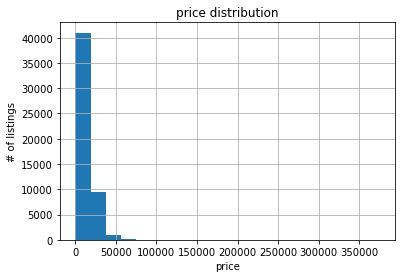

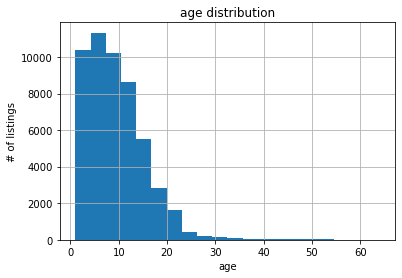

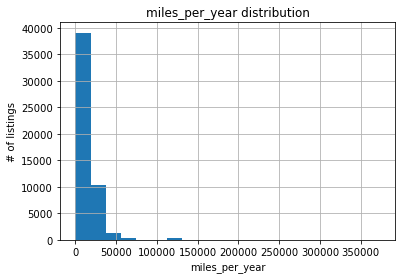

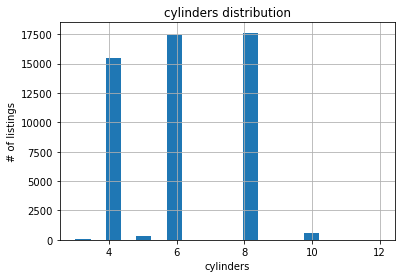

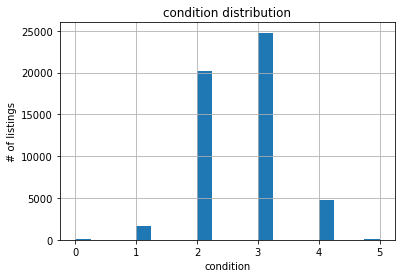

In [40]:
my_list = ['price',
          'age',
          'miles_per_year',
          'cylinders',
          'condition']
for column in my_list:
    vehicle_data.hist(column, bins=20)
    plt.xlabel(column)
    plt.ylabel('# of listings')
    plt.title('{} distribution'.format(column))
    plt.show()

#plotting a histogram for each numerical column in vehicle_data

Looks like there are major outliers in the histograms of the price, age , and miles_per_year columns. These outliers are altering the way the histogram looks and is making it a bit harder to read. Lets create a function to get rid of these outliers.

In [41]:
def remove_outliers(column_name, df):
    '''
    Removes outliers from a numeric column in a the specified dataframe
    
    ----------------
    Parameters
    column_name (string) - the column which you want to remote outliers from
    df (dataframe) - the dataframe which you want to remove outliers from
    
    Returns
    the data frame, excluding the outliers for the specified column
    '''
    Q1 = df[column_name].describe()[4]
    Q3 = df[column_name].describe()[6]
    IQR = Q3 - Q1
    upper_limit = Q3 + (1.5*IQR)
    lower_limit = Q1 - (1.5*IQR)
    new_df = df.loc[(df[column_name]>=lower_limit)&(df[column_name]<=upper_limit)]
    return new_df

#function that gets rid of outliers in a particular column

In [42]:
df1 = remove_outliers('price',vehicle_data)
df2 = remove_outliers('age', df1)
df3 = remove_outliers('miles_per_year', df2)
df4 = remove_outliers('cylinders', df3)
outliers_removed = remove_outliers('condition', df4)

#multiple calls of the function in order to have a final df called outliers_removed, with no outliers in the dataframe

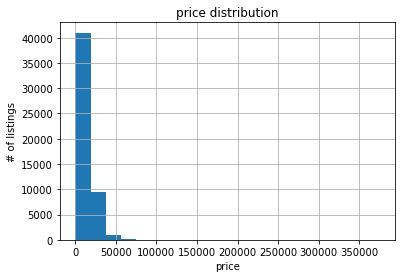

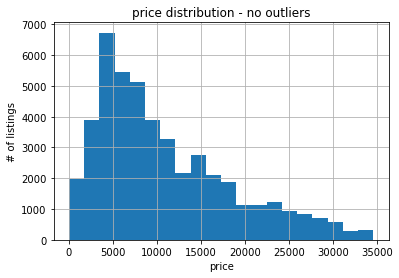

-------------------------------------------------------


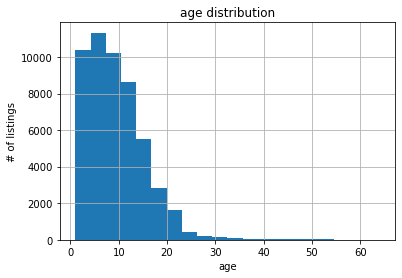

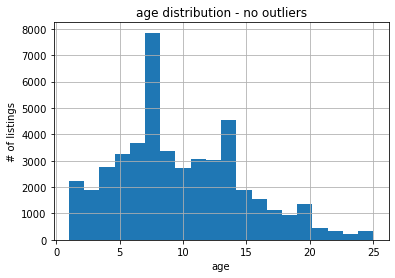

-------------------------------------------------------


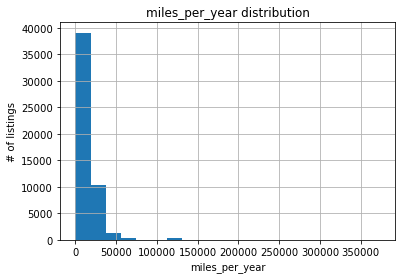

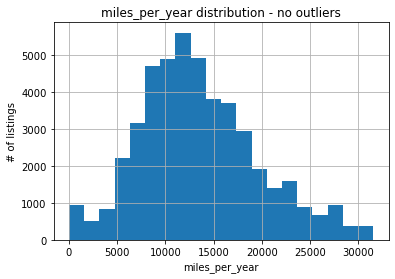

-------------------------------------------------------


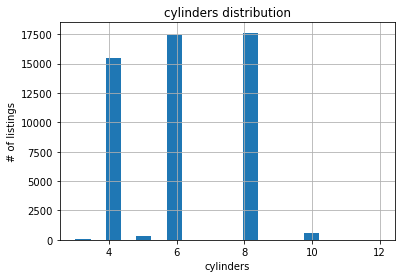

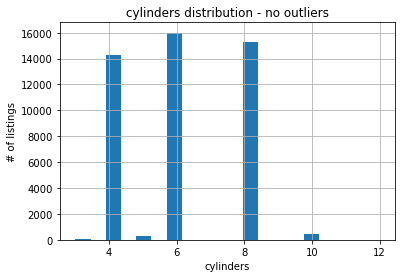

-------------------------------------------------------


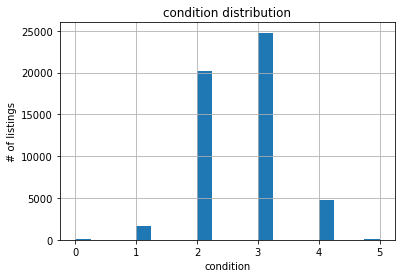

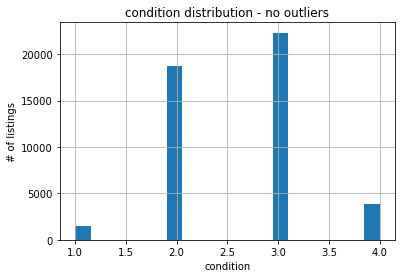

-------------------------------------------------------


In [43]:
for column in my_list:
    vehicle_data.hist(column, bins=20)
    plt.xlabel(column)
    plt.ylabel('# of listings')
    plt.title('{} distribution'.format(column))
    plt.show()
    outliers_removed.hist(column, bins=20)
    plt.xlabel(column)
    plt.ylabel('# of listings')
    plt.title('{} distribution - no outliers'.format(column))
    plt.show()
    print('-------------------------------------------------------')
    
#showing the new histograms vs the old histograms

### price
Price was one of the histograms that was greatly effected by large outliers. The first histogram did not show a good description of the data of prices since the majority of listings were in the 0 to 50,000 dollar range. This resulted in a histogram that looked mostly empty. The second histogram, which removed the large outliers, showed a much better distribution of data, and showed that most listing were priced under 13,000 dollars.

### age
Age was another histogram that was greatly effected by an outlier. The first histogram shows that most of the listings included vehicles that under 20 years old at the time of the listing. But removing the outliers showed more specifically that the majority of vehicles were between 5-10 years old at the time of listing, and that only some of the vehicles were 15 years or older at the time of the listing.

### miles_per_year
The miles_per_year histogram was also greatly effected by outliers. The first histogram was not able to convey much information and looked large empty. It showed that almost all of the vehicles had a mileage of under 50,000 miles per year, but not much outside of that. The second histogram is able to be much more detailed as it offers a 'zoomed in' look at the vehicles listed that were between 0 and 40,000 miles per year, which accounted for the vast majority of vehicles listed. From this second histogram you are able to see that the majority of vehicles listed were between 7,500-20,000 miles per year.

### cylinders and condition
The cylinders and condition histogram weren't to vastly effect by the removal of outliers. It is because these are discrete integer values with less than 10 unique values. Both histograms for cylinders showed that most cars listed had 4, 6 or 8 cylinders and were in 'good' or 'excellent condition (values 2 and 3 in the condition column).

## Ad lifetime
How long were listings up? What can we learn about listings through how long the listings were up?

In [44]:
outliers_removed['days_listed'].describe()

#distribution of days listed column

count    46441.000000
mean        39.561034
std         28.228534
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

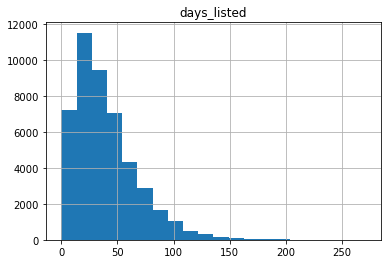

In [45]:
outliers_removed.hist('days_listed',bins=20)
plt.show()

#distribution of days listed column

### Typical Ad Life
The 'days_listed' column showed that ads had an average of about 40 days before being removed. The middle value was about 33 days. Most of the ads listed were for about 19-53 days or about 3-8weeks.

In [46]:
quick_removal = outliers_removed[outliers_removed['days_listed']<19]
listed_long = outliers_removed[outliers_removed['days_listed']>53]

#new dataframes for listings that were removed quickly or listed for a long time

In [47]:
discrete_values = ['model',
                  'condition',
                  'cylinders',
                  'fuel',
                  'transmission',
                  'type',
                  'paint_color',
                   'is_4wd',
                   'posted_weekday',
                   'posted_month']
continuous_values = ['price',
                    'model_year',
                    'odometer',
                    'age',
                    'miles_per_year']

#lists to make analyzing relationship between listing removal and other columns easier

In [48]:
for column in discrete_values:
    print('Quickly Removed:')
    print(quick_removal[column].value_counts())
    print('Listed Long:')
    print(listed_long[column].value_counts())
    print('-----------------------------------------------------')
    
#looking at distribution of values for quickly removed listing vs listing that were there for a long time

Quickly Removed:
ford f-150                    619
chevrolet silverado 1500      489
ram 1500                      402
chevrolet silverado           277
jeep wrangler                 246
                             ... 
hyundai santa fe               48
ford f350                      47
ford f-250 super duty          46
kia sorento                    44
chevrolet silverado 3500hd     40
Name: model, Length: 99, dtype: int64
Listed Long:
ford f-150                    607
chevrolet silverado 1500      467
ram 1500                      422
chevrolet silverado           291
jeep wrangler                 248
                             ... 
nissan murano                  54
chevrolet silverado 3500hd     47
ford f-250 super duty          46
ford f350                      44
dodge dakota                   43
Name: model, Length: 99, dtype: int64
-----------------------------------------------------
Quickly Removed:
3    5367
2    4566
4    1012
1     384
Name: condition, dtype: int64
Liste

In [49]:
for column in continuous_values:
    print('Quickly Removed:')
    print(quick_removal[column].describe())
    print('Listed Long:')
    print(listed_long[column].describe())
    print('-----------------------------------------------------')
    
#looking at distribution of values for quickly removed listing vs listing that were there for a long time

Quickly Removed:
count    11329.000000
mean     10884.583547
std       7662.914865
min          1.000000
25%       4995.000000
50%       8700.000000
75%      14999.000000
max      34600.000000
Name: price, dtype: float64
Listed Long:
count    11554.000000
mean     10855.014194
std       7635.283231
min          1.000000
25%       4995.000000
50%       8800.000000
75%      15000.000000
max      34600.000000
Name: price, dtype: float64
-----------------------------------------------------
Quickly Removed:
count    11329.000000
mean      2009.659105
std          4.999395
min       1994.000000
25%       2006.000000
50%       2010.000000
75%       2013.000000
max       2019.000000
Name: model_year, dtype: float64
Listed Long:
count    11554.000000
mean      2009.648260
std          4.945409
min       1994.000000
25%       2006.000000
50%       2010.000000
75%       2013.000000
max       2019.000000
Name: model_year, dtype: float64
-----------------------------------------------------
Quickl

### Short Ad Life vs Long Ad Life
We were not able to establish a pattern as to why certain ad listings were removed quickly and why others were there for many, many days. The distribution in values and mean/medians are similar in both the quickly removed ad listings and the ad listings that were there for a prolonged period of time.
Ads are probably removed once someone purchases the vehicle listed on the ad, it would make sense that there is no 'one reason' why someone would buy a vehicle immediately.

### Ads and Vehicle Price
Here we will look at the number of ads per vehicle type and see if theres a correlation between the number of ads and the price of the vehicle

In [50]:
type_price_mean_count = outliers_removed.pivot_table(index='type',values='price',aggfunc=['mean','count'])
type_price_mean_count

#pivot table showing the average price of a vehicle and number of ads for that vehicle type

,mean,count
,price,price
type,,
SUV,10181.423866,11506
bus,17445.913043,23
convertible,12748.815249,341
coupe,13011.101285,1945
hatchback,6643.744615,975
mini-van,7638.638787,1088
offroad,14052.872222,180
other,10066.057778,225


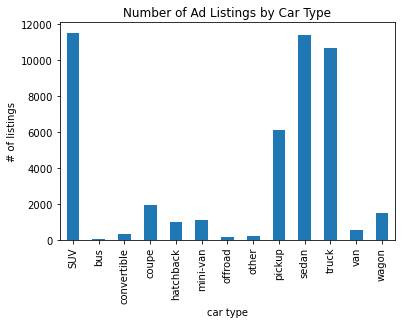

In [51]:
type_price_mean_count['count','price'].plot(kind='bar')
plt.ylabel('# of listings')
plt.xlabel('car type')
plt.title('Number of Ad Listings by Car Type')
plt.show();

#bar graph showing the amount of ads for each car type

In [52]:
type_price_mean_count['count','price'].sort_values(ascending=False).head(2)

#the two most advertised car types

type
SUV      11506
sedan    11358
Name: (count, price), dtype: int64

It looks like the two most advertised car types are SUVs and sedans. Being that these cars are advertised the most, lets see what helps determine their price.

## Price Factors

In [53]:
SUV_df = outliers_removed[outliers_removed['type'] == 'SUV']
sedan_df = outliers_removed[outliers_removed['type'] == 'sedan']

#separate dataframes for SUVs and sedans

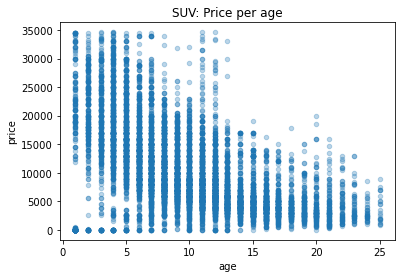

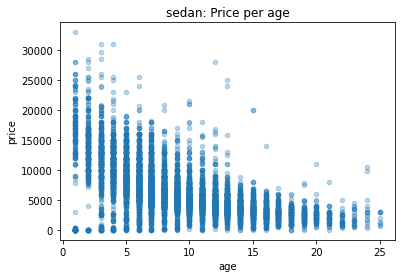


SUV: age - Price Correlation: -0.5744527221634983
sedan: age - Price Correlation: -0.6145134248340148
-----------------------------------------------------


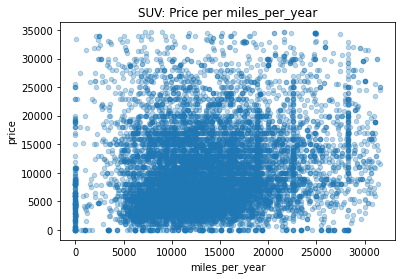

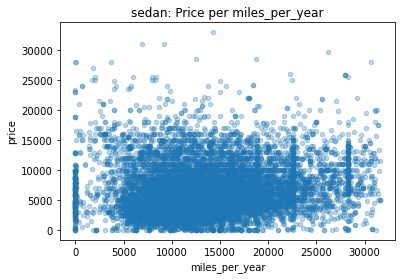


SUV: miles_per_year - Price Correlation: 0.19701887531314546
sedan: miles_per_year - Price Correlation: 0.12183704494982284
-----------------------------------------------------


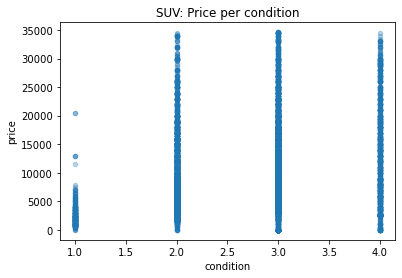

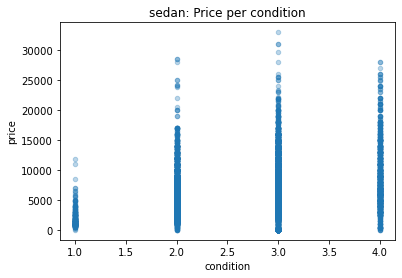


SUV: condition - Price Correlation: 0.2598381325893385
sedan: condition - Price Correlation: 0.2924298153254876
-----------------------------------------------------


In [54]:
num_values = ['age',
              'miles_per_year',
              'condition']
for column in num_values:
    SUV_df.plot(x=column,y='price', kind='scatter',alpha=0.3)
    plt.title('SUV: Price per {}'.format(column))
    
    sedan_df.plot(x=column,y='price', kind='scatter',alpha=0.3)
    plt.title('sedan: Price per {}'.format(column))
    plt.show()
    print()
    print('SUV: {} - Price Correlation:'.format(column),SUV_df[column].corr(SUV_df['price']))
    print('sedan: {} - Price Correlation:'.format(column),sedan_df[column].corr(sedan_df['price']))
    print('-----------------------------------------------------')
    
#for loop to graph scatter plots nad print correlations

A correlation of about -0.6 between Age and Price implies, for both SUVs and sedans that there is a connection, but it is not always true. In general, as a car ages, the price goes down, which reinforces the idea that a car's value depreciates over time.

A correlation of about 0.3 between condition and price, and miles_per_year and price, implies that there is almost no connection between these values.

Let's look at other possible correlations

In [55]:
SUV_df.corr()['price']

#correlation matrix of just price for SUVs

price             1.000000
model_year        0.576608
condition         0.259838
cylinders         0.004209
odometer         -0.484435
is_4wd            0.116630
days_listed      -0.018791
posted_weekday    0.007901
posted_month     -0.013108
posted_year       0.008384
age              -0.574453
miles_per_year    0.197019
Name: price, dtype: float64

In [56]:
sedan_df.corr()['price']

#correlation matrix of just price for sedans

price             1.000000
model_year        0.618617
condition         0.292430
cylinders        -0.030616
odometer         -0.534717
is_4wd            0.060274
days_listed      -0.000344
posted_weekday   -0.003279
posted_month     -0.037600
posted_year       0.035511
age              -0.614513
miles_per_year    0.121837
Name: price, dtype: float64

Looks like there is a slight positive correlation between price and model year, and slight negative correlation between price and odometer, and price and age. This is true for both SUVs AND sedans
This means that in general:
* As model year goes up, so does price (newer car models, have higher prices)
* As odometer goes up, price goes down (the more a car is driven, the less value it has on the market)
* As age goes up, price goes down (the older a car is, the less value it has on the market)

The other correlation coefficients are a lot closer to 0, meaning that there is almost no correction between the values.

In [57]:
cat_values = ['transmission',
             'paint_color',
             'posted_weekday',
             'posted_month']

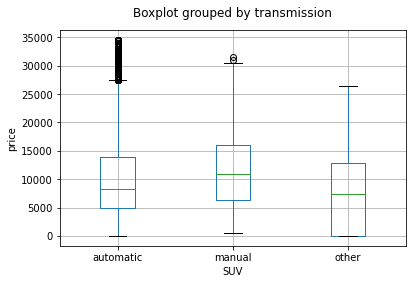

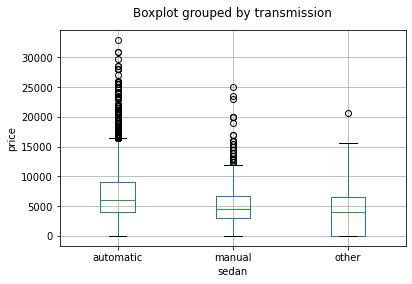

--------------------------------------------------------


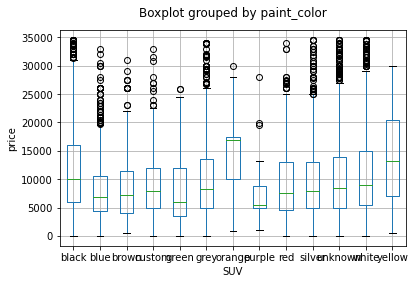

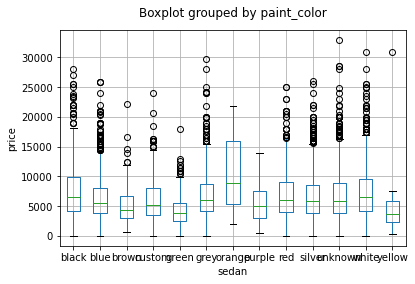

--------------------------------------------------------


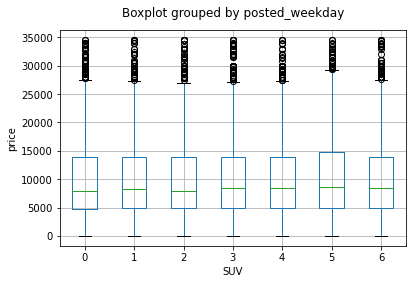

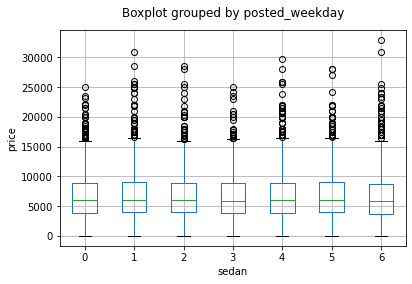

--------------------------------------------------------


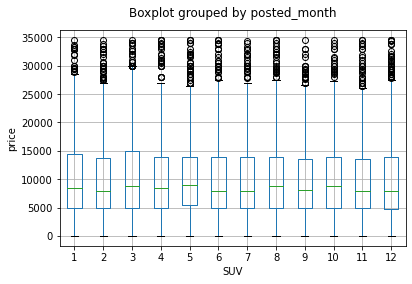

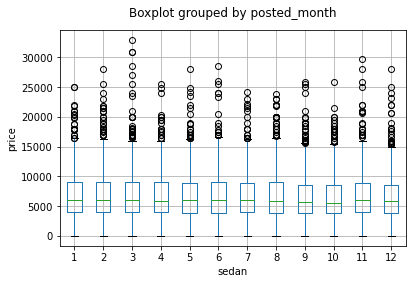

--------------------------------------------------------


In [58]:
for columns in cat_values:
    SUV_df.boxplot(column='price', by=columns)
    plt.ylabel('price')
    plt.title('')
    plt.xlabel('SUV')
    plt.show()
    
    sedan_df.boxplot(column='price', by=columns)
    plt.ylabel('price')
    plt.title('')
    plt.xlabel('sedan')
    plt.show()
    
    print('--------------------------------------------------------')

For the more categorical columns it looks like for SUVs, manual transmission vehicles tend to be a little more expensive, where the opposite is true for sedans. For sedans, automatic transmission vehicles tend to be a little more expensive. When it comes to color, it looks like for both SUVs and sedans, orange seems to be a more expensive color. For SUVs specifically it looks like the color black and the color yellow also tends to be more expensive.

# Conclusion

### Preprocessing

#### Missing Values
* The 'is_4wd' had many missing values, upon a closer look it was clear that the missing values were just boolean 'False' values, as the only values stored had the value of '1'. We filled the null values here with 0s to compensate.
* The 'paint_color' had missing values, which we filled with 'unknown', we did not want to lose the data in the rest of the row, and had no way of being able to determine the color of the vehicle.
* The 'model_year' column had some values that did not make sense, and were before the actual manufacturing start of the model of the vehicle in the row. We replaced those values with null. We then replaced all the null values with the median model year in accordance with the model of the car.
* The 'odometer' column had null values, which we replaced with the median value for the dataset. 
* The 'cylinders' column had null values, which we placed with the median value in accordance with the model and model_year of the vehicle, since the same model/model_year vehicles should have the same number of cylinders.. We found that 26 rows of data, did not have a valid median value, and so we dropped those 26 rows of data as we could not accurately put a number of cylinders

#### Duplicate Values
* We found that there were no duplicate values in our dataset

#### Data Types
* We converted is_4wd to boolean, model_year to integer, odometer to integer, cylinders to integer, and date_posted to datetime. The 3 changes to integer were because of the previously null values forced the datatype to a float, once we took care of the null values, they were able to be converted to integers. Date_posted was turned into datetime for compatibility with some datetime function in the pandas library. is_4wd was converted to boolean, since it was a simple True/False value. We also changed the condition to be based on integers instead of being categorical for an easier time with plot functions later in the notebook

#### Additional Columns
We Added the following columns:
* posted_weekday: the day of the week the listing was posted on based on the posted_date
* posted_month: the day of the month the listing was posted on based on the posted_date
* posted_year: the year that the listing was posted on based on the posted_date
* age: The number of years between the model_year and the posted_year
* miles_per_year: the odometer column divided by the age column

### Data Analysis

#### Outliers
We plotted histograms with the data, and noticed some of the histograms were hard to read. We realized this was because of outliers. So, we made a function to remove outliers based on if values fell beyond the Inter-Quartile Range (IQR) multiplied by 1.5, which would designate an outlier. We saved this dataframe as outliers_removed and used that dataframe moving forward.

Once we plotted out histograms without outliers, we were able to make more specific conclusions on the data.

We noticed:
* Most listings were priced under 13,000 dolars
* Most vehicles were between 5 and 15 years of age at the time they were listed
* Most vehicles' mileage was between 7,500 and 20,000 miles per year
* Also noticed discrete data such as cylinders and condition were not very much by outliers, and that most listed vehicles had 4, 6, or 8 cylinders and where in 'good' or 'excellent' conditions.
 

#### Ad Listing Lifetime
We noticed that there were some listings that were removed very quickly after inital posting, and some that lingered for a long time. It can be assumed that listing were removed as the vehicle was sold, and so it follows that listings that were removed quickly are high in demand vehicles, and that the opposite is true with vehicle listings that lingered. We were not able to establish a pattern between the time a listing was up, and any other variable in the dataset. Everything seems to have similar distributions regardless of the time a listing was up. We can say, however that the average ad was up for about 40 days, whereas the middle value for amount of days an add was up was 33 days. 50% of the ads were up for a duration of between 19-53days, or about 3-8 weeks. Meaning you could reasonably expect a typical ad to stay up for at least 3weeks, and to be gone by about 8weeks.

## Price Factors
We looked specifically at SUVs and sedans, the two most popular car types that were advertised. and made scatterplots comparing their age, condition, and miles_per_year to their listing price.

We found:
* With a correlation coefficient of -0.56 for SUVs and -0.61 for sedans between age and price, in general as a car ages it's decreases
* With a correlation coefficiant of 0.27 for SUVs and 0.21 for sedans, there does not seem to be a strong correlation between miles_per_year and listing price.
* with a correlation coefficient of 0..26 for SUVs and 0.29 for sedans, there does not seem to be a strong correlation between condition and listing price.

When we made a correlation matrix to the numeric values we found:
* As model_year goes up, so does price (newer car models, have higher prices)
* As odometer goes up, price goes down (the more a car is driven, the less value it has on the market)


When looking at categorical values we found:
* When it comes to SUVs, manual transmission vehicles tend to be more expensive, while the opposite is true for sedans
* For both SUVs and sedans, the color orange seems to be more expensive than the other colors, for SUvs specifically, yellow and black SUVs are also a little more expensive.
* The day of the week that the listing was posted did not seem to have a meaningful effect on the price
* The month of the year that the listing was posted did not seem to have a meaningful effect on the price